# LSTM 

## Outline
1. [Imports](#imports)
2. [Data](#data)
3. [Model](#model)
5. [Train](#train)
6. [Predict](#predict)

<a name=imports></a>
## Imports

In [1]:
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

<a name=data></a>
## Data

### Ingestion 

In [163]:
# Get the path of the current working directory
curPath = os.getcwd()
# Appened the parent directory to the current path to step out of the current folder
parentDir = os.path.abspath(os.path.join(curPath, os.pardir))
print("Parent Directory", parentDir)
# Save the path to all of the datasets
india_cases_path = os.path.join(parentDir, "../cleaned_datasets/india/daily_cases_india.csv")
india_vacc_path = os.path.join(parentDir, "../cleaned_datasets/india/daily_vacc_india.csv")
usa_cases_path = os.path.join(parentDir, "../cleaned_datasets/usa/daily_cases_usa.csv")
usa_vacc_path = os.path.join(parentDir, "../cleaned_datasets/usa/vacc_usa.csv")

# Quick check to make sure the path exists
print("Path:", india_cases_path)
print("Exists:", os.path.exists(india_cases_path))

Parent Directory /covid19-prediction/models
Path: /covid19-prediction/models/../cleaned_datasets/india/daily_cases_india.csv
Exists: True


In [164]:
# Load the data as a pandas dataframe
india_cases_df = pd.read_csv(india_cases_path)
india_vacc_df =  pd.read_csv(india_vacc_path)

usa_cases_df = pd.read_csv(usa_cases_path)
usa_vacc_df = pd.read_csv(usa_vacc_path)

# Visualize the datasets
print('India Cases:\n',india_cases_df.head(),'\n')
print('India Vacc:\n',india_vacc_df.head(),'\n')

print('USA Cases:\n',usa_cases_df.head(),'\n')
print('USA Vacc:\n',usa_vacc_df.head(),'\n')

India Cases:
    Unnamed: 0        Date  Confirmed  Deaths  Recovered  Active
0           0  2020-01-30        1.0     0.0        0.0     0.0
1           1  2020-01-31        0.0     0.0        0.0     0.0
2           2  2020-02-01        0.0     0.0        0.0     0.0
3           3  2020-02-02        1.0     0.0        0.0     0.0
4           4  2020-02-03        1.0     0.0        0.0     0.0 

India Vacc:
    Updated On  Total_Doses  First_Dose  Second_Dose
0  2021-01-16          NaN         NaN          NaN
1  2021-01-17      20656.0     20656.0          0.0
2  2021-01-18      81690.0     81690.0          0.0
3  2021-01-19     192152.0    192152.0          0.0
4  2021-01-20     111510.0    111510.0          0.0 

USA Cases:
          Date  Confirmed  Deaths  Recovered
0  2020-04-14    26713.0  2305.0     6484.0
1  2020-04-15    29380.0  2478.0     6093.0
2  2020-04-16    31542.0  4616.0     5234.0
3  2020-04-17    32022.0  3879.0     5904.0
4  2020-04-18    32502.0  1859.0    13591

### Pre-Processing

### Multivariate

In [165]:
india_cases_multi_df = india_cases_df[["Date","Confirmed","Deaths","Recovered","Active"]]

### Univariate 

In [166]:
# Select only the Confirmed column for univariate analysis
# Selecting from the first index because the 0th index is NaN
india_cases_df_sliced = india_cases_df[["Confirmed"]][1:]
usa_cases_df_sliced = usa_cases_df[["Confirmed"]][1:]

# Visualize the datasets
print('India Cases:\n',india_cases_df_sliced.head(),'\n')
print('USA Cases:\n',usa_cases_df_sliced.head(),'\n')

India Cases:
    Confirmed
1        0.0
2        0.0
3        1.0
4        1.0
5        0.0 

USA Cases:
    Confirmed
1    29380.0
2    31542.0
3    32022.0
4    32502.0
5    26588.0 



In [167]:
# Normalize the data
india_cases_mean = india_cases_df_sliced.mean()
india_cases_std = india_cases_df_sliced.std()

usa_cases_mean = usa_cases_df_sliced.mean()
usa_cases_std = usa_cases_df_sliced.std()


india_cases_normalized_df = (india_cases_df_sliced-india_cases_mean)/india_cases_std
usa_cases_normalized_df = (usa_cases_df_sliced-usa_cases_mean)/usa_cases_std

# Visualize the datasets
print('India Cases:\n',india_cases_normalized_df.head(),'\n')
print('USA Cases:\n',usa_cases_normalized_df.head(),'\n')

India Cases:
    Confirmed
1  -0.687995
2  -0.687995
3  -0.687983
4  -0.687983
5  -0.687995 

USA Cases:
    Confirmed
1  -0.759976
2  -0.727837
3  -0.720702
4  -0.713566
5  -0.801480 



In [168]:
# Create train test splits
india_cases_train, india_cases_test = train_test_split(india_cases_normalized_df, test_size=0.2, shuffle=False)
india_vacc_train, india_vacc_test = train_test_split(india_vacc_df, test_size=0.2, shuffle=False)

usa_cases_train, usa_cases_test = train_test_split(usa_cases_normalized_df, test_size=0.2, shuffle=False)
usa_vacc_train, usa_vacc_test = train_test_split(usa_vacc_df, test_size=0.2, shuffle=False)

# Visualize splits
print('India Cases:\n',india_cases_train,'\n')
print('USA Cases:\n',usa_cases_train,'\n')

India Cases:
      Confirmed
1    -0.687995
2    -0.687995
3    -0.687983
4    -0.687983
5    -0.687995
..         ...
492   0.750239
493   0.576535
494   0.398886
495   0.475509
496   0.486403

[496 rows x 1 columns] 

USA Cases:
      Confirmed
1    -0.759976
2    -0.727837
3    -0.720702
4    -0.713566
5    -0.801480
..         ...
432  -1.130479
433  -1.022988
434  -1.037824
435  -1.003589
436  -0.992157

[436 rows x 1 columns] 



In [169]:
# Convert to numpy array
india_cases_train, india_cases_test = india_cases_train.to_numpy().flatten(), india_cases_test.to_numpy()
usa_cases_train, usa_cases_test = usa_cases_train.to_numpy().flatten(), usa_cases_test.to_numpy()

# Visualize outputs
print('India Cases:\n',india_cases_train,'\n')
print('USA Cases:\n',usa_cases_train,'\n')

India Cases:
 [-6.87995117e-01 -6.87995117e-01 -6.87982552e-01 -6.87982552e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87969986e-01
 -6.87995117e-01 -6.87706113e-01 -6.87969986e-01 -6.87982552e-01
 -6.87957421e-01 -6.87932290e-01 -6.87944855e-01 -6.87831767e-01
 -6.87919725e-01 -6.87856898e-01 -6.87882028e-01 -6.87743809e-01
 -6.87856898e-01 -6.87919725e-01 -6.87706113e-01 -6.87819202e-01
 -6.87517632e-01 -6.87366848e-01 -6.86914494e-01 -6.87165802e-01
 -6.86700882e-01 -6.87530198e-01 -6.86474705e-01 -6.87115540e-01
 -6.85984655e-01 -6.86738578e-01 -6.87530198e-01 -6.85142775e-01
 -6.8616057

In [9]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [10]:
# choose a number of time steps
n_steps = 3
# split into samples
india_cases_train_X, india_cases_train_y = split_sequence(india_cases_train, n_steps)
india_cases_test_X, india_cases_test_y = split_sequence(india_cases_test, n_steps)
usa_cases_train_X, usa_cases_train_y = split_sequence(usa_cases_train, n_steps)
usa_cases_test_X, usa_cases_test_y = split_sequence(usa_cases_test, n_steps)

# summarize the data
for i in range(0,5):
    print(india_cases_train_X[i], india_cases_train_y[i])
print()
# summarize the data
for i in range(0,5):
    print(usa_cases_train_X[i], usa_cases_train_y[i])

[-0.68799512 -0.68799512 -0.68798255] -0.687982551549953
[-0.68799512 -0.68798255 -0.68798255] -0.6879951169346211
[-0.68798255 -0.68798255 -0.68799512] -0.6879951169346211
[-0.68798255 -0.68799512 -0.68799512] -0.6879951169346211
[-0.68799512 -0.68799512 -0.68799512] -0.6879951169346211

[-0.75997589 -0.72783707 -0.72070172] -0.7135663621434901
[-0.72783707 -0.72070172 -0.71356636] -0.8014798602697645
[-0.72070172 -0.71356636 -0.80147986] -0.8206709874393655
[-0.71356636 -0.80147986 -0.82067099] -0.7796129756326746
[-0.80147986 -0.82067099 -0.77961298] -0.7701734979001443


In [11]:
# Reshape the data into [samples, timesteps, features]
# univariate
n_features = 1

india_cases_train_X = india_cases_train_X.reshape((india_cases_train_X.shape[0], 
                                                   india_cases_train_X.shape[1], n_features))
india_cases_test_X = india_cases_test_X.reshape((india_cases_test_X.shape[0], 
                                                 india_cases_test_X.shape[1], n_features))

usa_cases_train_X = usa_cases_train_X.reshape((usa_cases_train_X.shape[0], 
                                                   usa_cases_train_X.shape[1], n_features))
usa_cases_test_X = usa_cases_test_X.reshape((usa_cases_test_X.shape[0], 
                                                   usa_cases_test_X.shape[1], n_features))

# Visualize outputs
print('India Cases:\n',india_cases_train_X,'\n')
print('USA Cases:\n',usa_cases_train_X,'\n')

India Cases:
 [[[-0.68799512]
  [-0.68799512]
  [-0.68798255]]

 [[-0.68799512]
  [-0.68798255]
  [-0.68798255]]

 [[-0.68798255]
  [-0.68798255]
  [-0.68799512]]

 ...

 [[ 0.82649813]
  [ 0.75023881]
  [ 0.57653493]]

 [[ 0.75023881]
  [ 0.57653493]
  [ 0.39888553]]

 [[ 0.57653493]
  [ 0.39888553]
  [ 0.47550924]]] 

USA Cases:
 [[[-0.75997589]
  [-0.72783707]
  [-0.72070172]]

 [[-0.72783707]
  [-0.72070172]
  [-0.71356636]]

 [[-0.72070172]
  [-0.71356636]
  [-0.80147986]]

 ...

 [[-1.07058673]
  [-1.13047911]
  [-1.02298798]]

 [[-1.13047911]
  [-1.02298798]
  [-1.03782357]]

 [[-1.02298798]
  [-1.03782357]
  [-1.00358874]]] 



<a name=model></a>
## Model 

In [12]:
# Imports for model components
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanAbsolutePercentageError, MeanAbsoluteError
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Univariate non-stacked -- Rolling

In [200]:
# Define the model
def build_univariate_non_stacked(optimizer="adam", lstm_nparams=100, n_steps=3, n_features=1):
    model_uni = Sequential()
    model_uni.add(LSTM(lstm_nparams, activation='relu', input_shape=(n_steps, n_features)))
    model_uni.add(Dense(1))
    model_uni.compile(optimizer=optimizer,loss='mae', metrics=["mae"])
    model_uni.summary()
    return model_uni

### Univariate non-stacked -- Long-Term

In [201]:
# Define the model
def build_univariate_non_stacked_long(optimizer="adam", lstm_nparams=100, n_steps=3, n_features=1):
    model_uni = Sequential()
    model_uni.add(LSTM(lstm_nparams, activation='relu', input_shape=(n_steps, n_features)))
    model_uni.add(Dense(10))
    model_uni.compile(optimizer=optimizer,loss='mae', metrics=["mae"])
    model_uni.summary()
    return model_uni

#### Grid Search

In [202]:
# Using KerasClassifier wrapper 
keras_estimator = KerasRegressor(build_fn=build_univariate_non_stacked, verbose=1)

In [206]:
# Defining parameters for the gridserach
param_grid = {
    'epochs': [10,100,300,],
    'lstm_nparams':[15,50,100,300],
    'n_steps': [3, 6, 15],
#     'optimizer': ['RMSprop','Adam','Adamax','sgd']
}

kfold_splits = 5

In [209]:
# Defining GridSearch
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=-1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    scoring="neg_mean_absolute_error",
)

In [210]:
# Fitting GridSearch
grid_result = grid.fit(india_cases_train_X, india_cases_train_y, )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_111 (LSTM)              (None, 15)                1020      
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 16        
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.7209 - mae: 0.7209
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6802 - mae: 0.6802
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6374 - mae: 0.6374
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5927 - mae: 0.5927
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5389 - mae: 0.5389
Epoch 6/10
13/13 [=============================

13/13 [==============================] - 0s 5ms/step - loss: 0.3505 - mae: 0.3505
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3087 - mae: 0.3087
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2634 - mae: 0.2634
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2121 - mae: 0.2121
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1560 - mae: 0.1560
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1084 - mae: 0.1084
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0873 - mae: 0.0873
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0679 - mae: 0.0679
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 15)       

13/13 [==============================] - 0s 4ms/step - loss: 0.5822 - mae: 0.5822
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4859 - mae: 0.4859
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3655 - mae: 0.3655
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2148 - mae: 0.2148
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1428 - mae: 0.1428
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1228 - mae: 0.1228
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_119 (LSTM)              (None, 15)                1020      
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 16        
Total params: 1,036
Trainable para

13/13 [==============================] - 0s 4ms/step - loss: 0.5665 - mae: 0.5665
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5217 - mae: 0.5217
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4702 - mae: 0.4702
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4073 - mae: 0.4073
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3171 - mae: 0.3171
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2259 - mae: 0.2259
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1976 - mae: 0.1976
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_122 (LSTM)              (None, 15)                1020      
_________________________________________________________________
dense_1

13/13 [==============================] - 0s 4ms/step - loss: 0.6870 - mae: 0.6870
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6349 - mae: 0.6349
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5733 - mae: 0.5733
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4972 - mae: 0.4972
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3896 - mae: 0.3896
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2861 - mae: 0.2861
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2559 - mae: 0.2559
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2224 - mae: 0.2224
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_125 (LSTM)              (None, 15)       

Epoch 1/10
13/13 [==============================] - 1s 4ms/step - loss: 0.7910 - mae: 0.7910
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.7111 - mae: 0.7111
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6173 - mae: 0.6173
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4856 - mae: 0.4856
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2741 - mae: 0.2741
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1399 - mae: 0.1399
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1103 - mae: 0.1103
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1089 - mae: 0.1089
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0996 - mae: 0.0996
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_121"
_________________________________________________________________
Layer (t

Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.7816 - mae: 0.7816
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.7010 - mae: 0.7010
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6210 - mae: 0.6210
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5296 - mae: 0.5296
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4240 - mae: 0.4240
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3313 - mae: 0.3313
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2006 - mae: 0.2006
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1198 - mae: 0.1198
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1174 - mae: 0.1174
Epoch 10/10
13/13 [==============================] - 0s 852us/step
Model: "sequential_125"
_________________________________________________________________
Layer 

Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.4263 - mae: 0.4263
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3633 - mae: 0.3633
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3026 - mae: 0.3026
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2328 - mae: 0.2328
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1416 - mae: 0.1416
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0660 - mae: 0.0660
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0558 - mae: 0.0558
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0499 - mae: 0.0499
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0484 - mae: 0.0484
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_128"
_________________________________________________________________
Layer (t

Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.7648 - mae: 0.7648
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6840 - mae: 0.6840
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5919 - mae: 0.5919
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4688 - mae: 0.4688
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2684 - mae: 0.2684
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1314 - mae: 0.1314
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0998 - mae: 0.0998
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0960 - mae: 0.0960
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0899 - mae: 0.0899
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_131"
_________________________________________________________________
Layer (t

Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.6480 - mae: 0.6480
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5411 - mae: 0.5411
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3898 - mae: 0.3898
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1893 - mae: 0.1893
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1265 - mae: 0.1265
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1203 - mae: 0.1203
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1147 - mae: 0.1147
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1123 - mae: 0.1123
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1138 - mae: 0.1138
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_134"
_________________________________________________________________
Layer (t

13/13 [==============================] - 0s 1ms/step
Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13/13 [==============================] - 1s 4ms/step - loss: 0.6497 - mae: 0.6497
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5221 - mae: 0.5221
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3433 - mae: 0.3433
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1585 - mae: 0.1585
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1240 - mae:

13/13 [==============================] - 0s 1ms/step
Model: "sequential_141"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_149 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.6657 - mae: 0.6657
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5072 - mae: 0.5072
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2844 - mae: 0.2844
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1756 - mae: 0.1756
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1250 - mae:

13/13 [==============================] - 0s 1ms/step
Model: "sequential_144"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_152 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13/13 [==============================] - 1s 4ms/step - loss: 0.7237 - mae: 0.7237
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5944 - mae: 0.5944
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4308 - mae: 0.4308
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2056 - mae: 0.2056
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1234 - mae:

13/13 [==============================] - 0s 1ms/step
Model: "sequential_147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_155 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.4060 - mae: 0.4060
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3355 - mae: 0.3355
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2496 - mae: 0.2496
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1318 - mae: 0.1318
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0667 - mae:

13/13 [==============================] - 0s 1ms/step
Model: "sequential_151"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_159 (LSTM)              (None, 300)               362400    
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 0.6546 - mae: 0.6546
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3533 - mae: 0.3533
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1491 - mae: 0.1491
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1152 - mae: 0.1152
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1082 - ma

13/13 [==============================] - 0s 4ms/step - loss: 0.1241 - mae: 0.1241
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1118 - mae: 0.1118
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1099 - mae: 0.1099
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1043 - mae: 0.1043
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1051 - mae: 0.1051
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1043 - mae: 0.1043
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0979 - mae: 0.0979
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_163 (LSTM)              (None, 300)               362400    
_________________________________________________________________
dense_1

13/13 [==============================] - 0s 5ms/step - loss: 0.1971 - mae: 0.1971
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0663 - mae: 0.0663
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0527 - mae: 0.0527
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0498 - mae: 0.0498
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0485 - mae: 0.0485
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0483 - mae: 0.0483
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0492 - mae: 0.0492
Epoch 9/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0494 - mae: 0.0494
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_166 (LSTM)              (None, 300)      

13/13 [==============================] - 1s 5ms/step - loss: 0.7152 - mae: 0.7152
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3914 - mae: 0.3914
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1740 - mae: 0.1740
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1135 - mae: 0.1135
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0967 - mae: 0.0967
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0949 - mae: 0.0949
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0965 - mae: 0.0965
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0921 - mae: 0.0921
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0870 - mae: 0.0870
Epoch 10/10
13/13 [==============================] - 0s 1ms/step
Model: "sequential_161"
_________________________________________________________________
Layer (type)       

13/13 [==============================] - 0s 5ms/step - loss: 0.4627 - mae: 0.4627
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3690 - mae: 0.3690
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2374 - mae: 0.2374
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1780 - mae: 0.1780
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1494 - mae: 0.1494
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1268 - mae: 0.1268
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1149 - mae: 0.1149
Epoch 13/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1102 - mae: 0.1102
Epoch 14/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1090 - mae: 0.1090
Epoch 15/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1099 - mae: 0.1099
Epoch 16/100
13/13 [==============================] - 0s 5ms/step 

13/13 [==============================] - 0s 4ms/step - loss: 0.0895 - mae: 0.0895
Epoch 93/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0910 - mae: 0.0910
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0894 - mae: 0.0894
Epoch 95/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0899 - mae: 0.0899
Epoch 96/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0903 - mae: 0.0903
Epoch 97/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0915 - mae: 0.0915
Epoch 98/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0898 - mae: 0.0898
Epoch 99/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0895 - mae: 0.0895
Epoch 100/100
13/13 [==============================] - 0s 1ms/step
Model: "sequential_164"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_172 (LSTM)              (

13/13 [==============================] - 0s 4ms/step - loss: 0.0824 - mae: 0.0824
Epoch 70/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0834 - mae: 0.0834
Epoch 71/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.0830
Epoch 72/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0826 - mae: 0.0826
Epoch 73/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0839 - mae: 0.0839
Epoch 74/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0823 - mae: 0.0823
Epoch 75/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0818 - mae: 0.0818
Epoch 76/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0816 - mae: 0.0816
Epoch 77/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0816 - mae: 0.0816
Epoch 78/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0832 - mae: 0.0832
Epoch 79/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0717 - mae: 0.0717
Epoch 47/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0716 - mae: 0.0716
Epoch 48/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0707 - mae: 0.0707
Epoch 49/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0714 - mae: 0.0714
Epoch 50/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0708 - mae: 0.0708
Epoch 51/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0698 - mae: 0.0698
Epoch 52/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0698 - mae: 0.0698
Epoch 53/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 54/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688
Epoch 55/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0684 - mae: 0.0684
Epoch 56/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0977 - mae: 0.0977
Epoch 24/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0980 - mae: 0.0980
Epoch 25/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0967 - mae: 0.0967
Epoch 26/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0972 - mae: 0.0972
Epoch 27/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0959 - mae: 0.0959
Epoch 28/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0960 - mae: 0.0960
Epoch 29/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0952 - mae: 0.0952
Epoch 30/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0950 - mae: 0.0950
Epoch 31/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0954 - mae: 0.0954
Epoch 32/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0947 - mae: 0.0947
Epoch 33/100
13/13 [==============================] - 0s 4ms/st

Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.4515 - mae: 0.4515
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4128 - mae: 0.4128
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3774 - mae: 0.3774
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3446 - mae: 0.3446
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3108 - mae: 0.3108
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2747 - mae: 0.2747
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2359 - mae: 0.2359
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1922 - mae: 0.1922
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1443 - mae: 0.1443
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0957 - mae: 0.0957
Epoch 11/100
13/13 [==============================] - 0s 5m

13/13 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.0440
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.0440
Epoch 89/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0438 - mae: 0.0438
Epoch 90/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0439 - mae: 0.0439
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.0440
Epoch 92/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0441 - mae: 0.0441
Epoch 93/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0437 - mae: 0.0437
Epoch 95/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0437 - mae: 0.0437
Epoch 96/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0438 - mae: 0.0438
Epoch 97/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0986 - mae: 0.0986
Epoch 58/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0993 - mae: 0.0993
Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0996 - mae: 0.0996
Epoch 60/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0987 - mae: 0.0987
Epoch 61/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0975 - mae: 0.0975
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0972 - mae: 0.0972
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0975 - mae: 0.0975
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0969 - mae: 0.0969
Epoch 65/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0967 - mae: 0.0967
Epoch 66/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0966 - mae: 0.0966
Epoch 67/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0954 - mae: 0.0954
Epoch 25/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0954 - mae: 0.0954
Epoch 26/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0962 - mae: 0.0962
Epoch 27/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0951 - mae: 0.0951
Epoch 28/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0948 - mae: 0.0948
Epoch 29/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0936 - mae: 0.0936
Epoch 30/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.0943
Epoch 31/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0938 - mae: 0.0938
Epoch 32/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0929 - mae: 0.0929
Epoch 33/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0934 - mae: 0.0934
Epoch 34/100
13/13 [==============================] - 0s 5ms/st

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.8913 - mae: 0.8913
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.8370 - mae: 0.8370
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7789 - mae: 0.7789
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7185 - mae: 0.7185
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6444 - mae: 0.6444
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5529 - mae: 0.5529
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4327 - mae: 0.4327
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3956 - mae: 0.3956
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3699 - mae: 0.3699
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3495 - mae: 0.3495
Epoch 11/100
13/13 [==============================] - 0s 4m

13/13 [==============================] - 0s 5ms/step - loss: 0.0736 - mae: 0.0736
Epoch 81/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0768 - mae: 0.0768
Epoch 82/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0732 - mae: 0.0732
Epoch 83/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0741 - mae: 0.0741
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0765 - mae: 0.0765
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0738 - mae: 0.0738
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - mae: 0.0729
Epoch 88/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0732 - mae: 0.0732
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0736 - mae: 0.0736
Epoch 90/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0910 - mae: 0.0910
Epoch 48/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0900 - mae: 0.0900
Epoch 49/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0893 - mae: 0.0893
Epoch 50/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0897 - mae: 0.0897
Epoch 51/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0913 - mae: 0.0913
Epoch 52/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0902 - mae: 0.0902
Epoch 53/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0897 - mae: 0.0897
Epoch 54/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0885 - mae: 0.0885
Epoch 55/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0888 - mae: 0.0888
Epoch 56/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0884 - mae: 0.0884
Epoch 57/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0474 - mae: 0.0474
Epoch 15/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0479 - mae: 0.0479
Epoch 16/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0466 - mae: 0.0466
Epoch 17/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0464 - mae: 0.0464
Epoch 18/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0461 - mae: 0.0461
Epoch 19/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0460 - mae: 0.0460
Epoch 20/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0458 - mae: 0.0458
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0457 - mae: 0.0457
Epoch 22/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0460 - mae: 0.0460
Epoch 23/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0456 - mae: 0.0456
Epoch 24/100
13/13 [==============================] - 0s 6ms/st

13/13 [==============================] - 0s 1ms/step
Model: "sequential_173"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_181 (LSTM)              (None, 15)                1020      
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 16        
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.6549 - mae: 0.6549
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6181 - mae: 0.6181
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5834 - mae: 0.5834
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5504 - mae: 0.5504
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5162 - m

13/13 [==============================] - 0s 4ms/step - loss: 0.0864 - mae: 0.0864
Epoch 68/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0874 - mae: 0.0874
Epoch 69/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.0865
Epoch 70/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0853 - mae: 0.0853
Epoch 71/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0844 - mae: 0.0844
Epoch 72/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0853 - mae: 0.0853
Epoch 73/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0836 - mae: 0.0836
Epoch 74/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0839 - mae: 0.0839
Epoch 75/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0829 - mae: 0.0829
Epoch 76/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0839 - mae: 0.0839
Epoch 77/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0999 - mae: 0.0999
Epoch 35/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0996 - mae: 0.0996
Epoch 36/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0986 - mae: 0.0986
Epoch 37/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0978 - mae: 0.0978
Epoch 38/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0973 - mae: 0.0973
Epoch 39/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0968 - mae: 0.0968
Epoch 40/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0969 - mae: 0.0969
Epoch 41/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0968 - mae: 0.0968
Epoch 42/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0967 - mae: 0.0967
Epoch 43/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0965 - mae: 0.0965
Epoch 44/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 1s 4ms/step - loss: 0.7672 - mae: 0.7672
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.7079 - mae: 0.7079
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6427 - mae: 0.6427
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5670 - mae: 0.5670
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4734 - mae: 0.4734
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3572 - mae: 0.3572
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2801 - mae: 0.2801
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2364 - mae: 0.2364
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1877 - mae: 0.1877
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1373 - mae: 0.1373
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - los

13/13 [==============================] - 0s 4ms/step - loss: 0.0656 - mae: 0.0656
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0680 - mae: 0.0680
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0680 - mae: 0.0680
Epoch 90/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0645 - mae: 0.0645
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0649 - mae: 0.0649
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0642 - mae: 0.0642
Epoch 93/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0642 - mae: 0.0642
Epoch 94/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0640 - mae: 0.0640
Epoch 95/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0646 - mae: 0.0646
Epoch 96/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0640 - mae: 0.0640
Epoch 97/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0846 - mae: 0.0846
Epoch 55/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0841 - mae: 0.0841
Epoch 56/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0829 - mae: 0.0829
Epoch 57/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0818 - mae: 0.0818
Epoch 58/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0816 - mae: 0.0816
Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0813 - mae: 0.0813
Epoch 60/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0811 - mae: 0.0811
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0824 - mae: 0.0824
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0815 - mae: 0.0815
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0806 - mae: 0.0806
Epoch 64/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0464 - mae: 0.0464
Epoch 22/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0462 - mae: 0.0462
Epoch 23/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0459 - mae: 0.0459
Epoch 24/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0460 - mae: 0.0460
Epoch 25/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0457 - mae: 0.0457
Epoch 26/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0458 - mae: 0.0458
Epoch 27/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0456 - mae: 0.0456
Epoch 28/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0456 - mae: 0.0456
Epoch 29/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0454 - mae: 0.0454
Epoch 30/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0451 - mae: 0.0451
Epoch 31/100
13/13 [==============================] - 0s 4ms/st

_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.6193 - mae: 0.6193
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5417 - mae: 0.5417
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4461 - mae: 0.4461
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3041 - mae: 0.3041
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1566 - mae: 0.1566
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1238 - mae: 0.1238
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1148 - mae: 0.1148
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1143 - mae: 0.1143
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1112 - mae: 0.1112
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1119 - mae: 

13/13 [==============================] - 0s 6ms/step - loss: 0.0851 - mae: 0.0851
Epoch 87/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0819 - mae: 0.0819
Epoch 88/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0828 - mae: 0.0828
Epoch 89/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0860 - mae: 0.0860
Epoch 90/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0822 - mae: 0.0822
Epoch 91/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0827 - mae: 0.0827
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0810 - mae: 0.0810
Epoch 93/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0826 - mae: 0.0826
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0812 - mae: 0.0812
Epoch 95/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0820 - mae: 0.0820
Epoch 96/100
13/13 [==============================] - 0s 6ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0744 - mae: 0.0744
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0742 - mae: 0.0742
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0746 - mae: 0.0746
Epoch 66/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0742 - mae: 0.0742
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 68/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0745 - mae: 0.0745
Epoch 69/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0752 - mae: 0.0752
Epoch 70/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0736 - mae: 0.0736
Epoch 71/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0732 - mae: 0.0732
Epoch 72/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0763 - mae: 0.0763
Epoch 73/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 41/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0713 - mae: 0.0713
Epoch 42/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0684 - mae: 0.0684
Epoch 43/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0689 - mae: 0.0689
Epoch 44/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0686 - mae: 0.0686
Epoch 45/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 46/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0661 - mae: 0.0661
Epoch 47/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - mae: 0.0682
Epoch 48/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0660 - mae: 0.0660
Epoch 49/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0649 - mae: 0.0649
Epoch 50/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0976 - mae: 0.0976
Epoch 18/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0982 - mae: 0.0982
Epoch 19/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0980 - mae: 0.0980
Epoch 20/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0948 - mae: 0.0948
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0949 - mae: 0.0949
Epoch 22/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0932 - mae: 0.0932
Epoch 23/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0925 - mae: 0.0925
Epoch 24/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0932 - mae: 0.0932
Epoch 25/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.0943
Epoch 26/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0898 - mae: 0.0898
Epoch 27/100
13/13 [==============================] - 0s 4ms/st

Model: "sequential_182"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_190 (LSTM)              (None, 50)                10400     
_________________________________________________________________
dense_182 (Dense)            (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.3807 - mae: 0.3807
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3087 - mae: 0.3087
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2367 - mae: 0.2367
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1531 - mae: 0.1531
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.0703
Epoch 6/100
13/13 [=====================

13/13 [==============================] - 0s 4ms/step - loss: 0.0426 - mae: 0.0426
Epoch 81/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 82/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 83/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0434
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - mae: 0.0442
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 90/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0924 - mae: 0.0924
Epoch 51/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0871 - mae: 0.0871
Epoch 52/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0866 - mae: 0.0866
Epoch 53/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0870 - mae: 0.0870
Epoch 54/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0905 - mae: 0.0905
Epoch 55/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0887 - mae: 0.0887
Epoch 56/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0873 - mae: 0.0873
Epoch 57/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0848 - mae: 0.0848
Epoch 58/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0858 - mae: 0.0858
Epoch 59/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0857 - mae: 0.0857
Epoch 60/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0964 - mae: 0.0964
Epoch 18/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0975 - mae: 0.0975
Epoch 19/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0963 - mae: 0.0963
Epoch 20/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0946 - mae: 0.0946
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0923 - mae: 0.0923
Epoch 22/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.0943
Epoch 23/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0919 - mae: 0.0919
Epoch 24/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0917 - mae: 0.0917
Epoch 25/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0935 - mae: 0.0935
Epoch 26/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0957 - mae: 0.0957
Epoch 27/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 1ms/step
Model: "sequential_185"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_193 (LSTM)              (None, 50)                10400     
_________________________________________________________________
dense_185 (Dense)            (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.7803 - mae: 0.7803
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6884 - mae: 0.6884
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5857 - mae: 0.5857
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4604 - mae: 0.4604
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3417 -

13/13 [==============================] - 0s 4ms/step - loss: 0.0609 - mae: 0.0609
Epoch 72/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0667 - mae: 0.0667
Epoch 73/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0600 - mae: 0.0600
Epoch 74/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0597 - mae: 0.0597
Epoch 75/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0607 - mae: 0.0607
Epoch 76/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0645 - mae: 0.0645
Epoch 77/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0592 - mae: 0.0592
Epoch 78/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0604 - mae: 0.0604
Epoch 79/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0599 - mae: 0.0599
Epoch 80/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0639 - mae: 0.0639
Epoch 81/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0813 - mae: 0.0813
Epoch 39/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0795 - mae: 0.0795
Epoch 40/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0791 - mae: 0.0791
Epoch 41/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0788 - mae: 0.0788
Epoch 42/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0787 - mae: 0.0787
Epoch 43/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0815 - mae: 0.0815
Epoch 44/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0769 - mae: 0.0769
Epoch 45/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0758 - mae: 0.0758
Epoch 46/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0770 - mae: 0.0770
Epoch 47/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0759 - mae: 0.0759
Epoch 48/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.1051 - mae: 0.1051
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0667 - mae: 0.0667
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0540 - mae: 0.0540
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0503 - mae: 0.0503
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0498 - mae: 0.0498
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0481 - mae: 0.0481
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0473 - mae: 0.0473
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0476 - mae: 0.0476
Epoch 13/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0479 - mae: 0.0479
Epoch 14/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0462 - mae: 0.0462
Epoch 15/100
13/13 [==============================] - 0s 5ms/step -

13/13 [==============================] - 0s 4ms/step - loss: 0.0437 - mae: 0.0437
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0437 - mae: 0.0437
Epoch 93/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0437 - mae: 0.0437
Epoch 94/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 95/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0438 - mae: 0.0438
Epoch 96/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.0434
Epoch 97/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.0434
Epoch 98/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 99/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0433 - mae: 0.0433
Epoch 100/100
13/13 [==============================] - 0s 1ms/step
Model: "sequential_188"
_________________________________________________________________
L

13/13 [==============================] - 0s 5ms/step - loss: 0.0848 - mae: 0.0848
Epoch 59/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0836 - mae: 0.0836
Epoch 60/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0838 - mae: 0.0838
Epoch 61/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0864 - mae: 0.0864
Epoch 62/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0855 - mae: 0.0855
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0836 - mae: 0.0836
Epoch 64/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0822 - mae: 0.0822
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0846 - mae: 0.0846
Epoch 66/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0850 - mae: 0.0850
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0845 - mae: 0.0845
Epoch 68/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0935 - mae: 0.0935
Epoch 26/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0926 - mae: 0.0926
Epoch 27/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0915 - mae: 0.0915
Epoch 28/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0919 - mae: 0.0919
Epoch 29/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0903 - mae: 0.0903
Epoch 30/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0894 - mae: 0.0894
Epoch 31/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0889 - mae: 0.0889
Epoch 32/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0888 - mae: 0.0888
Epoch 33/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0897 - mae: 0.0897
Epoch 34/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0888 - mae: 0.0888
Epoch 35/100
13/13 [==============================] - 0s 4ms/st

Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.7840 - mae: 0.7840
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6960 - mae: 0.6960
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5944 - mae: 0.5944
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4503 - mae: 0.4503
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2681 - mae: 0.2681
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1925 - mae: 0.1925
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1244 - mae: 0.1244
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1013 - mae: 0.1013
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0928 - mae: 0.0928
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0929 - mae: 0.0929
Epoch 11/100
13/13 [==============================] - 0s 4m

13/13 [==============================] - 0s 5ms/step - loss: 0.0616 - mae: 0.0616
Epoch 81/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0621 - mae: 0.0621
Epoch 82/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0638 - mae: 0.0638
Epoch 83/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0618 - mae: 0.0618
Epoch 84/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0636 - mae: 0.0636
Epoch 85/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.0662
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0645 - mae: 0.0645
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0675 - mae: 0.0675
Epoch 88/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0630 - mae: 0.0630
Epoch 89/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0612 - mae: 0.0612
Epoch 90/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0803 - mae: 0.0803
Epoch 48/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0789 - mae: 0.0789
Epoch 49/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 50/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0764 - mae: 0.0764
Epoch 51/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0752 - mae: 0.0752
Epoch 52/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0767 - mae: 0.0767
Epoch 53/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0740 - mae: 0.0740
Epoch 54/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0741 - mae: 0.0741
Epoch 55/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0744 - mae: 0.0744
Epoch 56/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0763 - mae: 0.0763
Epoch 57/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0463 - mae: 0.0463
Epoch 15/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0468 - mae: 0.0468
Epoch 16/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0465 - mae: 0.0465
Epoch 17/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0460 - mae: 0.0460
Epoch 18/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0462 - mae: 0.0462
Epoch 19/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0461 - mae: 0.0461
Epoch 20/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0459 - mae: 0.0459
Epoch 21/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.0458
Epoch 22/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0461 - mae: 0.0461
Epoch 23/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0456 - mae: 0.0456
Epoch 24/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 1ms/step
Model: "sequential_193"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_201 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.6674 - mae: 0.6674
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5602 - mae: 0.5602
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4310 - mae: 0.4310
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2156 - mae: 0.2156
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1565 -

13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.0830
Epoch 74/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0822 - mae: 0.0822
Epoch 75/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0818 - mae: 0.0818
Epoch 76/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0865 - mae: 0.0865
Epoch 77/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0827 - mae: 0.0827
Epoch 78/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0823 - mae: 0.0823
Epoch 79/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0849 - mae: 0.0849
Epoch 80/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0928 - mae: 0.0928
Epoch 81/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0889 - mae: 0.0889
Epoch 82/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0840 - mae: 0.0840
Epoch 83/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 6ms/step - loss: 0.0746 - mae: 0.0746
Epoch 51/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0835 - mae: 0.0835
Epoch 52/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0754 - mae: 0.0754
Epoch 53/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0745 - mae: 0.0745
Epoch 54/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0752 - mae: 0.0752
Epoch 55/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0762 - mae: 0.0762
Epoch 56/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0759 - mae: 0.0759
Epoch 57/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0847 - mae: 0.0847
Epoch 58/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0858 - mae: 0.0858
Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0860 - mae: 0.0860
Epoch 60/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0817 - mae: 0.0817
Epoch 28/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0768 - mae: 0.0768
Epoch 29/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0734 - mae: 0.0734
Epoch 30/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 31/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0729 - mae: 0.0729
Epoch 32/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 33/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0701 - mae: 0.0701
Epoch 34/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0709 - mae: 0.0709
Epoch 35/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0690 - mae: 0.0690
Epoch 36/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0673 - mae: 0.0673
Epoch 37/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.3022 - mae: 0.3022
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1266 - mae: 0.1266
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1112 - mae: 0.1112
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1095 - mae: 0.1095
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1070 - mae: 0.1070
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1048 - mae: 0.1048
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1032 - mae: 0.1032
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1035 - mae: 0.1035
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1044 - mae: 0.1044
Epoch 13/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1008 - mae: 0.1008
Epoch 14/100
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 5ms/step - loss: 0.0758 - mae: 0.0758
Epoch 91/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0735 - mae: 0.0735
Epoch 92/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0765 - mae: 0.0765
Epoch 93/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0792 - mae: 0.0792
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0775 - mae: 0.0775
Epoch 95/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0753 - mae: 0.0753
Epoch 96/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0769 - mae: 0.0769
Epoch 97/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 98/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0770 - mae: 0.0770
Epoch 99/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0784 - mae: 0.0784
Epoch 100/100
13/13 [==============================] - 0s 1ms/s

13/13 [==============================] - 0s 4ms/step - loss: 0.0460 - mae: 0.0460
Epoch 68/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0443 - mae: 0.0443
Epoch 69/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0443 - mae: 0.0443
Epoch 70/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.0446
Epoch 71/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0443 - mae: 0.0443
Epoch 72/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 73/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 74/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 75/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - mae: 0.0439
Epoch 76/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.0434
Epoch 77/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0973 - mae: 0.0973
Epoch 38/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0854 - mae: 0.0854
Epoch 39/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0960 - mae: 0.0960
Epoch 40/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0863 - mae: 0.0863
Epoch 41/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0885 - mae: 0.0885
Epoch 42/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0858 - mae: 0.0858
Epoch 43/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0889 - mae: 0.0889
Epoch 44/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0869 - mae: 0.0869
Epoch 45/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0862 - mae: 0.0862
Epoch 46/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0858 - mae: 0.0858
Epoch 47/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.1643 - mae: 0.1643
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1243 - mae: 0.1243
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1090 - mae: 0.1090
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1078 - mae: 0.1078
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1029 - mae: 0.1029
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1011 - mae: 0.1011
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1006 - mae: 0.1006
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1030 - mae: 0.1030
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1006 - mae: 0.1006
Epoch 13/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0966 - mae: 0.0966
Epoch 14/100
13/13 [==============================] - 0s 4ms/step - 

13/13 [==============================] - 0s 4ms/step - loss: 0.0713 - mae: 0.0713
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0742 - mae: 0.0742
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0742 - mae: 0.0742
Epoch 93/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0732 - mae: 0.0732
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0734 - mae: 0.0734
Epoch 95/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 96/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0718 - mae: 0.0718
Epoch 97/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 98/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0742 - mae: 0.0742
Epoch 99/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0766 - mae: 0.0766
Epoch 100/100
13/13 [==============================] - 0s 1ms/s

13/13 [==============================] - 0s 4ms/step - loss: 0.0654 - mae: 0.0654
Epoch 58/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0638 - mae: 0.0638
Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0660 - mae: 0.0660
Epoch 60/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0613 - mae: 0.0613
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0655 - mae: 0.0655
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0619 - mae: 0.0619
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0609 - mae: 0.0609
Epoch 64/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0616 - mae: 0.0616
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0626 - mae: 0.0626
Epoch 66/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0608 - mae: 0.0608
Epoch 67/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0877 - mae: 0.0877
Epoch 25/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0874 - mae: 0.0874
Epoch 26/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0876 - mae: 0.0876
Epoch 27/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0850 - mae: 0.0850
Epoch 28/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0829 - mae: 0.0829
Epoch 29/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0851 - mae: 0.0851
Epoch 30/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0823 - mae: 0.0823
Epoch 31/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0836 - mae: 0.0836
Epoch 32/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0804 - mae: 0.0804
Epoch 33/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0815 - mae: 0.0815
Epoch 34/100
13/13 [==============================] - 0s 5ms/st

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.4103 - mae: 0.4103
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3288 - mae: 0.3288
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2396 - mae: 0.2396
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1156 - mae: 0.1156
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.0569
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0499 - mae: 0.0499
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0495 - mae: 0.0495
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0472 - mae: 0.0472
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0476 - mae: 0.0476
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0474 - mae: 0.0474
Epoch 11/100
13/13 [==============================] - 0s 4m

13/13 [==============================] - 0s 4ms/step - loss: 0.0436 - mae: 0.0436
Epoch 81/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0441 - mae: 0.0441
Epoch 82/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 83/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0434
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 87/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0434
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 90/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0926 - mae: 0.0926
Epoch 48/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.0865
Epoch 49/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0849 - mae: 0.0849
Epoch 50/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0861 - mae: 0.0861
Epoch 51/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0847 - mae: 0.0847
Epoch 52/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0878 - mae: 0.0878
Epoch 53/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0842 - mae: 0.0842
Epoch 54/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0879 - mae: 0.0879
Epoch 55/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0839 - mae: 0.0839
Epoch 56/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0856 - mae: 0.0856
Epoch 57/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.0943
Epoch 15/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0964 - mae: 0.0964
Epoch 16/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0966 - mae: 0.0966
Epoch 17/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1004 - mae: 0.1004
Epoch 18/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0937 - mae: 0.0937
Epoch 19/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0905 - mae: 0.0905
Epoch 20/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0921 - mae: 0.0921
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0889 - mae: 0.0889
Epoch 22/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0869 - mae: 0.0869
Epoch 23/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0851 - mae: 0.0851
Epoch 24/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 1ms/step
Model: "sequential_205"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_213 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_205 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.7264 - mae: 0.7264
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5893 - mae: 0.5893
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3908 - mae: 0.3908
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1457 - mae: 0.1457
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1110 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0648 - mae: 0.0648
Epoch 68/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0620 - mae: 0.0620
Epoch 69/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0630 - mae: 0.0630
Epoch 70/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0647 - mae: 0.0647
Epoch 71/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0619 - mae: 0.0619
Epoch 72/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0595 - mae: 0.0595
Epoch 73/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0617 - mae: 0.0617
Epoch 74/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 75/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0628 - mae: 0.0628
Epoch 76/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0641 - mae: 0.0641
Epoch 77/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0863 - mae: 0.0863
Epoch 35/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0859 - mae: 0.0859
Epoch 36/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0884 - mae: 0.0884
Epoch 37/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0840 - mae: 0.0840
Epoch 38/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0845 - mae: 0.0845
Epoch 39/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0915 - mae: 0.0915
Epoch 40/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0824 - mae: 0.0824
Epoch 41/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0807 - mae: 0.0807
Epoch 42/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.0865
Epoch 43/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0853 - mae: 0.0853
Epoch 44/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 1s 4ms/step - loss: 0.4024 - mae: 0.4024
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3000 - mae: 0.3000
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1876 - mae: 0.1876
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0714 - mae: 0.0714
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0531 - mae: 0.0531
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0499 - mae: 0.0499
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0486 - mae: 0.0486
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0478 - mae: 0.0478
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0475 - mae: 0.0475
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0473 - mae: 0.0473
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - los

13/13 [==============================] - 0s 5ms/step - loss: 0.0454 - mae: 0.0454
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 90/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0436 - mae: 0.0436
Epoch 91/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0435 - mae: 0.0435
Epoch 93/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0437 - mae: 0.0437
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0430 - mae: 0.0430
Epoch 95/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0437 - mae: 0.0437
Epoch 96/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0428 - mae: 0.0428
Epoch 97/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0879 - mae: 0.0879
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0878 - mae: 0.0878
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0857 - mae: 0.0857
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0848 - mae: 0.0848
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0888 - mae: 0.0888
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0957 - mae: 0.0957
Epoch 66/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0955 - mae: 0.0955
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0871 - mae: 0.0871
Epoch 68/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0902 - mae: 0.0902
Epoch 69/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1158 - mae: 0.1158
Epoch 70/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0892 - mae: 0.0892
Epoch 38/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0822 - mae: 0.0822
Epoch 39/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0798 - mae: 0.0798
Epoch 40/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0779 - mae: 0.0779
Epoch 41/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0772 - mae: 0.0772
Epoch 42/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0773 - mae: 0.0773
Epoch 43/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0767 - mae: 0.0767
Epoch 44/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0789 - mae: 0.0789
Epoch 45/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0756 - mae: 0.0756
Epoch 46/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0767 - mae: 0.0767
Epoch 47/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0816 - mae: 0.0816
Epoch 15/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0833 - mae: 0.0833
Epoch 16/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0773 - mae: 0.0773
Epoch 17/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0815 - mae: 0.0815
Epoch 18/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0773 - mae: 0.0773
Epoch 19/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0811 - mae: 0.0811
Epoch 20/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0780 - mae: 0.0780
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0758 - mae: 0.0758
Epoch 22/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 23/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0839 - mae: 0.0839
Epoch 24/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 1ms/step
Model: "sequential_211"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_219 (LSTM)              (None, 300)               362400    
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.6977 - mae: 0.6977
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4565 - mae: 0.4565
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1527 - mae: 0.1527
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1353 - mae: 0.1353
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1109

13/13 [==============================] - 0s 5ms/step - loss: 0.0752 - mae: 0.0752
Epoch 78/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0745 - mae: 0.0745
Epoch 79/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0770 - mae: 0.0770
Epoch 80/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0849 - mae: 0.0849
Epoch 81/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0780 - mae: 0.0780
Epoch 82/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0740 - mae: 0.0740
Epoch 83/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0748 - mae: 0.0748
Epoch 84/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0769 - mae: 0.0769
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0821 - mae: 0.0821
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0836 - mae: 0.0836
Epoch 87/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.0445
Epoch 55/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0435 - mae: 0.0435
Epoch 56/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.0448
Epoch 57/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0450 - mae: 0.0450
Epoch 58/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.0448
Epoch 59/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.0434
Epoch 60/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0442 - mae: 0.0442
Epoch 61/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0478 - mae: 0.0478
Epoch 62/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.0458
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0435 - mae: 0.0435
Epoch 64/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0958 - mae: 0.0958
Epoch 25/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0918 - mae: 0.0918
Epoch 26/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0951 - mae: 0.0951
Epoch 27/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0923 - mae: 0.0923
Epoch 28/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0923 - mae: 0.0923
Epoch 29/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0955 - mae: 0.0955
Epoch 30/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0995 - mae: 0.0995
Epoch 31/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0927 - mae: 0.0927
Epoch 32/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1070 - mae: 0.1070
Epoch 33/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1220 - mae: 0.1220
Epoch 34/100
13/13 [==============================] - 0s 4ms/st

Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 5ms/step - loss: 0.6385 - mae: 0.6385
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3290 - mae: 0.3290
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1478 - mae: 0.1478
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1288 - mae: 0.1288
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1184 - mae: 0.1184
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1035 - mae: 0.1035
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1003 - mae: 0.1003
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1014 - mae: 0.1014
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0971 - mae: 0.0971
Epoch 10/100
13/

13/13 [==============================] - 0s 5ms/step - loss: 0.0843 - mae: 0.0843
Epoch 79/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0772 - mae: 0.0772
Epoch 80/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0743 - mae: 0.0743
Epoch 81/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0741 - mae: 0.0741
Epoch 82/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0741 - mae: 0.0741
Epoch 83/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0735 - mae: 0.0735
Epoch 84/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0759 - mae: 0.0759
Epoch 85/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0803 - mae: 0.0803
Epoch 86/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0740 - mae: 0.0740
Epoch 87/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0747 - mae: 0.0747
Epoch 88/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0701 - mae: 0.0701
Epoch 46/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.0670
Epoch 47/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0679 - mae: 0.0679
Epoch 48/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0752 - mae: 0.0752
Epoch 49/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0696 - mae: 0.0696
Epoch 50/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 51/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0681 - mae: 0.0681
Epoch 52/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0645 - mae: 0.0645
Epoch 53/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0618 - mae: 0.0618
Epoch 54/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0700 - mae: 0.0700
Epoch 55/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.0943
Epoch 13/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0974 - mae: 0.0974
Epoch 14/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1108 - mae: 0.1108
Epoch 15/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0980 - mae: 0.0980
Epoch 16/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0971 - mae: 0.0971
Epoch 17/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0948 - mae: 0.0948
Epoch 18/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0945 - mae: 0.0945
Epoch 19/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0904 - mae: 0.0904
Epoch 20/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0891 - mae: 0.0891
Epoch 21/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0868 - mae: 0.0868
Epoch 22/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0759 - mae: 0.0759
Epoch 99/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0742 - mae: 0.0742
Epoch 100/100
13/13 [==============================] - 0s 1ms/step
Model: "sequential_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_225 (LSTM)              (None, 300)               362400    
_________________________________________________________________
dense_217 (Dense)            (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.3426 - mae: 0.3426
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1381 - mae: 0.1381
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0

13/13 [==============================] - 0s 5ms/step - loss: 0.0437 - mae: 0.0437
Epoch 66/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0449 - mae: 0.0449
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 68/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0436 - mae: 0.0436
Epoch 69/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0438 - mae: 0.0438
Epoch 70/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - mae: 0.0439
Epoch 71/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0433 - mae: 0.0433
Epoch 72/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0452 - mae: 0.0452
Epoch 73/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0447 - mae: 0.0447
Epoch 74/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0435 - mae: 0.0435
Epoch 75/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0870 - mae: 0.0870
Epoch 33/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0882 - mae: 0.0882
Epoch 34/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0862 - mae: 0.0862
Epoch 35/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0919 - mae: 0.0919
Epoch 36/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0908 - mae: 0.0908
Epoch 37/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0864 - mae: 0.0864
Epoch 38/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0858 - mae: 0.0858
Epoch 39/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0900 - mae: 0.0900
Epoch 40/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0948 - mae: 0.0948
Epoch 41/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0917 - mae: 0.0917
Epoch 42/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 1s 4ms/step - loss: 0.6802 - mae: 0.6802
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3750 - mae: 0.3750
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1402 - mae: 0.1402
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1198 - mae: 0.1198
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1104 - mae: 0.1104
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1038 - mae: 0.1038
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1022 - mae: 0.1022
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0988 - mae: 0.0988
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0977 - mae: 0.0977
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0948 - mae: 0.0948
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - los

13/13 [==============================] - 0s 4ms/step - loss: 0.0767 - mae: 0.0767
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0825 - mae: 0.0825
Epoch 89/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0854 - mae: 0.0854
Epoch 90/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0752 - mae: 0.0752
Epoch 91/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0736 - mae: 0.0736
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0762 - mae: 0.0762
Epoch 93/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0759 - mae: 0.0759
Epoch 94/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0758 - mae: 0.0758
Epoch 95/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0728 - mae: 0.0728
Epoch 96/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0745 - mae: 0.0745
Epoch 97/100
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0635 - mae: 0.0635
Epoch 55/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0778 - mae: 0.0778
Epoch 56/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0675 - mae: 0.0675
Epoch 57/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0638 - mae: 0.0638
Epoch 58/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688
Epoch 59/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0674 - mae: 0.0674
Epoch 60/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0702 - mae: 0.0702
Epoch 61/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0663 - mae: 0.0663
Epoch 62/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0641 - mae: 0.0641
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0632 - mae: 0.0632
Epoch 64/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0921 - mae: 0.0921
Epoch 22/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0931 - mae: 0.0931
Epoch 23/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0889 - mae: 0.0889
Epoch 24/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0909 - mae: 0.0909
Epoch 25/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0912 - mae: 0.0912
Epoch 26/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1048 - mae: 0.1048
Epoch 27/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0927 - mae: 0.0927
Epoch 28/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0863 - mae: 0.0863
Epoch 29/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0890 - mae: 0.0890
Epoch 30/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0953 - mae: 0.0953
Epoch 31/100
13/13 [==============================] - 0s 4ms/st

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.3699 - mae: 0.3699
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.1936 - mae: 0.1936
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0666 - mae: 0.0666
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0516 - mae: 0.0516
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0511 - mae: 0.0511
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0488 - mae: 0.0488
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0488 - mae: 0.0488
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0476 - mae: 0.0476
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0476 - mae: 0.0476
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0472 - mae: 0.0472
Epoch 11/100
13/13 [==============================] - 0s 4m

13/13 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.0434
Epoch 81/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 82/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0436 - mae: 0.0436
Epoch 83/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0455 - mae: 0.0455
Epoch 84/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0454 - mae: 0.0454
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0449 - mae: 0.0449
Epoch 86/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 87/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0461 - mae: 0.0461
Epoch 88/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0483 - mae: 0.0483
Epoch 89/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0504 - mae: 0.0504
Epoch 90/100
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0997 - mae: 0.0997
Epoch 54/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0997 - mae: 0.0997
Epoch 55/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0994 - mae: 0.0994
Epoch 56/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0996 - mae: 0.0996
Epoch 57/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0989 - mae: 0.0989
Epoch 58/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0986 - mae: 0.0986
Epoch 59/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0988 - mae: 0.0988
Epoch 60/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0983 - mae: 0.0983
Epoch 61/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0983 - mae: 0.0983
Epoch 62/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0997 - mae: 0.0997
Epoch 63/300
13/13 [==============================] - 0s 4ms/st

Epoch 139/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0850 - mae: 0.0850
Epoch 140/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0850 - mae: 0.0850
Epoch 141/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0848 - mae: 0.0848
Epoch 142/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0853 - mae: 0.0853
Epoch 143/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0849 - mae: 0.0849
Epoch 144/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0842 - mae: 0.0842
Epoch 145/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0844 - mae: 0.0844
Epoch 146/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0846 - mae: 0.0846
Epoch 147/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0836 - mae: 0.0836
Epoch 148/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0838 - mae: 0.0838
Epoch 149/300
13/13 [===================

13/13 [==============================] - 0s 5ms/step - loss: 0.0820 - mae: 0.0820
Epoch 225/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.0830
Epoch 226/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0816 - mae: 0.0816
Epoch 227/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0802 - mae: 0.0802
Epoch 228/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0809 - mae: 0.0809
Epoch 229/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0814 - mae: 0.0814
Epoch 230/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0810 - mae: 0.0810
Epoch 231/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0803 - mae: 0.0803
Epoch 232/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0837 - mae: 0.0837
Epoch 233/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0817 - mae: 0.0817
Epoch 234/300
13/13 [==============================] -

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 0.6805 - mae: 0.6805
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6230 - mae: 0.6230
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5624 - mae: 0.5624
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4973 - mae: 0.4973
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4197 - mae: 0.4197
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3308 - mae: 0.3308
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2502 - mae: 0.2502
Epoch 8/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1543 - mae: 0.1543
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1123 - mae: 0.1123
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1055 - mae: 0.1055
Epoch 11/300
13/13 [==============================] - 0s 5m

13/13 [==============================] - 0s 5ms/step - loss: 0.0742 - mae: 0.0742
Epoch 88/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - mae: 0.0751
Epoch 89/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0738 - mae: 0.0738
Epoch 90/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0738 - mae: 0.0738
Epoch 91/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0747 - mae: 0.0747
Epoch 92/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0742 - mae: 0.0742
Epoch 93/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0738 - mae: 0.0738
Epoch 94/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0731 - mae: 0.0731
Epoch 95/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0733 - mae: 0.0733
Epoch 96/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - mae: 0.0729
Epoch 97/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0690 - mae: 0.0690
Epoch 173/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0690 - mae: 0.0690
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0706 - mae: 0.0706
Epoch 175/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0715 - mae: 0.0715
Epoch 176/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 177/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692
Epoch 178/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 179/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688
Epoch 180/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0693 - mae: 0.0693
Epoch 181/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0693 - mae: 0.0693
Epoch 182/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0661 - mae: 0.0661
Epoch 258/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0667 - mae: 0.0667
Epoch 259/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0665 - mae: 0.0665
Epoch 260/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.0662
Epoch 261/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0675 - mae: 0.0675
Epoch 262/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0658 - mae: 0.0658
Epoch 263/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0657 - mae: 0.0657
Epoch 264/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0661 - mae: 0.0661
Epoch 265/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0665 - mae: 0.0665
Epoch 266/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.0670
Epoch 267/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0806 - mae: 0.0806
Epoch 34/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0801 - mae: 0.0801
Epoch 35/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0785 - mae: 0.0785
Epoch 36/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0800 - mae: 0.0800
Epoch 37/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 38/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0782 - mae: 0.0782
Epoch 39/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0783 - mae: 0.0783
Epoch 40/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0789 - mae: 0.0789
Epoch 41/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0777 - mae: 0.0777
Epoch 42/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0774 - mae: 0.0774
Epoch 43/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0617 - mae: 0.0617
Epoch 120/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0616 - mae: 0.0616
Epoch 121/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0626 - mae: 0.0626
Epoch 122/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0611 - mae: 0.0611
Epoch 123/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0631 - mae: 0.0631
Epoch 124/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0617 - mae: 0.0617
Epoch 125/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0611 - mae: 0.0611
Epoch 126/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0605 - mae: 0.0605
Epoch 127/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0604 - mae: 0.0604
Epoch 128/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0600 - mae: 0.0600
Epoch 129/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0577 - mae: 0.0577
Epoch 205/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0592 - mae: 0.0592
Epoch 206/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0589 - mae: 0.0589
Epoch 207/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0580 - mae: 0.0580
Epoch 208/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0566 - mae: 0.0566
Epoch 209/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0589 - mae: 0.0589
Epoch 210/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0566 - mae: 0.0566
Epoch 211/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0566 - mae: 0.0566
Epoch 212/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0563 - mae: 0.0563
Epoch 213/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0571 - mae: 0.0571
Epoch 214/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0566 - mae: 0.0566
Epoch 290/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0575 - mae: 0.0575
Epoch 291/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0553 - mae: 0.0553
Epoch 292/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0552 - mae: 0.0552
Epoch 293/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0554 - mae: 0.0554
Epoch 294/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0550 - mae: 0.0550
Epoch 295/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0562 - mae: 0.0562
Epoch 296/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0554 - mae: 0.0554
Epoch 297/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0554 - mae: 0.0554
Epoch 298/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0554 - mae: 0.0554
Epoch 299/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0768 - mae: 0.0768
Epoch 67/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0768 - mae: 0.0768
Epoch 68/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0735 - mae: 0.0735
Epoch 69/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - mae: 0.0751
Epoch 70/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.0750
Epoch 71/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0769 - mae: 0.0769
Epoch 72/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0735 - mae: 0.0735
Epoch 73/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0754 - mae: 0.0754
Epoch 74/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0742 - mae: 0.0742
Epoch 75/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0745 - mae: 0.0745
Epoch 76/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0712 - mae: 0.0712
Epoch 152/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0726 - mae: 0.0726
Epoch 153/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0745 - mae: 0.0745
Epoch 154/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0765 - mae: 0.0765
Epoch 155/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0730 - mae: 0.0730
Epoch 156/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 157/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0713 - mae: 0.0713
Epoch 158/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0704 - mae: 0.0704
Epoch 159/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0717 - mae: 0.0717
Epoch 160/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.0711
Epoch 161/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0697 - mae: 0.0697
Epoch 237/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0680 - mae: 0.0680
Epoch 238/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0699 - mae: 0.0699
Epoch 239/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 240/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0709 - mae: 0.0709
Epoch 241/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 242/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0699 - mae: 0.0699
Epoch 243/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0691 - mae: 0.0691
Epoch 244/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0699 - mae: 0.0699
Epoch 245/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0689 - mae: 0.0689
Epoch 246/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0472 - mae: 0.0472
Epoch 13/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0474 - mae: 0.0474
Epoch 14/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0468 - mae: 0.0468
Epoch 15/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0464 - mae: 0.0464
Epoch 16/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0465 - mae: 0.0465
Epoch 17/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0469 - mae: 0.0469
Epoch 18/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0466 - mae: 0.0466
Epoch 19/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0465 - mae: 0.0465
Epoch 20/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0457 - mae: 0.0457
Epoch 21/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0462 - mae: 0.0462
Epoch 22/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 99/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 100/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 101/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 102/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 103/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 104/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 105/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 106/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 107/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.0446
Epoch 108/300
13/13 [==============================] - 

13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 184/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0425 - mae: 0.0425
Epoch 185/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0423 - mae: 0.0423
Epoch 186/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - mae: 0.0424
Epoch 187/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 188/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - mae: 0.0424
Epoch 189/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 190/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 191/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0430 - mae: 0.0430
Epoch 192/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0426 - mae: 0.0426
Epoch 193/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0423 - mae: 0.0423
Epoch 269/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0417 - mae: 0.0417
Epoch 270/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0416 - mae: 0.0416
Epoch 271/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0413 - mae: 0.0413
Epoch 272/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0414 - mae: 0.0414
Epoch 273/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0412 - mae: 0.0412
Epoch 274/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0413 - mae: 0.0413
Epoch 275/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0412 - mae: 0.0412
Epoch 276/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0416 - mae: 0.0416
Epoch 277/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0412 - mae: 0.0412
Epoch 278/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.1026 - mae: 0.1026
Epoch 39/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1025 - mae: 0.1025
Epoch 40/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1044 - mae: 0.1044
Epoch 41/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1019 - mae: 0.1019
Epoch 42/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1014 - mae: 0.1014
Epoch 43/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1017 - mae: 0.1017
Epoch 44/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1010 - mae: 0.1010
Epoch 45/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1007 - mae: 0.1007
Epoch 46/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0996 - mae: 0.0996
Epoch 47/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0997 - mae: 0.0997
Epoch 48/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0823 - mae: 0.0823
Epoch 125/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0812 - mae: 0.0812
Epoch 126/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0815 - mae: 0.0815
Epoch 127/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0828 - mae: 0.0828
Epoch 128/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0818 - mae: 0.0818
Epoch 129/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0813 - mae: 0.0813
Epoch 130/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0819 - mae: 0.0819
Epoch 131/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0821 - mae: 0.0821
Epoch 132/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0811 - mae: 0.0811
Epoch 133/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0831 - mae: 0.0831
Epoch 134/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0793 - mae: 0.0793
Epoch 210/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0788 - mae: 0.0788
Epoch 211/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0784 - mae: 0.0784
Epoch 212/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0779 - mae: 0.0779
Epoch 213/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0778 - mae: 0.0778
Epoch 214/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0791 - mae: 0.0791
Epoch 215/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0778 - mae: 0.0778
Epoch 216/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0792 - mae: 0.0792
Epoch 217/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 218/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0777 - mae: 0.0777
Epoch 219/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - mae: 0.0751
Epoch 295/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0753 - mae: 0.0753
Epoch 296/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0753 - mae: 0.0753
Epoch 297/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0755 - mae: 0.0755
Epoch 298/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0753 - mae: 0.0753
Epoch 299/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0763 - mae: 0.0763
Epoch 300/300
13/13 [==============================] - 0s 1ms/step
Model: "sequential_229"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_237 (LSTM)              (None, 15)                1020      
_________________________________________________________________
dense_229 (Dense)            (None, 1)                 16        
Total params: 1,0

13/13 [==============================] - 0s 5ms/step - loss: 0.0814 - mae: 0.0814
Epoch 62/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0805 - mae: 0.0805
Epoch 63/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0801 - mae: 0.0801
Epoch 64/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0799 - mae: 0.0799
Epoch 65/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0789 - mae: 0.0789
Epoch 66/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0788 - mae: 0.0788
Epoch 67/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0782 - mae: 0.0782
Epoch 68/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 69/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0783 - mae: 0.0783
Epoch 70/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0788 - mae: 0.0788
Epoch 71/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0716 - mae: 0.0716
Epoch 147/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 148/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0718 - mae: 0.0718
Epoch 149/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0710 - mae: 0.0710
Epoch 150/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0721 - mae: 0.0721
Epoch 151/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.0711
Epoch 152/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0694 - mae: 0.0694
Epoch 153/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0700 - mae: 0.0700
Epoch 154/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.0703
Epoch 155/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 156/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0687 - mae: 0.0687
Epoch 232/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.0682
Epoch 233/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0686 - mae: 0.0686
Epoch 234/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0698 - mae: 0.0698
Epoch 235/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0695 - mae: 0.0695
Epoch 236/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0679 - mae: 0.0679
Epoch 237/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0685 - mae: 0.0685
Epoch 238/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0692 - mae: 0.0692
Epoch 239/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.0682
Epoch 240/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0683 - mae: 0.0683
Epoch 241/300
13/13 [==============================] -

13/13 [==============================] - 1s 5ms/step - loss: 0.7387 - mae: 0.7387
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6945 - mae: 0.6945
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6399 - mae: 0.6399
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5716 - mae: 0.5716
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4797 - mae: 0.4797
Epoch 6/300
13/13 [==============================] - 0s 5ms/step - loss: 0.3479 - mae: 0.3479
Epoch 7/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1759 - mae: 0.1759
Epoch 8/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1071 - mae: 0.1071
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0968 - mae: 0.0968
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0885 - mae: 0.0885
Epoch 11/300
13/13 [==============================] - 0s 5ms/step - los

13/13 [==============================] - 0s 5ms/step - loss: 0.0653 - mae: 0.0653
Epoch 85/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0652 - mae: 0.0652
Epoch 86/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0660 - mae: 0.0660
Epoch 87/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0638 - mae: 0.0638
Epoch 88/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0657 - mae: 0.0657
Epoch 89/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0644 - mae: 0.0644
Epoch 90/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0661 - mae: 0.0661
Epoch 91/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0652 - mae: 0.0652
Epoch 92/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0640 - mae: 0.0640
Epoch 93/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0640 - mae: 0.0640
Epoch 94/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0569 - mae: 0.0569
Epoch 170/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0574 - mae: 0.0574
Epoch 171/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.0582
Epoch 172/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0572 - mae: 0.0572
Epoch 173/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0564 - mae: 0.0564
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0570 - mae: 0.0570
Epoch 175/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.0577
Epoch 176/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0581 - mae: 0.0581
Epoch 177/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0565 - mae: 0.0565
Epoch 178/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0570 - mae: 0.0570
Epoch 179/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0563 - mae: 0.0563
Epoch 255/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0560 - mae: 0.0560
Epoch 256/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0554 - mae: 0.0554
Epoch 257/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0561 - mae: 0.0561
Epoch 258/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0585 - mae: 0.0585
Epoch 259/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0560 - mae: 0.0560
Epoch 260/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0555 - mae: 0.0555
Epoch 261/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0549 - mae: 0.0549
Epoch 262/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0564 - mae: 0.0564
Epoch 263/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0547 - mae: 0.0547
Epoch 264/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0923 - mae: 0.0923
Epoch 21/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0924 - mae: 0.0924
Epoch 22/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0941 - mae: 0.0941
Epoch 23/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0923 - mae: 0.0923
Epoch 24/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0924 - mae: 0.0924
Epoch 25/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0921 - mae: 0.0921
Epoch 26/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0914 - mae: 0.0914
Epoch 27/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0908 - mae: 0.0908
Epoch 28/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0908 - mae: 0.0908
Epoch 29/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0912 - mae: 0.0912
Epoch 30/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0808 - mae: 0.0808
Epoch 107/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0810 - mae: 0.0810
Epoch 108/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0813 - mae: 0.0813
Epoch 109/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0816 - mae: 0.0816
Epoch 110/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0806 - mae: 0.0806
Epoch 111/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0802 - mae: 0.0802
Epoch 112/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0807 - mae: 0.0807
Epoch 113/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0800 - mae: 0.0800
Epoch 114/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0800 - mae: 0.0800
Epoch 115/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0814 - mae: 0.0814
Epoch 116/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0711 - mae: 0.0711
Epoch 192/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0715 - mae: 0.0715
Epoch 193/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0709 - mae: 0.0709
Epoch 194/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0731 - mae: 0.0731
Epoch 195/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0737 - mae: 0.0737
Epoch 196/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0718 - mae: 0.0718
Epoch 197/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0716 - mae: 0.0716
Epoch 198/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0707 - mae: 0.0707
Epoch 199/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0712 - mae: 0.0712
Epoch 200/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.0707
Epoch 201/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0700 - mae: 0.0700
Epoch 277/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692
Epoch 278/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 279/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0678 - mae: 0.0678
Epoch 280/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0675 - mae: 0.0675
Epoch 281/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0677 - mae: 0.0677
Epoch 282/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0692 - mae: 0.0692
Epoch 283/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0680 - mae: 0.0680
Epoch 284/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0671 - mae: 0.0671
Epoch 285/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0678 - mae: 0.0678
Epoch 286/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - mae: 0.0442
Epoch 44/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0443 - mae: 0.0443
Epoch 45/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.0444
Epoch 46/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.0448
Epoch 47/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.0446
Epoch 48/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0445 - mae: 0.0445
Epoch 49/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.0444
Epoch 50/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0442 - mae: 0.0442
Epoch 51/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.0444
Epoch 52/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0447 - mae: 0.0447
Epoch 53/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 130/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 131/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 132/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 133/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0433 - mae: 0.0433
Epoch 134/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 135/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 136/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0426 - mae: 0.0426
Epoch 137/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0428 - mae: 0.0428
Epoch 138/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 139/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 215/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0434
Epoch 216/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0435 - mae: 0.0435
Epoch 217/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 218/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 219/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0428 - mae: 0.0428
Epoch 220/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 221/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0425 - mae: 0.0425
Epoch 222/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0427 - mae: 0.0427
Epoch 223/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - mae: 0.0424
Epoch 224/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0418 - mae: 0.0418
Epoch 300/300
13/13 [==============================] - 0s 868us/step
Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_241 (LSTM)              (None, 15)                1020      
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 16        
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 1s 4ms/step - loss: 0.7010 - mae: 0.7010
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6583 - mae: 0.6583
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6136 - mae: 0.6136
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5631

13/13 [==============================] - 0s 4ms/step - loss: 0.0953 - mae: 0.0953
Epoch 67/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0948 - mae: 0.0948
Epoch 68/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0934 - mae: 0.0934
Epoch 69/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0933 - mae: 0.0933
Epoch 70/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0930 - mae: 0.0930
Epoch 71/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0928 - mae: 0.0928
Epoch 72/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0925 - mae: 0.0925
Epoch 73/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0930 - mae: 0.0930
Epoch 74/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0923 - mae: 0.0923
Epoch 75/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0929 - mae: 0.0929
Epoch 76/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0806 - mae: 0.0806
Epoch 152/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0806 - mae: 0.0806
Epoch 153/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0807 - mae: 0.0807
Epoch 154/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0800 - mae: 0.0800
Epoch 155/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0798 - mae: 0.0798
Epoch 156/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0795 - mae: 0.0795
Epoch 157/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0792 - mae: 0.0792
Epoch 158/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0810 - mae: 0.0810
Epoch 159/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0811 - mae: 0.0811
Epoch 160/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0801 - mae: 0.0801
Epoch 161/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0757 - mae: 0.0757
Epoch 237/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 238/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0771 - mae: 0.0771
Epoch 239/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0766 - mae: 0.0766
Epoch 240/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0782 - mae: 0.0782
Epoch 241/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0754 - mae: 0.0754
Epoch 242/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0757 - mae: 0.0757
Epoch 243/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0763 - mae: 0.0763
Epoch 244/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0755 - mae: 0.0755
Epoch 245/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0777 - mae: 0.0777
Epoch 246/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.7054 - mae: 0.7054
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6606 - mae: 0.6606
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6055 - mae: 0.6055
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5305 - mae: 0.5305
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4294 - mae: 0.4294
Epoch 7/300
13/13 [==============================] - 0s 5ms/step - loss: 0.3059 - mae: 0.3059
Epoch 8/300
13/13 [==============================] - 0s 5ms/step - loss: 0.2430 - mae: 0.2430
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1910 - mae: 0.1910
Epoch 10/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1522 - mae: 0.1522
Epoch 11/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1197 - mae: 0.1197
Epoch 12/300
13/13 [==============================] - 0s 5ms/step - lo

13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 89/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0764 - mae: 0.0764
Epoch 90/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0778 - mae: 0.0778
Epoch 91/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0742 - mae: 0.0742
Epoch 92/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0776 - mae: 0.0776
Epoch 93/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.0750
Epoch 94/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0747 - mae: 0.0747
Epoch 95/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0758 - mae: 0.0758
Epoch 96/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0722 - mae: 0.0722
Epoch 97/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 98/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0698 - mae: 0.0698
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 175/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692
Epoch 176/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0697 - mae: 0.0697
Epoch 177/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0692 - mae: 0.0692
Epoch 178/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 179/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0685 - mae: 0.0685
Epoch 180/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0701 - mae: 0.0701
Epoch 181/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0699 - mae: 0.0699
Epoch 182/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0694 - mae: 0.0694
Epoch 183/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0681 - mae: 0.0681
Epoch 259/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0684 - mae: 0.0684
Epoch 260/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0680 - mae: 0.0680
Epoch 261/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0673 - mae: 0.0673
Epoch 262/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0679 - mae: 0.0679
Epoch 263/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0677 - mae: 0.0677
Epoch 264/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0675 - mae: 0.0675
Epoch 265/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0677 - mae: 0.0677
Epoch 266/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0685 - mae: 0.0685
Epoch 267/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0681 - mae: 0.0681
Epoch 268/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0950 - mae: 0.0950
Epoch 25/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0952 - mae: 0.0952
Epoch 26/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0943 - mae: 0.0943
Epoch 27/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0936 - mae: 0.0936
Epoch 28/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0935 - mae: 0.0935
Epoch 29/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0920 - mae: 0.0920
Epoch 30/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0917 - mae: 0.0917
Epoch 31/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0915 - mae: 0.0915
Epoch 32/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0910 - mae: 0.0910
Epoch 33/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0900 - mae: 0.0900
Epoch 34/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0738 - mae: 0.0738
Epoch 111/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0731 - mae: 0.0731
Epoch 112/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - mae: 0.0729
Epoch 113/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0729 - mae: 0.0729
Epoch 114/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0762 - mae: 0.0762
Epoch 115/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0736 - mae: 0.0736
Epoch 116/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - mae: 0.0729
Epoch 117/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 118/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0721 - mae: 0.0721
Epoch 119/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0713 - mae: 0.0713
Epoch 120/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0583 - mae: 0.0583
Epoch 196/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0587 - mae: 0.0587
Epoch 197/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0598 - mae: 0.0598
Epoch 198/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0606 - mae: 0.0606
Epoch 199/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.0577
Epoch 200/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0596 - mae: 0.0596
Epoch 201/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0578 - mae: 0.0578
Epoch 202/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0597 - mae: 0.0597
Epoch 203/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0587 - mae: 0.0587
Epoch 204/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0599 - mae: 0.0599
Epoch 205/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0559 - mae: 0.0559
Epoch 281/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0562 - mae: 0.0562
Epoch 282/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0558 - mae: 0.0558
Epoch 283/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0568 - mae: 0.0568
Epoch 284/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0580 - mae: 0.0580
Epoch 285/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0553 - mae: 0.0553
Epoch 286/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0552 - mae: 0.0552
Epoch 287/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0560 - mae: 0.0560
Epoch 288/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0558 - mae: 0.0558
Epoch 289/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0549 - mae: 0.0549
Epoch 290/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0918 - mae: 0.0918
Epoch 48/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0923 - mae: 0.0923
Epoch 49/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0913 - mae: 0.0913
Epoch 50/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0917 - mae: 0.0917
Epoch 51/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0908 - mae: 0.0908
Epoch 52/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0906 - mae: 0.0906
Epoch 53/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0909 - mae: 0.0909
Epoch 54/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0901 - mae: 0.0901
Epoch 55/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0909 - mae: 0.0909
Epoch 56/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0900 - mae: 0.0900
Epoch 57/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0743 - mae: 0.0743
Epoch 134/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 135/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0726 - mae: 0.0726
Epoch 136/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 137/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0729 - mae: 0.0729
Epoch 138/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0716 - mae: 0.0716
Epoch 139/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0720 - mae: 0.0720
Epoch 140/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0714 - mae: 0.0714
Epoch 141/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0723 - mae: 0.0723
Epoch 142/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0713 - mae: 0.0713
Epoch 143/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0689 - mae: 0.0689
Epoch 219/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0707 - mae: 0.0707
Epoch 220/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 221/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0700 - mae: 0.0700
Epoch 222/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0698 - mae: 0.0698
Epoch 223/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0683 - mae: 0.0683
Epoch 224/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 225/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688
Epoch 226/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0685 - mae: 0.0685
Epoch 227/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.0711
Epoch 228/300
13/13 [==============================] -

13/13 [==============================] - 0s 1ms/step
Model: "sequential_237"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_245 (LSTM)              (None, 15)                1020      
_________________________________________________________________
dense_237 (Dense)            (None, 1)                 16        
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 1s 4ms/step - loss: 0.3790 - mae: 0.3790
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3272 - mae: 0.3272
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2777 - mae: 0.2777
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2291 - mae: 0.2291
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1767 - m

13/13 [==============================] - 0s 4ms/step - loss: 0.0447 - mae: 0.0447
Epoch 72/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 73/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.0446
Epoch 74/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0445 - mae: 0.0445
Epoch 75/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - mae: 0.0442
Epoch 76/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0441 - mae: 0.0441
Epoch 77/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0448 - mae: 0.0448
Epoch 78/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0.0450
Epoch 79/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.0445
Epoch 80/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.0444
Epoch 81/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 157/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0432 - mae: 0.0432
Epoch 158/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 159/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0429 - mae: 0.0429
Epoch 160/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0434
Epoch 161/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0429 - mae: 0.0429
Epoch 162/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0427 - mae: 0.0427
Epoch 163/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 164/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 165/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 166/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0425 - mae: 0.0425
Epoch 242/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0423 - mae: 0.0423
Epoch 243/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0422 - mae: 0.0422
Epoch 244/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0420 - mae: 0.0420
Epoch 245/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - mae: 0.0421
Epoch 246/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - mae: 0.0421
Epoch 247/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0423 - mae: 0.0423
Epoch 248/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0425 - mae: 0.0425
Epoch 249/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0422 - mae: 0.0422
Epoch 250/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - mae: 0.0421
Epoch 251/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.1118 - mae: 0.1118
Epoch 15/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1133 - mae: 0.1133
Epoch 16/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1160 - mae: 0.1160
Epoch 17/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1085 - mae: 0.1085
Epoch 18/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1072 - mae: 0.1072
Epoch 19/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1066 - mae: 0.1066
Epoch 20/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1059 - mae: 0.1059
Epoch 21/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1049 - mae: 0.1049
Epoch 22/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1050 - mae: 0.1050
Epoch 23/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1044 - mae: 0.1044
Epoch 24/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.0830
Epoch 101/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0825 - mae: 0.0825
Epoch 102/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0825 - mae: 0.0825
Epoch 103/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0816 - mae: 0.0816
Epoch 104/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0819 - mae: 0.0819
Epoch 105/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0875 - mae: 0.0875
Epoch 106/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0954 - mae: 0.0954
Epoch 107/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0943 - mae: 0.0943
Epoch 108/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0890 - mae: 0.0890
Epoch 109/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0817 - mae: 0.0817
Epoch 110/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0814 - mae: 0.0814
Epoch 186/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0786 - mae: 0.0786
Epoch 187/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0785 - mae: 0.0785
Epoch 188/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0785 - mae: 0.0785
Epoch 189/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0787 - mae: 0.0787
Epoch 190/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0776 - mae: 0.0776
Epoch 191/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0778 - mae: 0.0778
Epoch 192/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0790 - mae: 0.0790
Epoch 193/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0777 - mae: 0.0777
Epoch 194/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0803 - mae: 0.0803
Epoch 195/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0752 - mae: 0.0752
Epoch 271/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 272/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0729 - mae: 0.0729
Epoch 273/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0724 - mae: 0.0724
Epoch 274/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0724 - mae: 0.0724
Epoch 275/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0742 - mae: 0.0742
Epoch 276/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0726 - mae: 0.0726
Epoch 277/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0728 - mae: 0.0728
Epoch 278/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0742 - mae: 0.0742
Epoch 279/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 280/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0868 - mae: 0.0868
Epoch 47/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0819 - mae: 0.0819
Epoch 48/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0801 - mae: 0.0801
Epoch 49/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0813 - mae: 0.0813
Epoch 50/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0800 - mae: 0.0800
Epoch 51/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0783 - mae: 0.0783
Epoch 52/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0781 - mae: 0.0781
Epoch 53/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0788 - mae: 0.0788
Epoch 54/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0777 - mae: 0.0777
Epoch 55/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0766 - mae: 0.0766
Epoch 56/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 133/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0715 - mae: 0.0715
Epoch 134/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0726 - mae: 0.0726
Epoch 135/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0740 - mae: 0.0740
Epoch 136/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0710 - mae: 0.0710
Epoch 137/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0726 - mae: 0.0726
Epoch 138/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0730 - mae: 0.0730
Epoch 139/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0711 - mae: 0.0711
Epoch 140/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0702 - mae: 0.0702
Epoch 141/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0706 - mae: 0.0706
Epoch 142/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0689 - mae: 0.0689
Epoch 218/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0718 - mae: 0.0718
Epoch 219/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0704 - mae: 0.0704
Epoch 220/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0714 - mae: 0.0714
Epoch 221/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0709 - mae: 0.0709
Epoch 222/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0715 - mae: 0.0715
Epoch 223/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0702 - mae: 0.0702
Epoch 224/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0686 - mae: 0.0686
Epoch 225/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.0682
Epoch 226/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688
Epoch 227/300
13/13 [==============================] -

Model: "sequential_240"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_248 (LSTM)              (None, 50)                10400     
_________________________________________________________________
dense_240 (Dense)            (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 1s 4ms/step - loss: 0.8030 - mae: 0.8030
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7031 - mae: 0.7031
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6023 - mae: 0.6023
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4877 - mae: 0.4877
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.3566 - mae: 0.3566
Epoch 6/300
13/13 [=====================

13/13 [==============================] - 0s 5ms/step - loss: 0.0604 - mae: 0.0604
Epoch 81/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0623 - mae: 0.0623
Epoch 82/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0616 - mae: 0.0616
Epoch 83/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0598 - mae: 0.0598
Epoch 84/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0587 - mae: 0.0587
Epoch 85/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0628 - mae: 0.0628
Epoch 86/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0674 - mae: 0.0674
Epoch 87/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0587 - mae: 0.0587
Epoch 88/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0607 - mae: 0.0607
Epoch 89/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0616 - mae: 0.0616
Epoch 90/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0556 - mae: 0.0556
Epoch 166/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.0569
Epoch 167/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0561 - mae: 0.0561
Epoch 168/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0583 - mae: 0.0583
Epoch 169/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0622 - mae: 0.0622
Epoch 170/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0660 - mae: 0.0660
Epoch 171/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0591 - mae: 0.0591
Epoch 172/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0556 - mae: 0.0556
Epoch 173/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0559 - mae: 0.0559
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0587 - mae: 0.0587
Epoch 175/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0546 - mae: 0.0546
Epoch 251/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0549 - mae: 0.0549
Epoch 252/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0543 - mae: 0.0543
Epoch 253/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0542 - mae: 0.0542
Epoch 254/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0570 - mae: 0.0570
Epoch 255/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0562 - mae: 0.0562
Epoch 256/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0545 - mae: 0.0545
Epoch 257/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0543 - mae: 0.0543
Epoch 258/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0540 - mae: 0.0540
Epoch 259/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0539 - mae: 0.0539
Epoch 260/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0902 - mae: 0.0902
Epoch 27/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0866 - mae: 0.0866
Epoch 28/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.0865
Epoch 29/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0871 - mae: 0.0871
Epoch 30/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0857 - mae: 0.0857
Epoch 31/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0849 - mae: 0.0849
Epoch 32/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0864 - mae: 0.0864
Epoch 33/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0839 - mae: 0.0839
Epoch 34/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0860 - mae: 0.0860
Epoch 35/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0840 - mae: 0.0840
Epoch 36/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0759 - mae: 0.0759
Epoch 113/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 114/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0723 - mae: 0.0723
Epoch 115/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0789 - mae: 0.0789
Epoch 116/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0784 - mae: 0.0784
Epoch 117/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0760 - mae: 0.0760
Epoch 118/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 119/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0725 - mae: 0.0725
Epoch 120/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0736 - mae: 0.0736
Epoch 121/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.0750
Epoch 122/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0692 - mae: 0.0692
Epoch 198/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0695 - mae: 0.0695
Epoch 199/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0698 - mae: 0.0698
Epoch 200/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0683 - mae: 0.0683
Epoch 201/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691
Epoch 202/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0690 - mae: 0.0690
Epoch 203/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0700 - mae: 0.0700
Epoch 204/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0684 - mae: 0.0684
Epoch 205/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - mae: 0.0682
Epoch 206/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 207/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0652 - mae: 0.0652
Epoch 283/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0653 - mae: 0.0653
Epoch 284/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0650 - mae: 0.0650
Epoch 285/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0647 - mae: 0.0647
Epoch 286/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0639 - mae: 0.0639
Epoch 287/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0647 - mae: 0.0647
Epoch 288/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691
Epoch 289/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0648 - mae: 0.0648
Epoch 290/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0645 - mae: 0.0645
Epoch 291/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0652 - mae: 0.0652
Epoch 292/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0446 - mae: 0.0446
Epoch 59/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0443 - mae: 0.0443
Epoch 60/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0441 - mae: 0.0441
Epoch 61/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.0440
Epoch 62/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.0440
Epoch 63/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0438 - mae: 0.0438
Epoch 64/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.0444
Epoch 65/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - mae: 0.0439
Epoch 66/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 67/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.0448
Epoch 68/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0435 - mae: 0.0435
Epoch 144/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0438 - mae: 0.0438
Epoch 145/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0429 - mae: 0.0429
Epoch 146/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0431 - mae: 0.0431
Epoch 147/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0431 - mae: 0.0431
Epoch 148/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 149/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0430 - mae: 0.0430
Epoch 150/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.0434
Epoch 151/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0431 - mae: 0.0431
Epoch 152/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0435 - mae: 0.0435
Epoch 153/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0426 - mae: 0.0426
Epoch 229/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0428 - mae: 0.0428
Epoch 230/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 231/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0426 - mae: 0.0426
Epoch 232/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0423 - mae: 0.0423
Epoch 233/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0425 - mae: 0.0425
Epoch 234/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0425 - mae: 0.0425
Epoch 235/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0426 - mae: 0.0426
Epoch 236/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0425 - mae: 0.0425
Epoch 237/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 238/300
13/13 [==============================] -

13/13 [==============================] - 1s 5ms/step - loss: 0.6563 - mae: 0.6563
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 0.5704 - mae: 0.5704
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4823 - mae: 0.4823
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3659 - mae: 0.3659
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2041 - mae: 0.2041
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1325 - mae: 0.1325
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1178 - mae: 0.1178
Epoch 8/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1214 - mae: 0.1214
Epoch 9/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1159 - mae: 0.1159
Epoch 10/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1146 - mae: 0.1146
Epoch 11/300
13/13 [==============================] - 0s 6ms/step - los

13/13 [==============================] - 0s 5ms/step - loss: 0.0840 - mae: 0.0840
Epoch 85/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0839 - mae: 0.0839
Epoch 86/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0831 - mae: 0.0831
Epoch 87/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0815 - mae: 0.0815
Epoch 88/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0827 - mae: 0.0827
Epoch 89/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0819 - mae: 0.0819
Epoch 90/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0835 - mae: 0.0835
Epoch 91/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0847 - mae: 0.0847
Epoch 92/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0816 - mae: 0.0816
Epoch 93/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0835 - mae: 0.0835
Epoch 94/300
13/13 [==============================] - 0s 6ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0794 - mae: 0.0794
Epoch 170/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0777 - mae: 0.0777
Epoch 171/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0776 - mae: 0.0776
Epoch 172/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0762 - mae: 0.0762
Epoch 173/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0804 - mae: 0.0804
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0760 - mae: 0.0760
Epoch 175/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0811 - mae: 0.0811
Epoch 176/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0840 - mae: 0.0840
Epoch 177/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0781 - mae: 0.0781
Epoch 178/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0775 - mae: 0.0775
Epoch 179/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0752 - mae: 0.0752
Epoch 255/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0873 - mae: 0.0873
Epoch 256/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0767 - mae: 0.0767
Epoch 257/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0713 - mae: 0.0713
Epoch 258/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0736 - mae: 0.0736
Epoch 259/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0721 - mae: 0.0721
Epoch 260/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0769 - mae: 0.0769
Epoch 261/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0754 - mae: 0.0754
Epoch 262/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0717 - mae: 0.0717
Epoch 263/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0733 - mae: 0.0733
Epoch 264/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0929 - mae: 0.0929
Epoch 21/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0929 - mae: 0.0929
Epoch 22/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0913 - mae: 0.0913
Epoch 23/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0914 - mae: 0.0914
Epoch 24/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0909 - mae: 0.0909
Epoch 25/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0884 - mae: 0.0884
Epoch 26/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0879 - mae: 0.0879
Epoch 27/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0873 - mae: 0.0873
Epoch 28/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0853 - mae: 0.0853
Epoch 29/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0839 - mae: 0.0839
Epoch 30/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0721 - mae: 0.0721
Epoch 107/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0721 - mae: 0.0721
Epoch 108/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0775 - mae: 0.0775
Epoch 109/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0739 - mae: 0.0739
Epoch 110/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0760 - mae: 0.0760
Epoch 111/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0757 - mae: 0.0757
Epoch 112/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0713 - mae: 0.0713
Epoch 113/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.0703
Epoch 114/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0714 - mae: 0.0714
Epoch 115/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0726 - mae: 0.0726
Epoch 116/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.0703
Epoch 192/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0706 - mae: 0.0706
Epoch 193/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0881 - mae: 0.0881
Epoch 194/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0719 - mae: 0.0719
Epoch 195/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 196/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0729 - mae: 0.0729
Epoch 197/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0708 - mae: 0.0708
Epoch 198/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691
Epoch 199/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0721 - mae: 0.0721
Epoch 200/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 201/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0662 - mae: 0.0662
Epoch 277/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0674 - mae: 0.0674
Epoch 278/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0668 - mae: 0.0668
Epoch 279/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0658 - mae: 0.0658
Epoch 280/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0686 - mae: 0.0686
Epoch 281/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0672 - mae: 0.0672
Epoch 282/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0723 - mae: 0.0723
Epoch 283/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0657 - mae: 0.0657
Epoch 284/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0683 - mae: 0.0683
Epoch 285/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0646 - mae: 0.0646
Epoch 286/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0643 - mae: 0.0643
Epoch 44/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0636 - mae: 0.0636
Epoch 45/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0653 - mae: 0.0653
Epoch 46/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0641 - mae: 0.0641
Epoch 47/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0681 - mae: 0.0681
Epoch 48/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0666 - mae: 0.0666
Epoch 49/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0648 - mae: 0.0648
Epoch 50/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0660 - mae: 0.0660
Epoch 51/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0631 - mae: 0.0631
Epoch 52/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0622 - mae: 0.0622
Epoch 53/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0573 - mae: 0.0573
Epoch 130/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0573 - mae: 0.0573
Epoch 131/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0579 - mae: 0.0579
Epoch 132/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.0588
Epoch 133/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0606 - mae: 0.0606
Epoch 134/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0565 - mae: 0.0565
Epoch 135/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0576 - mae: 0.0576
Epoch 136/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0640 - mae: 0.0640
Epoch 137/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0578 - mae: 0.0578
Epoch 138/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0589 - mae: 0.0589
Epoch 139/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0557 - mae: 0.0557
Epoch 215/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0549 - mae: 0.0549
Epoch 216/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0537 - mae: 0.0537
Epoch 217/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0536 - mae: 0.0536
Epoch 218/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.0582
Epoch 219/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0567 - mae: 0.0567
Epoch 220/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - mae: 0.0682
Epoch 221/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0590 - mae: 0.0590
Epoch 222/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0566 - mae: 0.0566
Epoch 223/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0554 - mae: 0.0554
Epoch 224/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0567 - mae: 0.0567
Epoch 300/300
13/13 [==============================] - 0s 1ms/step
Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_254 (LSTM)              (None, 50)                10400     
_________________________________________________________________
dense_246 (Dense)            (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 0.7300 - mae: 0.7300
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6522 - mae: 0.6522
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5588 - mae: 0.5588
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4343

13/13 [==============================] - 0s 5ms/step - loss: 0.0779 - mae: 0.0779
Epoch 67/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0774 - mae: 0.0774
Epoch 68/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 69/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 70/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0758 - mae: 0.0758
Epoch 71/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 72/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0777 - mae: 0.0777
Epoch 73/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0738 - mae: 0.0738
Epoch 74/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0765 - mae: 0.0765
Epoch 75/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0760 - mae: 0.0760
Epoch 76/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0712 - mae: 0.0712
Epoch 152/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0744 - mae: 0.0744
Epoch 153/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0723 - mae: 0.0723
Epoch 154/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0715 - mae: 0.0715
Epoch 155/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0715 - mae: 0.0715
Epoch 156/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.0711
Epoch 157/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0735 - mae: 0.0735
Epoch 158/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0763 - mae: 0.0763
Epoch 159/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0741 - mae: 0.0741
Epoch 160/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0739 - mae: 0.0739
Epoch 161/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0686 - mae: 0.0686
Epoch 237/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0694 - mae: 0.0694
Epoch 238/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0681 - mae: 0.0681
Epoch 239/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0693 - mae: 0.0693
Epoch 240/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0676 - mae: 0.0676
Epoch 241/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0700 - mae: 0.0700
Epoch 242/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 243/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 244/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0673 - mae: 0.0673
Epoch 245/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 246/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.3682 - mae: 0.3682
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3082 - mae: 0.3082
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2396 - mae: 0.2396
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1518 - mae: 0.1518
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0508 - mae: 0.0508
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0478 - mae: 0.0478
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0481 - mae: 0.0481
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0468 - mae: 0.0468
Epoch 11/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0472 - mae: 0.0472
Epoch 12/300
13/13 [==============================] - 0s 5ms/step - lo

13/13 [==============================] - 0s 4ms/step - loss: 0.0437 - mae: 0.0437
Epoch 89/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.0433
Epoch 90/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 91/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.0432
Epoch 92/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 93/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0432 - mae: 0.0432
Epoch 94/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0450 - mae: 0.0450
Epoch 95/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 96/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0433 - mae: 0.0433
Epoch 97/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0434
Epoch 98/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0419 - mae: 0.0419
Epoch 174/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0419 - mae: 0.0419
Epoch 175/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0419 - mae: 0.0419
Epoch 176/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - mae: 0.0421
Epoch 177/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - mae: 0.0421
Epoch 178/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0420 - mae: 0.0420
Epoch 179/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0422 - mae: 0.0422
Epoch 180/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - mae: 0.0424
Epoch 181/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0428 - mae: 0.0428
Epoch 182/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 183/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0394 - mae: 0.0394
Epoch 259/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0392 - mae: 0.0392
Epoch 260/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0392 - mae: 0.0392
Epoch 261/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0388 - mae: 0.0388
Epoch 262/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.0397
Epoch 263/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0395 - mae: 0.0395
Epoch 264/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.0399
Epoch 265/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0388 - mae: 0.0388
Epoch 266/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0389 - mae: 0.0389
Epoch 267/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0385 - mae: 0.0385
Epoch 268/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.1032 - mae: 0.1032
Epoch 25/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1023 - mae: 0.1023
Epoch 26/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1009 - mae: 0.1009
Epoch 27/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1005 - mae: 0.1005
Epoch 28/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0991 - mae: 0.0991
Epoch 29/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0992 - mae: 0.0992
Epoch 30/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1002 - mae: 0.1002
Epoch 31/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0977 - mae: 0.0977
Epoch 32/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0964 - mae: 0.0964
Epoch 33/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0963 - mae: 0.0963
Epoch 34/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0823 - mae: 0.0823
Epoch 111/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0821 - mae: 0.0821
Epoch 112/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0807 - mae: 0.0807
Epoch 113/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0845 - mae: 0.0845
Epoch 114/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0827 - mae: 0.0827
Epoch 115/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0815 - mae: 0.0815
Epoch 116/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0818 - mae: 0.0818
Epoch 117/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0809 - mae: 0.0809
Epoch 118/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0816 - mae: 0.0816
Epoch 119/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0819 - mae: 0.0819
Epoch 120/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0773 - mae: 0.0773
Epoch 196/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0812 - mae: 0.0812
Epoch 197/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0766 - mae: 0.0766
Epoch 198/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0763 - mae: 0.0763
Epoch 199/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0777 - mae: 0.0777
Epoch 200/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0758 - mae: 0.0758
Epoch 201/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0756 - mae: 0.0756
Epoch 202/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0747 - mae: 0.0747
Epoch 203/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0753 - mae: 0.0753
Epoch 204/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0760 - mae: 0.0760
Epoch 205/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0698 - mae: 0.0698
Epoch 281/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 282/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0714 - mae: 0.0714
Epoch 283/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0698 - mae: 0.0698
Epoch 284/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0704 - mae: 0.0704
Epoch 285/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0727 - mae: 0.0727
Epoch 286/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0694 - mae: 0.0694
Epoch 287/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0699 - mae: 0.0699
Epoch 288/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0724 - mae: 0.0724
Epoch 289/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0724 - mae: 0.0724
Epoch 290/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0816 - mae: 0.0816
Epoch 48/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0826 - mae: 0.0826
Epoch 49/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0783 - mae: 0.0783
Epoch 50/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0781 - mae: 0.0781
Epoch 51/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0780 - mae: 0.0780
Epoch 52/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0779 - mae: 0.0779
Epoch 53/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0795 - mae: 0.0795
Epoch 54/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0765 - mae: 0.0765
Epoch 55/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0861 - mae: 0.0861
Epoch 56/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0794 - mae: 0.0794
Epoch 57/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0730 - mae: 0.0730
Epoch 134/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0752 - mae: 0.0752
Epoch 135/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0728 - mae: 0.0728
Epoch 136/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 137/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0711 - mae: 0.0711
Epoch 138/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.0711
Epoch 139/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0715 - mae: 0.0715
Epoch 140/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0710 - mae: 0.0710
Epoch 141/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0708 - mae: 0.0708
Epoch 142/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0719 - mae: 0.0719
Epoch 143/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0727 - mae: 0.0727
Epoch 219/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0731 - mae: 0.0731
Epoch 220/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 221/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 222/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0693 - mae: 0.0693
Epoch 223/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0713 - mae: 0.0713
Epoch 224/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 225/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 226/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.0707
Epoch 227/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0680 - mae: 0.0680
Epoch 228/300
13/13 [==============================] -

13/13 [==============================] - 0s 1ms/step
Model: "sequential_250"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_258 (LSTM)              (None, 50)                10400     
_________________________________________________________________
dense_250 (Dense)            (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 1s 4ms/step - loss: 0.7551 - mae: 0.7551
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6634 - mae: 0.6634
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5548 - mae: 0.5548
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4126 - mae: 0.4126
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2906 -

13/13 [==============================] - 0s 4ms/step - loss: 0.0643 - mae: 0.0643
Epoch 72/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0724 - mae: 0.0724
Epoch 73/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0657 - mae: 0.0657
Epoch 74/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0594 - mae: 0.0594
Epoch 75/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0596 - mae: 0.0596
Epoch 76/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0650 - mae: 0.0650
Epoch 77/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0624 - mae: 0.0624
Epoch 78/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0616 - mae: 0.0616
Epoch 79/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0616 - mae: 0.0616
Epoch 80/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0639 - mae: 0.0639
Epoch 81/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0584 - mae: 0.0584
Epoch 157/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0604 - mae: 0.0604
Epoch 158/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0576 - mae: 0.0576
Epoch 159/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0616 - mae: 0.0616
Epoch 160/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0603 - mae: 0.0603
Epoch 161/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0592 - mae: 0.0592
Epoch 162/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.0588
Epoch 163/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0579 - mae: 0.0579
Epoch 164/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0618 - mae: 0.0618
Epoch 165/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0574 - mae: 0.0574
Epoch 166/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0593 - mae: 0.0593
Epoch 242/300
13/13 [==============================] - 0s 3ms/step - loss: 0.0564 - mae: 0.0564
Epoch 243/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0563 - mae: 0.0563
Epoch 244/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0560 - mae: 0.0560
Epoch 245/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0580 - mae: 0.0580
Epoch 246/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0578 - mae: 0.0578
Epoch 247/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0567 - mae: 0.0567
Epoch 248/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0553 - mae: 0.0553
Epoch 249/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0554 - mae: 0.0554
Epoch 250/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0571 - mae: 0.0571
Epoch 251/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.1523 - mae: 0.1523
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1169 - mae: 0.1169
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1086 - mae: 0.1086
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1059 - mae: 0.1059
Epoch 11/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1023 - mae: 0.1023
Epoch 12/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1032 - mae: 0.1032
Epoch 13/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1010 - mae: 0.1010
Epoch 14/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1009 - mae: 0.1009
Epoch 15/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1000 - mae: 0.1000
Epoch 16/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0993 - mae: 0.0993
Epoch 17/300
13/13 [==============================] - 0s 5ms/step

13/13 [==============================] - 0s 4ms/step - loss: 0.0745 - mae: 0.0745
Epoch 94/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0722 - mae: 0.0722
Epoch 95/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0717 - mae: 0.0717
Epoch 96/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0751 - mae: 0.0751
Epoch 97/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 98/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0754 - mae: 0.0754
Epoch 99/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0725 - mae: 0.0725
Epoch 100/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0721 - mae: 0.0721
Epoch 101/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0730 - mae: 0.0730
Epoch 102/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - mae: 0.0729
Epoch 103/300
13/13 [==============================] - 0s 4m

13/13 [==============================] - 0s 4ms/step - loss: 0.0695 - mae: 0.0695
Epoch 179/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 180/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0691 - mae: 0.0691
Epoch 181/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0680 - mae: 0.0680
Epoch 182/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0721 - mae: 0.0721
Epoch 183/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 184/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0737 - mae: 0.0737
Epoch 185/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0698 - mae: 0.0698
Epoch 186/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692
Epoch 187/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692
Epoch 188/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0673 - mae: 0.0673
Epoch 264/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0659 - mae: 0.0659
Epoch 265/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691
Epoch 266/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0651 - mae: 0.0651
Epoch 267/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0661 - mae: 0.0661
Epoch 268/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0664 - mae: 0.0664
Epoch 269/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0641 - mae: 0.0641
Epoch 270/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0663 - mae: 0.0663
Epoch 271/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0648 - mae: 0.0648
Epoch 272/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0642 - mae: 0.0642
Epoch 273/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0450 - mae: 0.0450
Epoch 30/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.0453
Epoch 31/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.0453
Epoch 32/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.0453
Epoch 33/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0451 - mae: 0.0451
Epoch 34/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.0444
Epoch 35/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0458 - mae: 0.0458
Epoch 36/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0449 - mae: 0.0449
Epoch 37/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0451 - mae: 0.0451
Epoch 38/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 39/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 116/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 117/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 118/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0425 - mae: 0.0425
Epoch 119/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0430 - mae: 0.0430
Epoch 120/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 121/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - mae: 0.0424
Epoch 122/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0426 - mae: 0.0426
Epoch 123/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0431 - mae: 0.0431
Epoch 124/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0427 - mae: 0.0427
Epoch 125/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0416 - mae: 0.0416
Epoch 201/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0423 - mae: 0.0423
Epoch 202/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0422 - mae: 0.0422
Epoch 203/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0436 - mae: 0.0436
Epoch 204/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0424 - mae: 0.0424
Epoch 205/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0413 - mae: 0.0413
Epoch 206/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0411 - mae: 0.0411
Epoch 207/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 208/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.0428
Epoch 209/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 210/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0386 - mae: 0.0386
Epoch 286/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0393 - mae: 0.0393
Epoch 287/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.0397
Epoch 288/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0385 - mae: 0.0385
Epoch 289/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0390 - mae: 0.0390
Epoch 290/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0389 - mae: 0.0389
Epoch 291/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0389 - mae: 0.0389
Epoch 292/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0390 - mae: 0.0390
Epoch 293/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0389 - mae: 0.0389
Epoch 294/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0384 - mae: 0.0384
Epoch 295/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0875 - mae: 0.0875
Epoch 59/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0892 - mae: 0.0892
Epoch 60/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0889 - mae: 0.0889
Epoch 61/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.0865
Epoch 62/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0860 - mae: 0.0860
Epoch 63/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0835 - mae: 0.0835
Epoch 64/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0833 - mae: 0.0833
Epoch 65/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0828 - mae: 0.0828
Epoch 66/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0926 - mae: 0.0926
Epoch 67/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0878 - mae: 0.0878
Epoch 68/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0813 - mae: 0.0813
Epoch 144/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0806 - mae: 0.0806
Epoch 145/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0817 - mae: 0.0817
Epoch 146/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0798 - mae: 0.0798
Epoch 147/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0789 - mae: 0.0789
Epoch 148/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0797 - mae: 0.0797
Epoch 149/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0817 - mae: 0.0817
Epoch 150/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0817 - mae: 0.0817
Epoch 151/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0828 - mae: 0.0828
Epoch 152/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0793 - mae: 0.0793
Epoch 153/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0727 - mae: 0.0727
Epoch 229/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0723 - mae: 0.0723
Epoch 230/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 231/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0725 - mae: 0.0725
Epoch 232/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0706 - mae: 0.0706
Epoch 233/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0776 - mae: 0.0776
Epoch 234/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 235/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0760 - mae: 0.0760
Epoch 236/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0730 - mae: 0.0730
Epoch 237/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 238/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.2525 - mae: 0.2525
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1302 - mae: 0.1302
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1132 - mae: 0.1132
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1118 - mae: 0.1118
Epoch 8/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1054 - mae: 0.1054
Epoch 9/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1052 - mae: 0.1052
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1045 - mae: 0.1045
Epoch 11/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1013 - mae: 0.1013
Epoch 12/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1020 - mae: 0.1020
Epoch 13/300
13/13 [==============================] - 0s 6ms/step - loss: 0.1019 - mae: 0.1019
Epoch 14/300
13/13 [==============================] - 0s 5ms/step - 

13/13 [==============================] - 0s 5ms/step - loss: 0.0717 - mae: 0.0717
Epoch 91/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0750 - mae: 0.0750
Epoch 92/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0754 - mae: 0.0754
Epoch 93/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0743 - mae: 0.0743
Epoch 94/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - mae: 0.0729
Epoch 95/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0726 - mae: 0.0726
Epoch 96/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0758 - mae: 0.0758
Epoch 97/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0768 - mae: 0.0768
Epoch 98/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0746 - mae: 0.0746
Epoch 99/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0736 - mae: 0.0736
Epoch 100/300
13/13 [==============================] - 0s 5ms/s

13/13 [==============================] - 0s 5ms/step - loss: 0.0704 - mae: 0.0704
Epoch 176/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0708 - mae: 0.0708
Epoch 177/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.0703
Epoch 178/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0694 - mae: 0.0694
Epoch 179/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 180/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0702 - mae: 0.0702
Epoch 181/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0706 - mae: 0.0706
Epoch 182/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0700 - mae: 0.0700
Epoch 183/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0685 - mae: 0.0685
Epoch 184/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0698 - mae: 0.0698
Epoch 185/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0693 - mae: 0.0693
Epoch 261/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0744 - mae: 0.0744
Epoch 262/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0684 - mae: 0.0684
Epoch 263/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0663 - mae: 0.0663
Epoch 264/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0655 - mae: 0.0655
Epoch 265/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0655 - mae: 0.0655
Epoch 266/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0654 - mae: 0.0654
Epoch 267/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0642 - mae: 0.0642
Epoch 268/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0674 - mae: 0.0674
Epoch 269/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0683 - mae: 0.0683
Epoch 270/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0698 - mae: 0.0698
Epoch 37/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0710 - mae: 0.0710
Epoch 38/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0691 - mae: 0.0691
Epoch 39/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0676 - mae: 0.0676
Epoch 40/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0674 - mae: 0.0674
Epoch 41/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0671 - mae: 0.0671
Epoch 42/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0681 - mae: 0.0681
Epoch 43/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0668 - mae: 0.0668
Epoch 44/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0665 - mae: 0.0665
Epoch 45/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0670 - mae: 0.0670
Epoch 46/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0603 - mae: 0.0603
Epoch 123/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0598 - mae: 0.0598
Epoch 124/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0602 - mae: 0.0602
Epoch 125/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0591 - mae: 0.0591
Epoch 126/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0581 - mae: 0.0581
Epoch 127/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0625 - mae: 0.0625
Epoch 128/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0621 - mae: 0.0621
Epoch 129/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.0588
Epoch 130/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0597 - mae: 0.0597
Epoch 131/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.0577
Epoch 132/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0555 - mae: 0.0555
Epoch 208/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0556 - mae: 0.0556
Epoch 209/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.0588
Epoch 210/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0611 - mae: 0.0611
Epoch 211/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0556 - mae: 0.0556
Epoch 212/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0578 - mae: 0.0578
Epoch 213/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0556 - mae: 0.0556
Epoch 214/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0586 - mae: 0.0586
Epoch 215/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0562 - mae: 0.0562
Epoch 216/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0574 - mae: 0.0574
Epoch 217/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0554 - mae: 0.0554
Epoch 293/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0602 - mae: 0.0602
Epoch 294/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0602 - mae: 0.0602
Epoch 295/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0656 - mae: 0.0656
Epoch 296/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0550 - mae: 0.0550
Epoch 297/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0560 - mae: 0.0560
Epoch 298/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0556 - mae: 0.0556
Epoch 299/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.0569
Epoch 300/300
13/13 [==============================] - 0s 1ms/step
Model: "sequential_256"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_264 (LSTM)        

13/13 [==============================] - 0s 4ms/step - loss: 0.0822 - mae: 0.0822
Epoch 70/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0792 - mae: 0.0792
Epoch 71/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0787 - mae: 0.0787
Epoch 72/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - mae: 0.0751
Epoch 73/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0768 - mae: 0.0768
Epoch 74/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.0750
Epoch 75/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0753 - mae: 0.0753
Epoch 76/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0774 - mae: 0.0774
Epoch 77/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0742 - mae: 0.0742
Epoch 78/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0758 - mae: 0.0758
Epoch 79/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0727 - mae: 0.0727
Epoch 155/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 156/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0713 - mae: 0.0713
Epoch 157/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0721 - mae: 0.0721
Epoch 158/300
13/13 [==============================] - 0s 3ms/step - loss: 0.0776 - mae: 0.0776
Epoch 159/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0722 - mae: 0.0722
Epoch 160/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0706 - mae: 0.0706
Epoch 161/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0718 - mae: 0.0718
Epoch 162/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0725 - mae: 0.0725
Epoch 163/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.0707
Epoch 164/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0657 - mae: 0.0657
Epoch 240/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0667 - mae: 0.0667
Epoch 241/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0681 - mae: 0.0681
Epoch 242/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0693 - mae: 0.0693
Epoch 243/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.0669
Epoch 244/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0712 - mae: 0.0712
Epoch 245/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0663 - mae: 0.0663
Epoch 246/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0681 - mae: 0.0681
Epoch 247/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.0669
Epoch 248/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0663 - mae: 0.0663
Epoch 249/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0470 - mae: 0.0470
Epoch 16/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0462 - mae: 0.0462
Epoch 17/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0462 - mae: 0.0462
Epoch 18/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0468 - mae: 0.0468
Epoch 19/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0458 - mae: 0.0458
Epoch 20/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0475 - mae: 0.0475
Epoch 21/300
13/13 [==============================] - 0s 3ms/step - loss: 0.0467 - mae: 0.0467
Epoch 22/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0454 - mae: 0.0454
Epoch 23/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0450 - mae: 0.0450
Epoch 24/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0455 - mae: 0.0455
Epoch 25/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0438 - mae: 0.0438
Epoch 102/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0438 - mae: 0.0438
Epoch 103/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.0440
Epoch 104/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - mae: 0.0442
Epoch 105/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - mae: 0.0442
Epoch 106/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - mae: 0.0424
Epoch 107/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 108/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0424 - mae: 0.0424
Epoch 109/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0425 - mae: 0.0425
Epoch 110/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - mae: 0.0439
Epoch 111/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0412 - mae: 0.0412
Epoch 187/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0412 - mae: 0.0412
Epoch 188/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0413 - mae: 0.0413
Epoch 189/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0405 - mae: 0.0405
Epoch 190/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0403 - mae: 0.0403
Epoch 191/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0409 - mae: 0.0409
Epoch 192/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0412 - mae: 0.0412
Epoch 193/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0400 - mae: 0.0400
Epoch 194/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0405 - mae: 0.0405
Epoch 195/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0407 - mae: 0.0407
Epoch 196/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0380 - mae: 0.0380
Epoch 272/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0372 - mae: 0.0372
Epoch 273/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0384 - mae: 0.0384
Epoch 274/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0357 - mae: 0.0357
Epoch 275/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0360 - mae: 0.0360
Epoch 276/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0364 - mae: 0.0364
Epoch 277/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0358 - mae: 0.0358
Epoch 278/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0358 - mae: 0.0358
Epoch 279/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0358 - mae: 0.0358
Epoch 280/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0354 - mae: 0.0354
Epoch 281/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0889 - mae: 0.0889
Epoch 42/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0889 - mae: 0.0889
Epoch 43/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0882 - mae: 0.0882
Epoch 44/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0885 - mae: 0.0885
Epoch 45/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0877 - mae: 0.0877
Epoch 46/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0890 - mae: 0.0890
Epoch 47/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0874 - mae: 0.0874
Epoch 48/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0874 - mae: 0.0874
Epoch 49/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0909 - mae: 0.0909
Epoch 50/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1040 - mae: 0.1040
Epoch 51/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0837 - mae: 0.0837
Epoch 128/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0853 - mae: 0.0853
Epoch 129/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0875 - mae: 0.0875
Epoch 130/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0845 - mae: 0.0845
Epoch 131/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0822 - mae: 0.0822
Epoch 132/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0812 - mae: 0.0812
Epoch 133/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0794 - mae: 0.0794
Epoch 134/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0810 - mae: 0.0810
Epoch 135/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0800 - mae: 0.0800
Epoch 136/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0826 - mae: 0.0826
Epoch 137/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0739 - mae: 0.0739
Epoch 213/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0740 - mae: 0.0740
Epoch 214/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0714 - mae: 0.0714
Epoch 215/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0722 - mae: 0.0722
Epoch 216/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0744 - mae: 0.0744
Epoch 217/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0722 - mae: 0.0722
Epoch 218/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0723 - mae: 0.0723
Epoch 219/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0738 - mae: 0.0738
Epoch 220/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0722 - mae: 0.0722
Epoch 221/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0728 - mae: 0.0728
Epoch 222/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0686 - mae: 0.0686
Epoch 298/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0674 - mae: 0.0674
Epoch 299/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.0703
Epoch 300/300
13/13 [==============================] - 0s 1ms/step
Model: "sequential_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_267 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_259 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 1s 4ms/step - loss: 0.7082 - mae: 0.7082
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.

13/13 [==============================] - 0s 4ms/step - loss: 0.0744 - mae: 0.0744
Epoch 65/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0765 - mae: 0.0765
Epoch 66/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0757 - mae: 0.0757
Epoch 67/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0762 - mae: 0.0762
Epoch 68/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0741 - mae: 0.0741
Epoch 69/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0739 - mae: 0.0739
Epoch 70/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0756 - mae: 0.0756
Epoch 71/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0723 - mae: 0.0723
Epoch 72/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0718 - mae: 0.0718
Epoch 73/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0762 - mae: 0.0762
Epoch 74/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0704 - mae: 0.0704
Epoch 150/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0700 - mae: 0.0700
Epoch 151/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0724 - mae: 0.0724
Epoch 152/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0774 - mae: 0.0774
Epoch 153/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0727 - mae: 0.0727
Epoch 154/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0695 - mae: 0.0695
Epoch 155/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0728 - mae: 0.0728
Epoch 156/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0724 - mae: 0.0724
Epoch 157/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - mae: 0.0751
Epoch 158/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0735 - mae: 0.0735
Epoch 159/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0672 - mae: 0.0672
Epoch 235/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0698 - mae: 0.0698
Epoch 236/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0678 - mae: 0.0678
Epoch 237/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0663 - mae: 0.0663
Epoch 238/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.0682
Epoch 239/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0674 - mae: 0.0674
Epoch 240/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0667 - mae: 0.0667
Epoch 241/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0672 - mae: 0.0672
Epoch 242/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0665 - mae: 0.0665
Epoch 243/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0678 - mae: 0.0678
Epoch 244/300
13/13 [==============================] -

13/13 [==============================] - 1s 5ms/step - loss: 0.7417 - mae: 0.7417
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5923 - mae: 0.5923
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3727 - mae: 0.3727
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1287 - mae: 0.1287
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1049 - mae: 0.1049
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0965 - mae: 0.0965
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0947 - mae: 0.0947
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0919 - mae: 0.0919
Epoch 9/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0902 - mae: 0.0902
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0885 - mae: 0.0885
Epoch 11/300
13/13 [==============================] - 0s 5ms/step - los

13/13 [==============================] - 0s 5ms/step - loss: 0.0604 - mae: 0.0604
Epoch 88/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0645 - mae: 0.0645
Epoch 89/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0633 - mae: 0.0633
Epoch 90/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0652 - mae: 0.0652
Epoch 91/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0617 - mae: 0.0617
Epoch 92/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0589 - mae: 0.0589
Epoch 93/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0600 - mae: 0.0600
Epoch 94/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0603 - mae: 0.0603
Epoch 95/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0598 - mae: 0.0598
Epoch 96/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0584 - mae: 0.0584
Epoch 97/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0565 - mae: 0.0565
Epoch 173/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0589 - mae: 0.0589
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0608 - mae: 0.0608
Epoch 175/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.0569
Epoch 176/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0642 - mae: 0.0642
Epoch 177/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0606 - mae: 0.0606
Epoch 178/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0638 - mae: 0.0638
Epoch 179/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0646 - mae: 0.0646
Epoch 180/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0564 - mae: 0.0564
Epoch 181/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0650 - mae: 0.0650
Epoch 182/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.0569
Epoch 258/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0564 - mae: 0.0564
Epoch 259/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.0588
Epoch 260/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0567 - mae: 0.0567
Epoch 261/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0558 - mae: 0.0558
Epoch 262/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0552 - mae: 0.0552
Epoch 263/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0546 - mae: 0.0546
Epoch 264/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0544 - mae: 0.0544
Epoch 265/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0552 - mae: 0.0552
Epoch 266/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0553 - mae: 0.0553
Epoch 267/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0902 - mae: 0.0902
Epoch 24/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0887 - mae: 0.0887
Epoch 25/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0874 - mae: 0.0874
Epoch 26/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0882 - mae: 0.0882
Epoch 27/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0908 - mae: 0.0908
Epoch 28/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0871 - mae: 0.0871
Epoch 29/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0839 - mae: 0.0839
Epoch 30/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0834 - mae: 0.0834
Epoch 31/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0861 - mae: 0.0861
Epoch 32/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0856 - mae: 0.0856
Epoch 33/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0773 - mae: 0.0773
Epoch 110/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0716 - mae: 0.0716
Epoch 111/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0759 - mae: 0.0759
Epoch 112/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0740 - mae: 0.0740
Epoch 113/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0726 - mae: 0.0726
Epoch 114/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - mae: 0.0751
Epoch 115/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0750 - mae: 0.0750
Epoch 116/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0727 - mae: 0.0727
Epoch 117/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0757 - mae: 0.0757
Epoch 118/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0776 - mae: 0.0776
Epoch 119/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0727 - mae: 0.0727
Epoch 195/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0726 - mae: 0.0726
Epoch 196/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0696 - mae: 0.0696
Epoch 197/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0714 - mae: 0.0714
Epoch 198/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0770 - mae: 0.0770
Epoch 199/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0683 - mae: 0.0683
Epoch 200/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0704 - mae: 0.0704
Epoch 201/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0747 - mae: 0.0747
Epoch 202/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0719 - mae: 0.0719
Epoch 203/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0735 - mae: 0.0735
Epoch 204/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0653 - mae: 0.0653
Epoch 280/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0649 - mae: 0.0649
Epoch 281/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0635 - mae: 0.0635
Epoch 282/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0637 - mae: 0.0637
Epoch 283/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0666 - mae: 0.0666
Epoch 284/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0691 - mae: 0.0691
Epoch 285/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0664 - mae: 0.0664
Epoch 286/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0652 - mae: 0.0652
Epoch 287/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0626 - mae: 0.0626
Epoch 288/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0656 - mae: 0.0656
Epoch 289/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0459 - mae: 0.0459
Epoch 47/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.0446
Epoch 48/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0447 - mae: 0.0447
Epoch 49/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.0444
Epoch 50/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0451 - mae: 0.0451
Epoch 51/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.0448
Epoch 52/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0441 - mae: 0.0441
Epoch 53/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 54/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0441 - mae: 0.0441
Epoch 55/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0441 - mae: 0.0441
Epoch 56/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0434
Epoch 133/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.0453
Epoch 134/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0438 - mae: 0.0438
Epoch 135/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0445 - mae: 0.0445
Epoch 136/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0426 - mae: 0.0426
Epoch 137/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0423 - mae: 0.0423
Epoch 138/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.0427
Epoch 139/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 140/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0421 - mae: 0.0421
Epoch 141/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 142/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0408 - mae: 0.0408
Epoch 218/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0401 - mae: 0.0401
Epoch 219/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0408 - mae: 0.0408
Epoch 220/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0414 - mae: 0.0414
Epoch 221/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0405 - mae: 0.0405
Epoch 222/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0409 - mae: 0.0409
Epoch 223/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0404 - mae: 0.0404
Epoch 224/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0403 - mae: 0.0403
Epoch 225/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0404 - mae: 0.0404
Epoch 226/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.0398
Epoch 227/300
13/13 [==============================] -

13/13 [==============================] - 0s 1ms/step
Model: "sequential_263"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_271 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_263 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 0.6804 - mae: 0.6804
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.5671 - mae: 0.5671
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4329 - mae: 0.4329
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1922 - mae: 0.1922
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1386 -

13/13 [==============================] - 0s 5ms/step - loss: 0.0843 - mae: 0.0843
Epoch 72/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0827 - mae: 0.0827
Epoch 73/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0818 - mae: 0.0818
Epoch 74/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0829 - mae: 0.0829
Epoch 75/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0864 - mae: 0.0864
Epoch 76/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0821 - mae: 0.0821
Epoch 77/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0820 - mae: 0.0820
Epoch 78/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.0830
Epoch 79/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0830 - mae: 0.0830
Epoch 80/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0850 - mae: 0.0850
Epoch 81/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0809 - mae: 0.0809
Epoch 157/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0809 - mae: 0.0809
Epoch 158/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0789 - mae: 0.0789
Epoch 159/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0795 - mae: 0.0795
Epoch 160/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0796 - mae: 0.0796
Epoch 161/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0803 - mae: 0.0803
Epoch 162/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0818 - mae: 0.0818
Epoch 163/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0853 - mae: 0.0853
Epoch 164/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0876 - mae: 0.0876
Epoch 165/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0819 - mae: 0.0819
Epoch 166/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 242/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0825 - mae: 0.0825
Epoch 243/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0746 - mae: 0.0746
Epoch 244/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0726 - mae: 0.0726
Epoch 245/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724
Epoch 246/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0773 - mae: 0.0773
Epoch 247/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0759 - mae: 0.0759
Epoch 248/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0761 - mae: 0.0761
Epoch 249/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0739 - mae: 0.0739
Epoch 250/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0725 - mae: 0.0725
Epoch 251/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.1036 - mae: 0.1036
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0994 - mae: 0.0994
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0984 - mae: 0.0984
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0986 - mae: 0.0986
Epoch 11/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0983 - mae: 0.0983
Epoch 12/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0977 - mae: 0.0977
Epoch 13/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0960 - mae: 0.0960
Epoch 14/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0933 - mae: 0.0933
Epoch 15/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0914 - mae: 0.0914
Epoch 16/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0886 - mae: 0.0886
Epoch 17/300
13/13 [==============================] - 0s 4ms/step

13/13 [==============================] - 0s 4ms/step - loss: 0.0734 - mae: 0.0734
Epoch 94/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0718 - mae: 0.0718
Epoch 95/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 96/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0701 - mae: 0.0701
Epoch 97/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0767 - mae: 0.0767
Epoch 98/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0718 - mae: 0.0718
Epoch 99/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0749 - mae: 0.0749
Epoch 100/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0731 - mae: 0.0731
Epoch 101/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0759 - mae: 0.0759
Epoch 102/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0741 - mae: 0.0741
Epoch 103/300
13/13 [==============================] - 0s 5m

13/13 [==============================] - 0s 4ms/step - loss: 0.0685 - mae: 0.0685
Epoch 179/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0728 - mae: 0.0728
Epoch 180/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0699 - mae: 0.0699
Epoch 181/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 182/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0690 - mae: 0.0690
Epoch 183/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692
Epoch 184/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 185/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.0711
Epoch 186/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0663 - mae: 0.0663
Epoch 187/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0670 - mae: 0.0670
Epoch 188/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0670 - mae: 0.0670
Epoch 264/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0690 - mae: 0.0690
Epoch 265/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0638 - mae: 0.0638
Epoch 266/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0655 - mae: 0.0655
Epoch 267/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.0682
Epoch 268/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0636 - mae: 0.0636
Epoch 269/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0671 - mae: 0.0671
Epoch 270/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0642 - mae: 0.0642
Epoch 271/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0625 - mae: 0.0625
Epoch 272/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0643 - mae: 0.0643
Epoch 273/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.0682
Epoch 30/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0676 - mae: 0.0676
Epoch 31/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.0670
Epoch 32/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0771 - mae: 0.0771
Epoch 33/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0689 - mae: 0.0689
Epoch 34/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0675 - mae: 0.0675
Epoch 35/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0700 - mae: 0.0700
Epoch 36/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0701 - mae: 0.0701
Epoch 37/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - mae: 0.0682
Epoch 38/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0674 - mae: 0.0674
Epoch 39/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.0582
Epoch 116/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0581 - mae: 0.0581
Epoch 117/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0583 - mae: 0.0583
Epoch 118/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0573 - mae: 0.0573
Epoch 119/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0614 - mae: 0.0614
Epoch 120/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0656 - mae: 0.0656
Epoch 121/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0590 - mae: 0.0590
Epoch 122/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0572 - mae: 0.0572
Epoch 123/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0594 - mae: 0.0594
Epoch 124/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0624 - mae: 0.0624
Epoch 125/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0585 - mae: 0.0585
Epoch 201/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0556 - mae: 0.0556
Epoch 202/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0562 - mae: 0.0562
Epoch 203/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0576 - mae: 0.0576
Epoch 204/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0586 - mae: 0.0586
Epoch 205/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0559 - mae: 0.0559
Epoch 206/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0579 - mae: 0.0579
Epoch 207/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0592 - mae: 0.0592
Epoch 208/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0560 - mae: 0.0560
Epoch 209/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0633 - mae: 0.0633
Epoch 210/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0553 - mae: 0.0553
Epoch 286/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0559 - mae: 0.0559
Epoch 287/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0584 - mae: 0.0584
Epoch 288/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0576 - mae: 0.0576
Epoch 289/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0567 - mae: 0.0567
Epoch 290/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0580 - mae: 0.0580
Epoch 291/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0562 - mae: 0.0562
Epoch 292/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0555 - mae: 0.0555
Epoch 293/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0559 - mae: 0.0559
Epoch 294/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.0569
Epoch 295/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0799 - mae: 0.0799
Epoch 53/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0801 - mae: 0.0801
Epoch 54/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0769 - mae: 0.0769
Epoch 55/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0759 - mae: 0.0759
Epoch 56/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.0779
Epoch 57/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0911 - mae: 0.0911
Epoch 58/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0837 - mae: 0.0837
Epoch 59/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0814 - mae: 0.0814
Epoch 60/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0760 - mae: 0.0760
Epoch 61/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0813 - mae: 0.0813
Epoch 62/300
13/13 [==============================] - 0s 4ms/st

Epoch 138/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0742 - mae: 0.0742
Epoch 139/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0733 - mae: 0.0733
Epoch 140/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0729 - mae: 0.0729
Epoch 141/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0770 - mae: 0.0770
Epoch 142/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0716 - mae: 0.0716
Epoch 143/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0708 - mae: 0.0708
Epoch 144/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0715 - mae: 0.0715
Epoch 145/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.0711
Epoch 146/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0709 - mae: 0.0709
Epoch 147/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0719 - mae: 0.0719
Epoch 148/300
13/13 [===================

13/13 [==============================] - 0s 5ms/step - loss: 0.0668 - mae: 0.0668
Epoch 224/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0702 - mae: 0.0702
Epoch 225/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691
Epoch 226/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0665 - mae: 0.0665
Epoch 227/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.0707
Epoch 228/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0686 - mae: 0.0686
Epoch 229/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0676 - mae: 0.0676
Epoch 230/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0741 - mae: 0.0741
Epoch 231/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0713 - mae: 0.0713
Epoch 232/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0667 - mae: 0.0667
Epoch 233/300
13/13 [==============================] -

13/13 [==============================] - 1s 5ms/step - loss: 0.4032 - mae: 0.4032
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 0.3241 - mae: 0.3241
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.2405 - mae: 0.2405
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1249 - mae: 0.1249
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0642 - mae: 0.0642
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0578 - mae: 0.0578
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0511 - mae: 0.0511
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0481 - mae: 0.0481
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0473 - mae: 0.0473
Epoch 10/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0469 - mae: 0.0469
Epoch 11/300
13/13 [==============================] - 0s 4ms/step - los

13/13 [==============================] - 0s 4ms/step - loss: 0.0447 - mae: 0.0447
Epoch 85/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0442 - mae: 0.0442
Epoch 86/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0436 - mae: 0.0436
Epoch 87/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.0446
Epoch 88/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0475 - mae: 0.0475
Epoch 89/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0481 - mae: 0.0481
Epoch 90/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0466 - mae: 0.0466
Epoch 91/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0437 - mae: 0.0437
Epoch 92/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 93/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0431 - mae: 0.0431
Epoch 94/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0417 - mae: 0.0417
Epoch 170/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0415 - mae: 0.0415
Epoch 171/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0419 - mae: 0.0419
Epoch 172/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0409 - mae: 0.0409
Epoch 173/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0418 - mae: 0.0418
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0420 - mae: 0.0420
Epoch 175/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0424 - mae: 0.0424
Epoch 176/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0427 - mae: 0.0427
Epoch 177/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0413 - mae: 0.0413
Epoch 178/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0415 - mae: 0.0415
Epoch 179/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0391 - mae: 0.0391
Epoch 255/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0387 - mae: 0.0387
Epoch 256/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0377 - mae: 0.0377
Epoch 257/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0370 - mae: 0.0370
Epoch 258/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0395 - mae: 0.0395
Epoch 259/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0383 - mae: 0.0383
Epoch 260/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0393 - mae: 0.0393
Epoch 261/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0372 - mae: 0.0372
Epoch 262/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0369 - mae: 0.0369
Epoch 263/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0367 - mae: 0.0367
Epoch 264/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.1072 - mae: 0.1072
Epoch 28/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0922 - mae: 0.0922
Epoch 29/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1133 - mae: 0.1133
Epoch 30/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1007 - mae: 0.1007
Epoch 31/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0915 - mae: 0.0915
Epoch 32/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0912 - mae: 0.0912
Epoch 33/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0900 - mae: 0.0900
Epoch 34/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0893 - mae: 0.0893
Epoch 35/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0909 - mae: 0.0909
Epoch 36/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0878 - mae: 0.0878
Epoch 37/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0796 - mae: 0.0796
Epoch 114/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0852 - mae: 0.0852
Epoch 115/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1025 - mae: 0.1025
Epoch 116/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1062 - mae: 0.1062
Epoch 117/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1006 - mae: 0.1006
Epoch 118/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0919 - mae: 0.0919
Epoch 119/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0817 - mae: 0.0817
Epoch 120/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0871 - mae: 0.0871
Epoch 121/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0911 - mae: 0.0911
Epoch 122/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0829 - mae: 0.0829
Epoch 123/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0778 - mae: 0.0778
Epoch 199/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0811 - mae: 0.0811
Epoch 200/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0815 - mae: 0.0815
Epoch 201/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0771 - mae: 0.0771
Epoch 202/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0757 - mae: 0.0757
Epoch 203/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0803 - mae: 0.0803
Epoch 204/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0778 - mae: 0.0778
Epoch 205/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0837 - mae: 0.0837
Epoch 206/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0809 - mae: 0.0809
Epoch 207/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0898 - mae: 0.0898
Epoch 208/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0770 - mae: 0.0770
Epoch 284/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0843 - mae: 0.0843
Epoch 285/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0712 - mae: 0.0712
Epoch 286/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0693 - mae: 0.0693
Epoch 287/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0698 - mae: 0.0698
Epoch 288/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0723 - mae: 0.0723
Epoch 289/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0708 - mae: 0.0708
Epoch 290/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0706 - mae: 0.0706
Epoch 291/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0738 - mae: 0.0738
Epoch 292/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 293/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0914 - mae: 0.0914
Epoch 60/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0803 - mae: 0.0803
Epoch 61/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0748 - mae: 0.0748
Epoch 62/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0743 - mae: 0.0743
Epoch 63/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0776 - mae: 0.0776
Epoch 64/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0781 - mae: 0.0781
Epoch 65/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.0750
Epoch 66/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0717 - mae: 0.0717
Epoch 67/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0763 - mae: 0.0763
Epoch 68/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0817 - mae: 0.0817
Epoch 69/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0722 - mae: 0.0722
Epoch 145/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692
Epoch 146/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 147/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0741 - mae: 0.0741
Epoch 148/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0741 - mae: 0.0741
Epoch 149/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0712 - mae: 0.0712
Epoch 150/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0734 - mae: 0.0734
Epoch 151/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0850 - mae: 0.0850
Epoch 152/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0984 - mae: 0.0984
Epoch 153/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1026 - mae: 0.1026
Epoch 154/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0737 - mae: 0.0737
Epoch 230/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0686 - mae: 0.0686
Epoch 231/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0696 - mae: 0.0696
Epoch 232/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 233/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0703 - mae: 0.0703
Epoch 234/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.0670
Epoch 235/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0701 - mae: 0.0701
Epoch 236/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0725 - mae: 0.0725
Epoch 237/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.0662
Epoch 238/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0671 - mae: 0.0671
Epoch 239/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.1056 - mae: 0.1056
Epoch 6/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1083 - mae: 0.1083
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1002 - mae: 0.1002
Epoch 8/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0880 - mae: 0.0880
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0862 - mae: 0.0862
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0824 - mae: 0.0824
Epoch 11/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0838 - mae: 0.0838
Epoch 12/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0800 - mae: 0.0800
Epoch 13/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0806 - mae: 0.0806
Epoch 14/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0803 - mae: 0.0803
Epoch 15/300
13/13 [==============================] - 0s 4ms/step -

13/13 [==============================] - 0s 4ms/step - loss: 0.0615 - mae: 0.0615
Epoch 92/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0676 - mae: 0.0676
Epoch 93/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 94/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0671 - mae: 0.0671
Epoch 95/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0665 - mae: 0.0665
Epoch 96/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0688 - mae: 0.0688
Epoch 97/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0618 - mae: 0.0618
Epoch 98/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0599 - mae: 0.0599
Epoch 99/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0646 - mae: 0.0646
Epoch 100/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0608 - mae: 0.0608
Epoch 101/300
13/13 [==============================] - 0s 5ms/

13/13 [==============================] - 0s 4ms/step - loss: 0.0576 - mae: 0.0576
Epoch 177/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.0582
Epoch 178/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0558 - mae: 0.0558
Epoch 179/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.0577
Epoch 180/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0618 - mae: 0.0618
Epoch 181/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0640 - mae: 0.0640
Epoch 182/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0579 - mae: 0.0579
Epoch 183/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.0577
Epoch 184/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0584 - mae: 0.0584
Epoch 185/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0572 - mae: 0.0572
Epoch 186/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0551 - mae: 0.0551
Epoch 262/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0541 - mae: 0.0541
Epoch 263/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0558 - mae: 0.0558
Epoch 264/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0546 - mae: 0.0546
Epoch 265/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0562 - mae: 0.0562
Epoch 266/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0537 - mae: 0.0537
Epoch 267/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0535 - mae: 0.0535
Epoch 268/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0530 - mae: 0.0530
Epoch 269/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0560 - mae: 0.0560
Epoch 270/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0558 - mae: 0.0558
Epoch 271/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0832 - mae: 0.0832
Epoch 38/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0817 - mae: 0.0817
Epoch 39/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0788 - mae: 0.0788
Epoch 40/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0788 - mae: 0.0788
Epoch 41/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0804 - mae: 0.0804
Epoch 42/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0840 - mae: 0.0840
Epoch 43/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0776 - mae: 0.0776
Epoch 44/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0778 - mae: 0.0778
Epoch 45/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0771 - mae: 0.0771
Epoch 46/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0768 - mae: 0.0768
Epoch 47/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0753 - mae: 0.0753
Epoch 124/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0869 - mae: 0.0869
Epoch 125/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0834 - mae: 0.0834
Epoch 126/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0759 - mae: 0.0759
Epoch 127/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0755 - mae: 0.0755
Epoch 128/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0808 - mae: 0.0808
Epoch 129/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0762 - mae: 0.0762
Epoch 130/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.0750
Epoch 131/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0719 - mae: 0.0719
Epoch 132/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0725 - mae: 0.0725
Epoch 133/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0788 - mae: 0.0788
Epoch 209/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0717 - mae: 0.0717
Epoch 210/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0690 - mae: 0.0690
Epoch 211/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0710 - mae: 0.0710
Epoch 212/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0693 - mae: 0.0693
Epoch 213/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0740 - mae: 0.0740
Epoch 214/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0722 - mae: 0.0722
Epoch 215/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0690 - mae: 0.0690
Epoch 216/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0707 - mae: 0.0707
Epoch 217/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0684 - mae: 0.0684
Epoch 218/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0637 - mae: 0.0637
Epoch 294/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0627 - mae: 0.0627
Epoch 295/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0678 - mae: 0.0678
Epoch 296/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0667 - mae: 0.0667
Epoch 297/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0628 - mae: 0.0628
Epoch 298/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.0682
Epoch 299/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0644 - mae: 0.0644
Epoch 300/300
13/13 [==============================] - 0s 1ms/step
Model: "sequential_272"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_280 (LSTM)              (None, 300)               362400    
_____________________________________________________

13/13 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.0444
Epoch 71/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0.0450
Epoch 72/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.0458
Epoch 73/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0438 - mae: 0.0438
Epoch 74/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0441 - mae: 0.0441
Epoch 75/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 76/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0453 - mae: 0.0453
Epoch 77/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.0431
Epoch 78/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.0444
Epoch 79/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0449 - mae: 0.0449
Epoch 80/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0436 - mae: 0.0436
Epoch 156/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.0434
Epoch 157/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0414 - mae: 0.0414
Epoch 158/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0413 - mae: 0.0413
Epoch 159/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - mae: 0.0430
Epoch 160/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0422 - mae: 0.0422
Epoch 161/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0434
Epoch 162/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0413 - mae: 0.0413
Epoch 163/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0429 - mae: 0.0429
Epoch 164/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0415 - mae: 0.0415
Epoch 165/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0389 - mae: 0.0389
Epoch 241/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0392 - mae: 0.0392
Epoch 242/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0380 - mae: 0.0380
Epoch 243/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0369 - mae: 0.0369
Epoch 244/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0380 - mae: 0.0380
Epoch 245/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0368 - mae: 0.0368
Epoch 246/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0367 - mae: 0.0367
Epoch 247/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0384 - mae: 0.0384
Epoch 248/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0381 - mae: 0.0381
Epoch 249/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0416 - mae: 0.0416
Epoch 250/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.1086 - mae: 0.1086
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1115 - mae: 0.1115
Epoch 11/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1084 - mae: 0.1084
Epoch 12/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1037 - mae: 0.1037
Epoch 13/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1030 - mae: 0.1030
Epoch 14/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1063 - mae: 0.1063
Epoch 15/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1034 - mae: 0.1034
Epoch 16/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0998 - mae: 0.0998
Epoch 17/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1114 - mae: 0.1114
Epoch 18/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1000 - mae: 0.1000
Epoch 19/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0847 - mae: 0.0847
Epoch 96/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.0865
Epoch 97/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0892 - mae: 0.0892
Epoch 98/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0844 - mae: 0.0844
Epoch 99/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0906 - mae: 0.0906
Epoch 100/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0843 - mae: 0.0843
Epoch 101/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0887 - mae: 0.0887
Epoch 102/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0834 - mae: 0.0834
Epoch 103/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0842 - mae: 0.0842
Epoch 104/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.0830
Epoch 105/300
13/13 [==============================] - 0s 

13/13 [==============================] - 0s 5ms/step - loss: 0.0801 - mae: 0.0801
Epoch 181/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0779 - mae: 0.0779
Epoch 182/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0775 - mae: 0.0775
Epoch 183/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0780 - mae: 0.0780
Epoch 184/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0822 - mae: 0.0822
Epoch 185/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0793 - mae: 0.0793
Epoch 186/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0795 - mae: 0.0795
Epoch 187/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0800 - mae: 0.0800
Epoch 188/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0794 - mae: 0.0794
Epoch 189/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0776 - mae: 0.0776
Epoch 190/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0794 - mae: 0.0794
Epoch 266/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0841 - mae: 0.0841
Epoch 267/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0774 - mae: 0.0774
Epoch 268/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0796 - mae: 0.0796
Epoch 269/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0774 - mae: 0.0774
Epoch 270/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0772 - mae: 0.0772
Epoch 271/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0780 - mae: 0.0780
Epoch 272/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0761 - mae: 0.0761
Epoch 273/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0780 - mae: 0.0780
Epoch 274/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0812 - mae: 0.0812
Epoch 275/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0807 - mae: 0.0807
Epoch 32/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0764 - mae: 0.0764
Epoch 33/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0808 - mae: 0.0808
Epoch 34/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0769 - mae: 0.0769
Epoch 35/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0807 - mae: 0.0807
Epoch 36/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0804 - mae: 0.0804
Epoch 37/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0802 - mae: 0.0802
Epoch 38/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0777 - mae: 0.0777
Epoch 39/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0824 - mae: 0.0824
Epoch 40/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.0750
Epoch 41/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0710 - mae: 0.0710
Epoch 118/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0717 - mae: 0.0717
Epoch 119/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0808 - mae: 0.0808
Epoch 120/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0812 - mae: 0.0812
Epoch 121/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0758 - mae: 0.0758
Epoch 122/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0757 - mae: 0.0757
Epoch 123/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0770 - mae: 0.0770
Epoch 124/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0714 - mae: 0.0714
Epoch 125/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0733 - mae: 0.0733
Epoch 126/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0735 - mae: 0.0735
Epoch 127/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0725 - mae: 0.0725
Epoch 203/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0728 - mae: 0.0728
Epoch 204/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0836 - mae: 0.0836
Epoch 205/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0790 - mae: 0.0790
Epoch 206/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0716 - mae: 0.0716
Epoch 207/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0705 - mae: 0.0705
Epoch 208/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0689 - mae: 0.0689
Epoch 209/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0680 - mae: 0.0680
Epoch 210/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0675 - mae: 0.0675
Epoch 211/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0704 - mae: 0.0704
Epoch 212/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - mae: 0.0682
Epoch 288/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0690 - mae: 0.0690
Epoch 289/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0677 - mae: 0.0677
Epoch 290/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0699 - mae: 0.0699
Epoch 291/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691
Epoch 292/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0671 - mae: 0.0671
Epoch 293/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0661 - mae: 0.0661
Epoch 294/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0660 - mae: 0.0660
Epoch 295/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0649 - mae: 0.0649
Epoch 296/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0659 - mae: 0.0659
Epoch 297/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0641 - mae: 0.0641
Epoch 55/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0637 - mae: 0.0637
Epoch 56/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0654 - mae: 0.0654
Epoch 57/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0625 - mae: 0.0625
Epoch 58/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0642 - mae: 0.0642
Epoch 59/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.0692
Epoch 60/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0667 - mae: 0.0667
Epoch 61/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0631 - mae: 0.0631
Epoch 62/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0618 - mae: 0.0618
Epoch 63/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0637 - mae: 0.0637
Epoch 64/300
13/13 [==============================] - 0s 4ms/st

Epoch 140/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0675 - mae: 0.0675
Epoch 141/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0648 - mae: 0.0648
Epoch 142/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0676 - mae: 0.0676
Epoch 143/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0647 - mae: 0.0647
Epoch 144/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0603 - mae: 0.0603
Epoch 145/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0585 - mae: 0.0585
Epoch 146/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0578 - mae: 0.0578
Epoch 147/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0584 - mae: 0.0584
Epoch 148/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0624 - mae: 0.0624
Epoch 149/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0669 - mae: 0.0669
Epoch 150/300
13/13 [===================

13/13 [==============================] - 0s 4ms/step - loss: 0.0575 - mae: 0.0575
Epoch 226/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0615 - mae: 0.0615
Epoch 227/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0623 - mae: 0.0623
Epoch 228/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0544 - mae: 0.0544
Epoch 229/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0575 - mae: 0.0575
Epoch 230/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0605 - mae: 0.0605
Epoch 231/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0592 - mae: 0.0592
Epoch 232/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0585 - mae: 0.0585
Epoch 233/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0551 - mae: 0.0551
Epoch 234/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0541 - mae: 0.0541
Epoch 235/300
13/13 [==============================] -

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 0.6774 - mae: 0.6774
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3947 - mae: 0.3947
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1365 - mae: 0.1365
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1219 - mae: 0.1219
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1101 - mae: 0.1101
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1052 - mae: 0.1052
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1015 - mae: 0.1015
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1021 - mae: 0.1021
Epoch 9/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1089 - mae: 0.1089
Epoch 10/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1037 - mae: 0.1037
Epoch 11/300
13/13 [==============================] - 0s 4m

13/13 [==============================] - 0s 4ms/step - loss: 0.0791 - mae: 0.0791
Epoch 81/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0882 - mae: 0.0882
Epoch 82/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0821 - mae: 0.0821
Epoch 83/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0767 - mae: 0.0767
Epoch 84/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0749 - mae: 0.0749
Epoch 85/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0747 - mae: 0.0747
Epoch 86/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0802 - mae: 0.0802
Epoch 87/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0797 - mae: 0.0797
Epoch 88/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0755 - mae: 0.0755
Epoch 89/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0761 - mae: 0.0761
Epoch 90/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0695 - mae: 0.0695
Epoch 166/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0756 - mae: 0.0756
Epoch 167/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0805 - mae: 0.0805
Epoch 168/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0719 - mae: 0.0719
Epoch 169/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0706 - mae: 0.0706
Epoch 170/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.0703
Epoch 171/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0702 - mae: 0.0702
Epoch 172/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0712 - mae: 0.0712
Epoch 173/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0734 - mae: 0.0734
Epoch 174/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0824 - mae: 0.0824
Epoch 175/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0651 - mae: 0.0651
Epoch 251/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0642 - mae: 0.0642
Epoch 252/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0658 - mae: 0.0658
Epoch 253/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.0669
Epoch 254/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0685 - mae: 0.0685
Epoch 255/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - mae: 0.0682
Epoch 256/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0643 - mae: 0.0643
Epoch 257/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0643 - mae: 0.0643
Epoch 258/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0648 - mae: 0.0648
Epoch 259/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.0670
Epoch 260/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0497 - mae: 0.0497
Epoch 17/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0514 - mae: 0.0514
Epoch 18/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0483 - mae: 0.0483
Epoch 19/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0474 - mae: 0.0474
Epoch 20/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0458 - mae: 0.0458
Epoch 21/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0460 - mae: 0.0460
Epoch 22/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.0448
Epoch 23/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0455 - mae: 0.0455
Epoch 24/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0463 - mae: 0.0463
Epoch 25/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.0446
Epoch 26/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0436 - mae: 0.0436
Epoch 103/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0466 - mae: 0.0466
Epoch 104/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0452 - mae: 0.0452
Epoch 105/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0426 - mae: 0.0426
Epoch 106/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - mae: 0.0439
Epoch 107/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0426 - mae: 0.0426
Epoch 108/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0442 - mae: 0.0442
Epoch 109/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0423 - mae: 0.0423
Epoch 110/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0438 - mae: 0.0438
Epoch 111/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0425 - mae: 0.0425
Epoch 112/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0394 - mae: 0.0394
Epoch 188/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0394 - mae: 0.0394
Epoch 189/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0401 - mae: 0.0401
Epoch 190/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0423 - mae: 0.0423
Epoch 191/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0410 - mae: 0.0410
Epoch 192/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0421 - mae: 0.0421
Epoch 193/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0399 - mae: 0.0399
Epoch 194/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0409 - mae: 0.0409
Epoch 195/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.0398
Epoch 196/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0421 - mae: 0.0421
Epoch 197/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0376 - mae: 0.0376
Epoch 273/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0386 - mae: 0.0386
Epoch 274/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0378 - mae: 0.0378
Epoch 275/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0387 - mae: 0.0387
Epoch 276/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0382 - mae: 0.0382
Epoch 277/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0364 - mae: 0.0364
Epoch 278/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0356 - mae: 0.0356
Epoch 279/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0365 - mae: 0.0365
Epoch 280/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0368 - mae: 0.0368
Epoch 281/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0381 - mae: 0.0381
Epoch 282/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0924 - mae: 0.0924
Epoch 39/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0914 - mae: 0.0914
Epoch 40/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0899 - mae: 0.0899
Epoch 41/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0878 - mae: 0.0878
Epoch 42/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0913 - mae: 0.0913
Epoch 43/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0925 - mae: 0.0925
Epoch 44/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0880 - mae: 0.0880
Epoch 45/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0872 - mae: 0.0872
Epoch 46/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0972 - mae: 0.0972
Epoch 47/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0889 - mae: 0.0889
Epoch 48/300
13/13 [==============================] - 0s 4ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0821 - mae: 0.0821
Epoch 125/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0854 - mae: 0.0854
Epoch 126/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0930 - mae: 0.0930
Epoch 127/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0853 - mae: 0.0853
Epoch 128/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0867 - mae: 0.0867
Epoch 129/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0820 - mae: 0.0820
Epoch 130/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0843 - mae: 0.0843
Epoch 131/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0809 - mae: 0.0809
Epoch 132/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0870 - mae: 0.0870
Epoch 133/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0860 - mae: 0.0860
Epoch 134/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0768 - mae: 0.0768
Epoch 210/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0762 - mae: 0.0762
Epoch 211/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0792 - mae: 0.0792
Epoch 212/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0813 - mae: 0.0813
Epoch 213/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0829 - mae: 0.0829
Epoch 214/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0788 - mae: 0.0788
Epoch 215/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0794 - mae: 0.0794
Epoch 216/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0764 - mae: 0.0764
Epoch 217/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0756 - mae: 0.0756
Epoch 218/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0768 - mae: 0.0768
Epoch 219/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.0744 - mae: 0.0744
Epoch 295/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0803 - mae: 0.0803
Epoch 296/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0788 - mae: 0.0788
Epoch 297/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0746 - mae: 0.0746
Epoch 298/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - mae: 0.0751
Epoch 299/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0774 - mae: 0.0774
Epoch 300/300
13/13 [==============================] - 0s 1ms/step
Model: "sequential_279"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_287 (LSTM)              (None, 300)               362400    
_________________________________________________________________
dense_279 (Dense)            (None, 1)                 301       
Total params: 362

13/13 [==============================] - 0s 4ms/step - loss: 0.0752 - mae: 0.0752
Epoch 62/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0734 - mae: 0.0734
Epoch 63/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0762 - mae: 0.0762
Epoch 64/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0790 - mae: 0.0790
Epoch 65/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0750 - mae: 0.0750
Epoch 66/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0735 - mae: 0.0735
Epoch 67/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0749 - mae: 0.0749
Epoch 68/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0768 - mae: 0.0768
Epoch 69/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0765 - mae: 0.0765
Epoch 70/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0776 - mae: 0.0776
Epoch 71/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0742 - mae: 0.0742
Epoch 147/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0730 - mae: 0.0730
Epoch 148/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 149/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0728 - mae: 0.0728
Epoch 150/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0801 - mae: 0.0801
Epoch 151/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697
Epoch 152/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0797 - mae: 0.0797
Epoch 153/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0735 - mae: 0.0735
Epoch 154/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0709 - mae: 0.0709
Epoch 155/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 156/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0778 - mae: 0.0778
Epoch 232/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0842 - mae: 0.0842
Epoch 233/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0685 - mae: 0.0685
Epoch 234/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0672 - mae: 0.0672
Epoch 235/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0677 - mae: 0.0677
Epoch 236/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0689 - mae: 0.0689
Epoch 237/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0721 - mae: 0.0721
Epoch 238/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0747 - mae: 0.0747
Epoch 239/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0691 - mae: 0.0691
Epoch 240/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0687 - mae: 0.0687
Epoch 241/300
13/13 [==============================] -

13/13 [==============================] - 1s 4ms/step - loss: 0.6851 - mae: 0.6851
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3421 - mae: 0.3421
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1146 - mae: 0.1146
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0972 - mae: 0.0972
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0948 - mae: 0.0948
Epoch 6/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0903 - mae: 0.0903
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0967 - mae: 0.0967
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0885 - mae: 0.0885
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0862 - mae: 0.0862
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0828 - mae: 0.0828
Epoch 11/300
13/13 [==============================] - 0s 5ms/step - los

13/13 [==============================] - 0s 5ms/step - loss: 0.0642 - mae: 0.0642
Epoch 85/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0625 - mae: 0.0625
Epoch 86/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0616 - mae: 0.0616
Epoch 87/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0610 - mae: 0.0610
Epoch 88/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0662 - mae: 0.0662
Epoch 89/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0636 - mae: 0.0636
Epoch 90/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0672 - mae: 0.0672
Epoch 91/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0614 - mae: 0.0614
Epoch 92/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0596 - mae: 0.0596
Epoch 93/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0600 - mae: 0.0600
Epoch 94/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 0.0614 - mae: 0.0614
Epoch 170/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0599 - mae: 0.0599
Epoch 171/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0587 - mae: 0.0587
Epoch 172/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0626 - mae: 0.0626
Epoch 173/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0642 - mae: 0.0642
Epoch 174/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0618 - mae: 0.0618
Epoch 175/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0583 - mae: 0.0583
Epoch 176/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0613 - mae: 0.0613
Epoch 177/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0574 - mae: 0.0574
Epoch 178/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0577 - mae: 0.0577
Epoch 179/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0543 - mae: 0.0543
Epoch 255/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0549 - mae: 0.0549
Epoch 256/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.0582
Epoch 257/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0560 - mae: 0.0560
Epoch 258/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0580 - mae: 0.0580
Epoch 259/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0575 - mae: 0.0575
Epoch 260/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0557 - mae: 0.0557
Epoch 261/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0553 - mae: 0.0553
Epoch 262/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0566 - mae: 0.0566
Epoch 263/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0550 - mae: 0.0550
Epoch 264/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.1122 - mae: 0.1122
Epoch 21/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1057 - mae: 0.1057
Epoch 22/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0973 - mae: 0.0973
Epoch 23/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1033 - mae: 0.1033
Epoch 24/300
13/13 [==============================] - 0s 5ms/step - loss: 0.1055 - mae: 0.1055
Epoch 25/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0891 - mae: 0.0891
Epoch 26/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0931 - mae: 0.0931
Epoch 27/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0882 - mae: 0.0882
Epoch 28/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0998 - mae: 0.0998
Epoch 29/300
13/13 [==============================] - 0s 4ms/step - loss: 0.1059 - mae: 0.1059
Epoch 30/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 4ms/step - loss: 0.0806 - mae: 0.0806
Epoch 107/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0840 - mae: 0.0840
Epoch 108/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0795 - mae: 0.0795
Epoch 109/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0782 - mae: 0.0782
Epoch 110/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0869 - mae: 0.0869
Epoch 111/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0804 - mae: 0.0804
Epoch 112/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0793 - mae: 0.0793
Epoch 113/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0837 - mae: 0.0837
Epoch 114/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0810 - mae: 0.0810
Epoch 115/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0792 - mae: 0.0792
Epoch 116/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0749 - mae: 0.0749
Epoch 192/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 193/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - mae: 0.0682
Epoch 194/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0708 - mae: 0.0708
Epoch 195/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0683 - mae: 0.0683
Epoch 196/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0709 - mae: 0.0709
Epoch 197/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 198/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0699 - mae: 0.0699
Epoch 199/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0703 - mae: 0.0703
Epoch 200/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0702 - mae: 0.0702
Epoch 201/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0678 - mae: 0.0678
Epoch 277/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.0662
Epoch 278/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0687 - mae: 0.0687
Epoch 279/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0641 - mae: 0.0641
Epoch 280/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0650 - mae: 0.0650
Epoch 281/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0671 - mae: 0.0671
Epoch 282/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0633 - mae: 0.0633
Epoch 283/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0656 - mae: 0.0656
Epoch 284/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0645 - mae: 0.0645
Epoch 285/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0642 - mae: 0.0642
Epoch 286/300
13/13 [==============================] -

Epoch 43/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0441 - mae: 0.0441
Epoch 44/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0451 - mae: 0.0451
Epoch 45/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.0448
Epoch 46/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0457 - mae: 0.0457
Epoch 47/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0438 - mae: 0.0438
Epoch 48/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0447 - mae: 0.0447
Epoch 49/300
13/13 [==============================] - 0s 6ms/step - loss: 0.0436 - mae: 0.0436
Epoch 50/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0439 - mae: 0.0439
Epoch 51/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0439 - mae: 0.0439
Epoch 52/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0454 - mae: 0.0454
Epoch 53/300
13/13 [==============================

13/13 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0.0450
Epoch 129/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0447 - mae: 0.0447
Epoch 130/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0423 - mae: 0.0423
Epoch 131/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0436 - mae: 0.0436
Epoch 132/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0448 - mae: 0.0448
Epoch 133/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.0429
Epoch 134/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0440 - mae: 0.0440
Epoch 135/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.0453
Epoch 136/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0492 - mae: 0.0492
Epoch 137/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0461 - mae: 0.0461
Epoch 138/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0396 - mae: 0.0396
Epoch 214/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0408 - mae: 0.0408
Epoch 215/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0404 - mae: 0.0404
Epoch 216/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0397 - mae: 0.0397
Epoch 217/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0417 - mae: 0.0417
Epoch 218/300
13/13 [==============================] - 0s 5ms/step - loss: 0.0407 - mae: 0.0407
Epoch 219/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0395 - mae: 0.0395
Epoch 220/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0388 - mae: 0.0388
Epoch 221/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0387 - mae: 0.0387
Epoch 222/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0399 - mae: 0.0399
Epoch 223/300
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.0375 - mae: 0.0375
Epoch 299/300
13/13 [==============================] - 0s 4ms/step - loss: 0.0370 - mae: 0.0370
Epoch 300/300
13/13 [==============================] - 0s 1ms/step
Model: "sequential_283"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_291 (LSTM)              (None, 100)               40800     
_________________________________________________________________
dense_283 (Dense)            (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 1s 5ms/step - loss: 0.6314 - mae: 0.6314
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4617 - mae: 0.4617
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.23

16/16 [==============================] - 0s 4ms/step - loss: 0.0720 - mae: 0.0720
Epoch 66/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688
Epoch 67/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0728 - mae: 0.0728
Epoch 68/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0675 - mae: 0.0675
Epoch 69/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0711 - mae: 0.0711
Epoch 70/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0683 - mae: 0.0683
Epoch 71/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0672 - mae: 0.0672
Epoch 72/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0663 - mae: 0.0663
Epoch 73/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0668 - mae: 0.0668
Epoch 74/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0705 - mae: 0.0705
Epoch 75/300
16/16 [==============================] - 0s 4ms/st

16/16 [==============================] - 0s 4ms/step - loss: 0.0639 - mae: 0.0639
Epoch 151/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0648 - mae: 0.0648
Epoch 152/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0653 - mae: 0.0653
Epoch 153/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0642 - mae: 0.0642
Epoch 154/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0640 - mae: 0.0640
Epoch 155/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0647 - mae: 0.0647
Epoch 156/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0639 - mae: 0.0639
Epoch 157/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0660 - mae: 0.0660
Epoch 158/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0665 - mae: 0.0665
Epoch 159/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0656 - mae: 0.0656
Epoch 160/300
16/16 [==============================] -

16/16 [==============================] - 0s 4ms/step - loss: 0.0605 - mae: 0.0605
Epoch 236/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0595 - mae: 0.0595
Epoch 237/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0603 - mae: 0.0603
Epoch 238/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.0588
Epoch 239/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0592 - mae: 0.0592
Epoch 240/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.0582
Epoch 241/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0600 - mae: 0.0600
Epoch 242/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0583 - mae: 0.0583
Epoch 243/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0575 - mae: 0.0575
Epoch 244/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0578 - mae: 0.0578
Epoch 245/300
16/16 [==============================] -

In [19]:
# Writing the gridsearch results to file
file1 = open("univariate_non_stacked_india.txt", "w")
file1.write("mean,stdev,pram")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    file1.write("%f,%f,%r" % (mean, stdev, param))
    file1.write("\n")
file1.close()

In [20]:
sorted(grid_result.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_lstm_nparams',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [21]:
grid_result.cv_results_['split2_train_score']

array([-0.73189408, -0.68911481])

### Univariate stacked -- Rolling

In [22]:
# Define the model
def build_univariate_stacked(optimizer="adam",lstm_nparams_l1=100, lstm_nparams_l2=150, n_steps=3, n_features=1):
    model_uni_stacked = Sequential()
    model_uni_stacked.add(LSTM(lstm_nparams_l1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model_uni_stacked.add(LSTM(lstm_nparams_l2, activation='relu'))
    model_uni_stacked.add(Dense(1))
    model_uni_stacked.compile(optimizer=optimizer,loss='mae')
    model_uni_stacked.summary()
    return model_uni_stacked

### Univariate stacked -- Long-Term

In [25]:
# Define the model
def build_univariate_stacked_long(optimizer="adam",lstm_nparams_l1=100, lstm_nparams_l2=150, n_steps=3, n_features=1):
    model_uni_stacked = Sequential()
    model_uni_stacked.add(LSTM(lstm_nparams_l1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model_uni_stacked.add(LSTM(lstm_nparams_l2, activation='relu'))
    model_uni_stacked.add(Dense(10))
    model_uni_stacked.compile(optimizer=optimizer,loss='mae')
    model_uni_stacked.summary()
    return model_uni_stacked

#### Grid Search

In [26]:
# Using KerasClassifier wrapper 
keras_estimator = KerasRegressor(build_fn=build_univariate_stacked, verbose=1)

In [24]:
# Defining parameters for the gridserach
param_grid = {
    'epochs': [10,100,300,],
    'lstm_nparams_l1':[15,50,100,150],
    'lstm_nparams_l2':[15,50,100,150],
    'n_steps': [3, 6, 15],
#     'optimizer': ['RMSprop','Adam','Adamax','sgd']
}

kfold_splits = 5

KeyboardInterrupt: 

In [ ]:
# Defining GridSearch
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=-1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    scoring="neg_mean_absolute_error",
)

In [ ]:
# Fitting GridSearch
grid_result = grid.fit(india_cases_train_X, india_cases_train_y, )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Writing the gridsearch results to file
file1 = open("univariate_stacked_india.txt", "w")
file1.write("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
file1.write("\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    file1.write("%f (%f) with: %r" % (mean, stdev, param))
    file1.write("\n")
file1.close()

## Multivariate 

In [27]:
# Define the model
model_uni = Sequential()
model_uni.add(LSTM(150, activation='relu', input_shape=(n_steps, n_features)))
model_uni.add(Dense(1))
model_uni.compile(optimizer='adam',loss='mae')
model_uni.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 150)               91200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


<a name=train></a>
## Train 

In [28]:
# Tensorboard callback
logdir = os.path.join(parentDir+"/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [29]:
def train_models(model,train_X,train_y,test_X,test_y):
    model.fit(train_X,train_y,
              validation_data=(test_X,test_y),
              epochs=300,
              callbacks=[tensorboard_callback])
    return model
#     model.save(save_name)

In [30]:
# Define all of the LSTM models
model_uni_non_stacked_india = build_univariate_non_stacked()
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_long_india = build_univariate_non_stacked_long()
model_uni_non_stacked_long_usa = build_univariate_non_stacked_long()
model_uni_stacked_india = build_univariate_stacked()
model_uni_stacked_usa = build_univariate_stacked()
model_uni_stacked_long_india = build_univariate_stacked_long()
model_uni_stacked_long_usa = build_univariate_stacked()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"

In [31]:
models_india = [model_uni_non_stacked_india,model_uni_non_stacked_long_india,model_uni_stacked_india ,model_uni_stacked_long_india]
models_usa = [model_uni_non_stacked_usa,model_uni_non_stacked_long_usa,model_uni_stacked_usa ,model_uni_stacked_long_usa]

In [32]:
models_india_trained = []
for m in models_india:
    models_india_trained.append(train_models(m,india_cases_train_X,india_cases_train_y,india_cases_test_X,india_cases_test_y))

Epoch 1/300
16/16 [==============================] - 1s 26ms/step - loss: 0.5932 - mae: 0.5932 - val_loss: 0.1303 - val_mae: 0.1303
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 0.4032 - mae: 0.4032 - val_loss: 0.0650 - val_mae: 0.0650
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 0.1436 - mae: 0.1436 - val_loss: 0.0978 - val_mae: 0.0978
Epoch 4/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0976 - mae: 0.0976 - val_loss: 0.0755 - val_mae: 0.0755
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0930 - mae: 0.0930 - val_loss: 0.0761 - val_mae: 0.0761
Epoch 6/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0933 - mae: 0.0933 - val_loss: 0.0715 - val_mae: 0.0715
Epoch 7/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0909 - mae: 0.0909 - val_loss: 0.0709 - val_mae: 0.0709
Epoch 8/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0904 - 

16/16 [==============================] - 0s 6ms/step - loss: 0.0683 - mae: 0.0683 - val_loss: 0.0658 - val_mae: 0.0658
Epoch 64/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0716 - mae: 0.0716 - val_loss: 0.0632 - val_mae: 0.0632
Epoch 65/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0714 - mae: 0.0714 - val_loss: 0.0675 - val_mae: 0.0675
Epoch 66/300
 1/16 [>.............................] - ETA: 0s - loss: 0.0460 - mae: 0.0460

KeyboardInterrupt: 

In [ ]:
for m in models_usa:
    train_models(m,usa_cases_train_X,usa_cases_train_y,usa_cases_test_X,usa_cases_test_y)

### Univariate non-stacked -- Rolling

In [33]:
# Fit the model
model_uni_non_stacked_india = build_univariate_non_stacked()
model_uni_non_stacked_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_india.save('univar_non_stack_rolling_india.h5')

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 1s 28ms/step - loss: 0.6326 - mae: 0.6326 - val_loss: 0.1394 - val_mae: 0.1394
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4930 - mae: 0.4930 - val_loss: 0.0727 - val_mae: 0.0727
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.3130 - mae: 0.3130 - val_loss: 0.0642 - val_mae: 0.0642
Epoch 4/300
16/16 [==============================] - 0s 6ms/step - loss: 0.1444 - mae: 0.1444 - val_loss: 0.0976 - va

16/16 [==============================] - 0s 6ms/step - loss: 0.0712 - mae: 0.0712 - val_loss: 0.0688 - val_mae: 0.0688
Epoch 58/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0695 - mae: 0.0695 - val_loss: 0.0665 - val_mae: 0.0665
Epoch 59/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0717 - mae: 0.0717 - val_loss: 0.0647 - val_mae: 0.0647
Epoch 60/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0701 - mae: 0.0701 - val_loss: 0.0665 - val_mae: 0.0665
Epoch 61/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0671 - mae: 0.0671 - val_loss: 0.0655 - val_mae: 0.0655
Epoch 62/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0674 - mae: 0.0674 - val_loss: 0.0709 - val_mae: 0.0709
Epoch 63/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.0671 - val_mae: 0.0671
Epoch 64/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0699 - mae: 0

16/16 [==============================] - 0s 6ms/step - loss: 0.0729 - mae: 0.0729 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 120/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0669 - mae: 0.0669 - val_loss: 0.0658 - val_mae: 0.0658
Epoch 121/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0662 - mae: 0.0662 - val_loss: 0.0678 - val_mae: 0.0678
Epoch 122/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0655 - mae: 0.0655 - val_loss: 0.0662 - val_mae: 0.0662
Epoch 123/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0663 - mae: 0.0663 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 124/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.0662 - val_loss: 0.0643 - val_mae: 0.0643
Epoch 125/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0663 - mae: 0.0663 - val_loss: 0.0657 - val_mae: 0.0657
Epoch 126/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0676 -

Epoch 181/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0642 - mae: 0.0642 - val_loss: 0.0673 - val_mae: 0.0673
Epoch 182/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0686 - mae: 0.0686 - val_loss: 0.0641 - val_mae: 0.0641
Epoch 183/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.0670 - val_loss: 0.0641 - val_mae: 0.0641
Epoch 184/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0668 - mae: 0.0668 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 185/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0660 - mae: 0.0660 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 186/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0629 - mae: 0.0629 - val_loss: 0.0618 - val_mae: 0.0618
Epoch 187/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0642 - mae: 0.0642 - val_loss: 0.0682 - val_mae: 0.0682
Epoch 188/300
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0613 - mae: 0.0613 - val_loss: 0.0622 - val_mae: 0.0622
Epoch 243/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0611 - mae: 0.0611 - val_loss: 0.0621 - val_mae: 0.0621
Epoch 244/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0599 - mae: 0.0599 - val_loss: 0.0627 - val_mae: 0.0627
Epoch 245/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0610 - mae: 0.0610 - val_loss: 0.0603 - val_mae: 0.0603
Epoch 246/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0610 - mae: 0.0610 - val_loss: 0.0632 - val_mae: 0.0632
Epoch 247/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0601 - mae: 0.0601 - val_loss: 0.0597 - val_mae: 0.0597
Epoch 248/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0606 - mae: 0.0606 - val_loss: 0.0631 - val_mae: 0.0631
Epoch 249/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0610 -

In [34]:
# Fit the model
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_usa.save('univar_non_stack_rolling_usa.h5')

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 1s 34ms/step - loss: 0.6899 - mae: 0.6899 - val_loss: 0.9140 - val_mae: 0.9140
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5531 - mae: 0.5531 - val_loss: 0.8629 - val_mae: 0.8629
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.3721 - mae: 0.3721 - val_loss: 0.8158 - val_mae: 0.8158
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.2333 - mae: 0.2333 - val_loss: 0.8312 - va

14/14 [==============================] - 0s 5ms/step - loss: 0.1541 - mae: 0.1541 - val_loss: 0.7951 - val_mae: 0.7951
Epoch 58/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1563 - mae: 0.1563 - val_loss: 0.7936 - val_mae: 0.7936
Epoch 59/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1528 - mae: 0.1528 - val_loss: 0.7994 - val_mae: 0.7994
Epoch 60/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1518 - mae: 0.1518 - val_loss: 0.7980 - val_mae: 0.7980
Epoch 61/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1542 - mae: 0.1542 - val_loss: 0.7962 - val_mae: 0.7962
Epoch 62/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1521 - mae: 0.1521 - val_loss: 0.7929 - val_mae: 0.7929
Epoch 63/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1508 - mae: 0.1508 - val_loss: 0.7987 - val_mae: 0.7987
Epoch 64/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1506 - mae: 0

14/14 [==============================] - 0s 6ms/step - loss: 0.1445 - mae: 0.1445 - val_loss: 0.8071 - val_mae: 0.8071
Epoch 120/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1427 - mae: 0.1427 - val_loss: 0.8119 - val_mae: 0.8119
Epoch 121/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1437 - mae: 0.1437 - val_loss: 0.8092 - val_mae: 0.8092
Epoch 122/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1445 - mae: 0.1445 - val_loss: 0.8083 - val_mae: 0.8083
Epoch 123/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1413 - mae: 0.1413 - val_loss: 0.8070 - val_mae: 0.8070
Epoch 124/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1431 - mae: 0.1431 - val_loss: 0.8153 - val_mae: 0.8153
Epoch 125/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1409 - mae: 0.1409 - val_loss: 0.8139 - val_mae: 0.8139
Epoch 126/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1408 -

Epoch 181/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1351 - mae: 0.1351 - val_loss: 0.8171 - val_mae: 0.8171
Epoch 182/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1406 - mae: 0.1406 - val_loss: 0.8244 - val_mae: 0.8244
Epoch 183/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1379 - mae: 0.1379 - val_loss: 0.8321 - val_mae: 0.8321
Epoch 184/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1383 - mae: 0.1383 - val_loss: 0.8333 - val_mae: 0.8333
Epoch 185/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1367 - mae: 0.1367 - val_loss: 0.8242 - val_mae: 0.8242
Epoch 186/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1389 - mae: 0.1389 - val_loss: 0.8180 - val_mae: 0.8180
Epoch 187/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1404 - mae: 0.1404 - val_loss: 0.8168 - val_mae: 0.8168
Epoch 188/300
14/14 [==============================] - 0s 6ms/step - 

14/14 [==============================] - 0s 6ms/step - loss: 0.1314 - mae: 0.1314 - val_loss: 0.7842 - val_mae: 0.7842
Epoch 243/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1361 - mae: 0.1361 - val_loss: 0.7819 - val_mae: 0.7819
Epoch 244/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1337 - mae: 0.1337 - val_loss: 0.7710 - val_mae: 0.7710
Epoch 245/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1320 - mae: 0.1320 - val_loss: 0.7721 - val_mae: 0.7721
Epoch 246/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1300 - mae: 0.1300 - val_loss: 0.7675 - val_mae: 0.7675
Epoch 247/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1299 - mae: 0.1299 - val_loss: 0.7672 - val_mae: 0.7672
Epoch 248/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1305 - mae: 0.1305 - val_loss: 0.7685 - val_mae: 0.7685
Epoch 249/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1312 -

### Univariate non-stacked -- Long-Term

In [35]:
# Fit the model
model_uni_non_stacked_long_india = build_univariate_non_stacked_long()
model_uni_non_stacked_long_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_long_india.save('univar_non_stacked_long_term_india.h5')

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 41,810
Trainable params: 41,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 1s 34ms/step - loss: 0.6765 - mae: 0.6765 - val_loss: 0.1954 - val_mae: 0.1954
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 0.6057 - mae: 0.6057 - val_loss: 0.1442 - val_mae: 0.1442
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.4644 - mae: 0.4644 - val_loss: 0.0907 - val_mae: 0.0907
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 0.2119 - mae: 0.2119 - val_loss: 0.0843 - va

16/16 [==============================] - 0s 5ms/step - loss: 0.0704 - mae: 0.0704 - val_loss: 0.0721 - val_mae: 0.0721
Epoch 58/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0743 - mae: 0.0743 - val_loss: 0.0705 - val_mae: 0.0705
Epoch 59/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0704 - mae: 0.0704 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 60/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0725 - mae: 0.0725 - val_loss: 0.0696 - val_mae: 0.0696
Epoch 61/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0735 - mae: 0.0735 - val_loss: 0.0695 - val_mae: 0.0695
Epoch 62/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0764 - mae: 0.0764 - val_loss: 0.0654 - val_mae: 0.0654
Epoch 63/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0735 - mae: 0.0735 - val_loss: 0.0666 - val_mae: 0.0666
Epoch 64/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0728 - mae: 0

16/16 [==============================] - 0s 5ms/step - loss: 0.0681 - mae: 0.0681 - val_loss: 0.0694 - val_mae: 0.0694
Epoch 120/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0672 - mae: 0.0672 - val_loss: 0.0654 - val_mae: 0.0654
Epoch 121/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0660 - mae: 0.0660 - val_loss: 0.0687 - val_mae: 0.0687
Epoch 122/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0680 - mae: 0.0680 - val_loss: 0.0666 - val_mae: 0.0666
Epoch 123/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0687 - mae: 0.0687 - val_loss: 0.0664 - val_mae: 0.0664
Epoch 124/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.0669 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 125/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0667 - mae: 0.0667 - val_loss: 0.0676 - val_mae: 0.0676
Epoch 126/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0663 -

Epoch 181/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0658 - mae: 0.0658 - val_loss: 0.0684 - val_mae: 0.0684
Epoch 182/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0651 - mae: 0.0651 - val_loss: 0.0682 - val_mae: 0.0682
Epoch 183/300
16/16 [==============================] - 0s 7ms/step - loss: 0.0651 - mae: 0.0651 - val_loss: 0.0649 - val_mae: 0.0649
Epoch 184/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0680 - mae: 0.0680 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 185/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0661 - mae: 0.0661 - val_loss: 0.0688 - val_mae: 0.0688
Epoch 186/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0655 - mae: 0.0655 - val_loss: 0.0648 - val_mae: 0.0648
Epoch 187/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0649 - mae: 0.0649 - val_loss: 0.0684 - val_mae: 0.0684
Epoch 188/300
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0636 - mae: 0.0636 - val_loss: 0.0661 - val_mae: 0.0661
Epoch 243/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0624 - mae: 0.0624 - val_loss: 0.0680 - val_mae: 0.0680
Epoch 244/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0651 - mae: 0.0651 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 245/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0650 - mae: 0.0650 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 246/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0649 - mae: 0.0649 - val_loss: 0.0649 - val_mae: 0.0649
Epoch 247/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0690 - mae: 0.0690 - val_loss: 0.0654 - val_mae: 0.0654
Epoch 248/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0660 - mae: 0.0660 - val_loss: 0.0640 - val_mae: 0.0640
Epoch 249/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0675 -

In [36]:
# Fit the model
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_usa.save('univar_non_stack_rolling_usa.h5')

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 1s 33ms/step - loss: 0.7508 - mae: 0.7508 - val_loss: 0.9370 - val_mae: 0.9370
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.6274 - mae: 0.6274 - val_loss: 0.8947 - val_mae: 0.8947
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.4844 - mae: 0.4844 - val_loss: 0.8389 - val_mae: 0.8389
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.2997 - mae: 0.2997 - val_loss: 0.8326 - va

14/14 [==============================] - 0s 6ms/step - loss: 0.1552 - mae: 0.1552 - val_loss: 0.8031 - val_mae: 0.8031
Epoch 58/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1573 - mae: 0.1573 - val_loss: 0.8013 - val_mae: 0.8013
Epoch 59/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1560 - mae: 0.1560 - val_loss: 0.8056 - val_mae: 0.8056
Epoch 60/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1556 - mae: 0.1556 - val_loss: 0.7946 - val_mae: 0.7946
Epoch 61/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1529 - mae: 0.1529 - val_loss: 0.8033 - val_mae: 0.8033
Epoch 62/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1517 - mae: 0.1517 - val_loss: 0.8031 - val_mae: 0.8031
Epoch 63/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1553 - mae: 0.1553 - val_loss: 0.8075 - val_mae: 0.8075
Epoch 64/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1509 - mae: 0

14/14 [==============================] - 0s 6ms/step - loss: 0.1481 - mae: 0.1481 - val_loss: 0.8006 - val_mae: 0.8006
Epoch 120/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1447 - mae: 0.1447 - val_loss: 0.8020 - val_mae: 0.8020
Epoch 121/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1437 - mae: 0.1437 - val_loss: 0.8056 - val_mae: 0.8056
Epoch 122/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1441 - mae: 0.1441 - val_loss: 0.8069 - val_mae: 0.8069
Epoch 123/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1429 - mae: 0.1429 - val_loss: 0.8046 - val_mae: 0.8046
Epoch 124/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1440 - mae: 0.1440 - val_loss: 0.8105 - val_mae: 0.8105
Epoch 125/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1450 - mae: 0.1450 - val_loss: 0.8080 - val_mae: 0.8080
Epoch 126/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1431 -

Epoch 181/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1401 - mae: 0.1401 - val_loss: 0.8394 - val_mae: 0.8394
Epoch 182/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1405 - mae: 0.1405 - val_loss: 0.8421 - val_mae: 0.8421
Epoch 183/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1366 - mae: 0.1366 - val_loss: 0.8374 - val_mae: 0.8374
Epoch 184/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1378 - mae: 0.1378 - val_loss: 0.8407 - val_mae: 0.8407
Epoch 185/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1365 - mae: 0.1365 - val_loss: 0.8440 - val_mae: 0.8440
Epoch 186/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1357 - mae: 0.1357 - val_loss: 0.8439 - val_mae: 0.8439
Epoch 187/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1365 - mae: 0.1365 - val_loss: 0.8432 - val_mae: 0.8432
Epoch 188/300
14/14 [==============================] - 0s 6ms/step - 

14/14 [==============================] - 0s 5ms/step - loss: 0.1313 - mae: 0.1313 - val_loss: 0.8281 - val_mae: 0.8281
Epoch 243/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1315 - mae: 0.1315 - val_loss: 0.8283 - val_mae: 0.8283
Epoch 244/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1319 - mae: 0.1319 - val_loss: 0.8227 - val_mae: 0.8227
Epoch 245/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1379 - mae: 0.1379 - val_loss: 0.8226 - val_mae: 0.8226
Epoch 246/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1397 - mae: 0.1397 - val_loss: 0.8195 - val_mae: 0.8195
Epoch 247/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1294 - mae: 0.1294 - val_loss: 0.8178 - val_mae: 0.8178
Epoch 248/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1304 - mae: 0.1304 - val_loss: 0.8252 - val_mae: 0.8252
Epoch 249/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1308 -

### Univariate stacked -- Rolling

In [37]:
# Fit the model
model_uni_stacked_india = build_univariate_stacked()
model_uni_stacked_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_india.save('univar_stacked_rolling_india.h5')

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_29 (LSTM)               (None, 150)               150600    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 151       
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 2s 42ms/step - loss: 0.6418 - val_loss: 0.1274
Epoch 2/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3540 - val_loss: 0.0982
Epoch 3/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1403 - val_loss: 0.0798
Epoch 4/300
16/16 [==============================] - 0s 9ms/step - loss: 0.113

16/16 [==============================] - 0s 9ms/step - loss: 0.0726 - val_loss: 0.0618
Epoch 73/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0740 - val_loss: 0.0669
Epoch 74/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0706 - val_loss: 0.0677
Epoch 75/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0740 - val_loss: 0.0723
Epoch 76/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0705 - val_loss: 0.0657
Epoch 77/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0682 - val_loss: 0.0675
Epoch 78/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0706 - val_loss: 0.0654
Epoch 79/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0681 - val_loss: 0.0643
Epoch 80/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0695 - val_loss: 0.0661
Epoch 81/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0665 - val_loss: 0.0665
Epoch 82/30

16/16 [==============================] - 0s 9ms/step - loss: 0.0631 - val_loss: 0.0623
Epoch 154/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0662 - val_loss: 0.0658
Epoch 155/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0648 - val_loss: 0.0653
Epoch 156/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0673 - val_loss: 0.0651
Epoch 157/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0658 - val_loss: 0.0619
Epoch 158/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0649 - val_loss: 0.0619
Epoch 159/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0655 - val_loss: 0.0589
Epoch 160/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0723 - val_loss: 0.0656
Epoch 161/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0649 - val_loss: 0.0671
Epoch 162/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0674 - val_loss: 0.06

Epoch 234/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0647 - val_loss: 0.0603
Epoch 235/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0664 - val_loss: 0.0600
Epoch 236/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0661 - val_loss: 0.0658
Epoch 237/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0624 - val_loss: 0.0648
Epoch 238/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0656 - val_loss: 0.0663
Epoch 239/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0632 - val_loss: 0.0615
Epoch 240/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0616 - val_loss: 0.0642
Epoch 241/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0646 - val_loss: 0.0612
Epoch 242/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0660 - val_loss: 0.0626
Epoch 243/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0664 - val_

In [38]:
# Fit the model
model_uni_stacked_usa = build_univariate_stacked()
model_uni_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_usa.save('univar_stacked_rolling_usa.h5')

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_31 (LSTM)               (None, 150)               150600    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 151       
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 2s 47ms/step - loss: 0.7113 - val_loss: 0.9293
Epoch 2/300
14/14 [==============================] - 0s 10ms/step - loss: 0.5190 - val_loss: 0.8393
Epoch 3/300
14/14 [==============================] - 0s 9ms/step - loss: 0.2507 - val_loss: 0.8112
Epoch 4/300
14/14 [==============================] - 0s 10ms/step - loss: 0.20

Epoch 72/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1487 - val_loss: 0.7606
Epoch 73/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1478 - val_loss: 0.7557
Epoch 74/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1463 - val_loss: 0.7557
Epoch 75/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1499 - val_loss: 0.7508
Epoch 76/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1570 - val_loss: 0.7596
Epoch 77/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1505 - val_loss: 0.7512
Epoch 78/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1480 - val_loss: 0.7592
Epoch 79/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1493 - val_loss: 0.7524
Epoch 80/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1458 - val_loss: 0.7493
Epoch 81/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1446 - val_loss: 0.74

Epoch 153/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1395 - val_loss: 0.7759
Epoch 154/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1441 - val_loss: 0.7733
Epoch 155/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1373 - val_loss: 0.7646
Epoch 156/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1355 - val_loss: 0.7655
Epoch 157/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1344 - val_loss: 0.7861
Epoch 158/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1364 - val_loss: 0.7587
Epoch 159/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1376 - val_loss: 0.7635
Epoch 160/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1339 - val_loss: 0.7787
Epoch 161/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1366 - val_loss: 0.7601
Epoch 162/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1360 

14/14 [==============================] - 0s 10ms/step - loss: 0.1242 - val_loss: 0.8125
Epoch 234/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1255 - val_loss: 0.8160
Epoch 235/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1236 - val_loss: 0.8294
Epoch 236/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1244 - val_loss: 0.8219
Epoch 237/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1260 - val_loss: 0.8184
Epoch 238/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1240 - val_loss: 0.8195
Epoch 239/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1228 - val_loss: 0.8283
Epoch 240/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1293 - val_loss: 0.8252
Epoch 241/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1331 - val_loss: 0.8333
Epoch 242/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1234 - val_loss: 0.83

### Univariate stacked -- Long-Term

In [39]:
# Fit the model
model_uni_stacked_long_india = build_univariate_stacked_long()
model_uni_stacked_long_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_long_india.save('univar_stacked_long_term.h5')

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_33 (LSTM)               (None, 150)               150600    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1510      
Total params: 192,910
Trainable params: 192,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 2s 44ms/step - loss: 0.6761 - val_loss: 0.1991
Epoch 2/300
16/16 [==============================] - 0s 10ms/step - loss: 0.5416 - val_loss: 0.1126
Epoch 3/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2125 - val_loss: 0.0908
Epoch 4/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1

16/16 [==============================] - 0s 10ms/step - loss: 0.0760 - val_loss: 0.0689
Epoch 72/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0798 - val_loss: 0.0637
Epoch 73/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0703 - val_loss: 0.0670
Epoch 74/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0735 - val_loss: 0.0633
Epoch 75/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0670 - val_loss: 0.0675
Epoch 76/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0679 - val_loss: 0.0699
Epoch 77/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0717 - val_loss: 0.0687
Epoch 78/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0738 - val_loss: 0.0680
Epoch 79/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0672 - val_loss: 0.0661
Epoch 80/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0701 - val_loss: 0.0676
Epo

Epoch 152/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0704 - val_loss: 0.0669
Epoch 153/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0654 - val_loss: 0.0686
Epoch 154/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0704 - val_loss: 0.0657
Epoch 155/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0803 - val_loss: 0.0634
Epoch 156/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0748 - val_loss: 0.0645
Epoch 157/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0692 - val_loss: 0.0730
Epoch 158/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0758 - val_loss: 0.0637
Epoch 159/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0719 - val_loss: 0.0709
Epoch 160/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0686 - val_loss: 0.0708
Epoch 161/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0697 - v

16/16 [==============================] - 0s 10ms/step - loss: 0.0662 - val_loss: 0.0696
Epoch 233/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0659 - val_loss: 0.0671
Epoch 234/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0648 - val_loss: 0.0679
Epoch 235/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0696 - val_loss: 0.0711
Epoch 236/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0665 - val_loss: 0.0658
Epoch 237/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0651 - val_loss: 0.0756
Epoch 238/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0720 - val_loss: 0.0655
Epoch 239/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0682 - val_loss: 0.0621
Epoch 240/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0661 - val_loss: 0.0657
Epoch 241/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0677 - val_loss: 0.0697

In [40]:
# Fit the model
model_uni_stacked_long_usa = build_univariate_stacked()
model_uni_stacked_long_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_long_usa.save('univar_stacked_long_term_usa.h5')

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_35 (LSTM)               (None, 150)               150600    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 151       
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 2s 48ms/step - loss: 0.7076 - val_loss: 0.9250
Epoch 2/300
14/14 [==============================] - 0s 10ms/step - loss: 0.5055 - val_loss: 0.8271
Epoch 3/300
14/14 [==============================] - 0s 11ms/step - loss: 0.2594 - val_loss: 0.8063
Epoch 4/300
14/14 [==============================] - 0s 10ms/step - loss: 0.2

Epoch 72/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1481 - val_loss: 0.7780
Epoch 73/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1485 - val_loss: 0.7775
Epoch 74/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1518 - val_loss: 0.7784
Epoch 75/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1514 - val_loss: 0.7744
Epoch 76/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1476 - val_loss: 0.7752
Epoch 77/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1524 - val_loss: 0.7683
Epoch 78/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1504 - val_loss: 0.7736
Epoch 79/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1523 - val_loss: 0.7768
Epoch 80/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1488 - val_loss: 0.7740
Epoch 81/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1573 - val_loss:

14/14 [==============================] - 0s 10ms/step - loss: 0.1365 - val_loss: 0.7835
Epoch 154/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1334 - val_loss: 0.7764
Epoch 155/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1372 - val_loss: 0.7759
Epoch 156/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1394 - val_loss: 0.7741
Epoch 157/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1343 - val_loss: 0.7875
Epoch 158/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1362 - val_loss: 0.7757
Epoch 159/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1345 - val_loss: 0.7702
Epoch 160/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1358 - val_loss: 0.7771
Epoch 161/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1340 - val_loss: 0.7802
Epoch 162/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1343 - val_loss: 0.78

Epoch 234/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1267 - val_loss: 0.8063
Epoch 235/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1226 - val_loss: 0.8241
Epoch 236/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1294 - val_loss: 0.8081
Epoch 237/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1217 - val_loss: 0.8069
Epoch 238/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1220 - val_loss: 0.8208
Epoch 239/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1269 - val_loss: 0.8097
Epoch 240/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1280 - val_loss: 0.7981
Epoch 241/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1276 - val_loss: 0.8140
Epoch 242/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1294 - val_loss: 0.8050
Epoch 243/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1259 - val

<a name=predict></a>
## Predict

In [41]:
india_cases_test_X.shape

(122, 3, 1)

In [42]:
india_cases_test.shape

(125, 1)

In [43]:
models_india = [model_uni_non_stacked_india,model_uni_non_stacked_long_india,model_uni_stacked_india ,model_uni_stacked_long_india]
models_india
models_usa = [model_uni_non_stacked_usa,model_uni_non_stacked_long_usa,model_uni_stacked_usa ,model_uni_stacked_long_usa]

In [44]:
def make_predictions(test_X, model):
    x_input = np.array(test_X)
    y_hat = model.predict(x_input)
    return()

### Univariate Non Stacked -- Rolling

In [45]:
# Predictions for india cases on test dataset
x_input_uni_non_stacked_india = np.array(india_cases_test_X)
print(x_input_uni_non_stacked_india.shape)
yhat_uni_non_stacked_india = model_uni_non_stacked_india.predict(x_input_uni_non_stacked_india)
print(yhat_uni_non_stacked_india.shape)

(122, 3, 1)
(122, 1)


In [46]:
# Predictions for usa cases on test dataset
x_input_uni_non_stacked_usa = np.array(usa_cases_test_X)
print(x_input_uni_non_stacked_usa.shape)
yhat_uni_non_stacked_usa = model_uni_non_stacked_usa.predict(x_input_uni_non_stacked_usa)
print(yhat_uni_non_stacked_usa.shape)

(107, 3, 1)
(107, 1)


### Univariate Non Stacked -- Long-Term

In [47]:
# Predictions for india cases on test dataset
x_input_uni_non_stacked_long_india = np.array(india_cases_test_X)
print(x_input_uni_non_stacked_long_india.shape)
yhat_uni_non_stacked_long_india = model_uni_non_stacked_long_india.predict(x_input_uni_non_stacked_long_india)
print(yhat_uni_non_stacked_long_india.shape)

(122, 3, 1)
(122, 10)


In [48]:
# Predictions for usa cases on test dataset
x_input_uni_non_stacked_long_usa = np.array(usa_cases_test_X)
print(x_input_uni_non_stacked_long_usa.shape)
yhat_uni_non_stacked_long_usa = model_uni_non_stacked_long_usa.predict(x_input_uni_non_stacked_long_usa)
print(yhat_uni_non_stacked_long_usa.shape)

(107, 3, 1)
(107, 10)


### Univariate Stacked -- Rolling

In [49]:
# Predictions for india cases on test dataset
x_input_uni_stacked_india = np.array(india_cases_test_X)
print(x_input_uni_stacked_india.shape)
yhat_uni_stacked_india = model_uni_stacked_india.predict(x_input_uni_stacked_india)
print(yhat_uni_stacked_india.shape)

(122, 3, 1)
(122, 1)


In [50]:
# Predictions for usa cases on test dataset
x_input_uni_stacked_usa = np.array(usa_cases_test_X)
print(x_input_uni_stacked_usa.shape)
yhat_uni_stacked_usa = model_uni_stacked_usa.predict(x_input_uni_stacked_usa)
print(yhat_uni_stacked_usa.shape)

(107, 3, 1)
(107, 1)


### Univariate Stacked -- Long-Term

In [51]:
# Predictions for india cases on test dataset
x_input_uni_stacked_long_india = np.array(india_cases_test_X)
print(x_input_uni_stacked_long_india.shape)
yhat_uni_stacked_long_india = model_uni_stacked_long_india.predict(x_input_uni_stacked_long_india)
print(yhat_uni_stacked_long_india.shape)

(122, 3, 1)
(122, 10)


In [52]:
# Predictions for usa cases on test dataset
x_input_uni_stacked_long_usa = np.array(usa_cases_test_X)
print(x_input_uni_stacked_long_usa.shape)
yhat_uni_stacked_long_usa = model_uni_stacked_long_usa.predict(x_input_uni_stacked_long_usa)
print(yhat_uni_stacked_long_usa.shape)

(107, 3, 1)
(107, 1)


## Evaluate

### Univariate Non Stacked -- Rolling

#### India

In [53]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_non_stacked_india).numpy()

38.38218

In [54]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_non_stacked_india).numpy()

0.060563628

#### USA

In [55]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_non_stacked_usa).numpy()

149.54387

In [56]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_non_stacked_usa).numpy()

0.81220347

### Univariate Non Stacked -- Long-Term

#### India 

In [57]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_non_stacked_long_india).numpy()

42.083134

In [58]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_non_stacked_long_india).numpy()

0.064644784

#### USA 

In [59]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_non_stacked_long_usa).numpy()

100.01093

In [60]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_non_stacked_long_usa).numpy()

0.9629942

### Univariate Stacked -- Rolling

#### India 

In [61]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_stacked_india).numpy()

36.577404

In [62]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_stacked_india).numpy()

0.060939386

#### USA 

In [63]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_stacked_usa).numpy()

173.15631

In [64]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_stacked_usa).numpy()

0.86673874

### Univariate Stacked -- Long-Term

#### India 

In [65]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_stacked_long_india).numpy()

43.89136

In [66]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_stacked_long_india).numpy()

0.069019005

#### USA

In [67]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_stacked_long_usa).numpy()

158.24854

In [68]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_stacked_long_usa).numpy()

0.8376302

## Plots

In [216]:
# Reversing Z-score normalization

casted_mean = india_cases_mean.to_numpy()
casted_std = india_cases_std.to_numpy()

india_cases_test_scaled = (india_cases_std[0]*india_cases_test)+india_cases_mean[0]
india_cases_train_scaled = (india_cases_std[0]*india_cases_train)+india_cases_mean[0]

yhat_uni_non_stacked_india_scaled = (india_cases_std[0]*yhat_uni_non_stacked_india)+india_cases_mean[0]
yhat_uni_non_stacked_long_india_scaled = (india_cases_std[0]*yhat_uni_non_stacked_long_india)+india_cases_mean[0]
yhat_uni_stacked_india_scaled = (india_cases_std[0]*yhat_uni_stacked_india)+india_cases_mean[0]
yhat_uni_stacked_long_india_scaled = (india_cases_std[0]*yhat_uni_stacked_long_india)+india_cases_mean[0]

usa_cases_test_scaled = (usa_cases_std[0]*usa_cases_test)+usa_cases_mean[0]
usa_cases_train_scaled = (usa_cases_std[0]*usa_cases_train)+usa_cases_mean[0]

yhat_uni_non_stacked_usa_scaled = (usa_cases_std[0]*yhat_uni_non_stacked_usa)+usa_cases_mean[0]
yhat_uni_non_stacked_long_usa_scaled = (usa_cases_std[0]*yhat_uni_non_stacked_long_usa)+usa_cases_mean[0]
yhat_uni_stacked_usa_scaled = (usa_cases_std[0]*yhat_uni_stacked_usa)+usa_cases_mean[0]
yhat_uni_stacked_long_usa_scaled = (usa_cases_std[0]*yhat_uni_stacked_long_usa)+usa_cases_mean[0]

print(yhat_uni_non_stacked_india_scaled.size)
print(india_cases_test_scaled.size)

122
125


In [100]:
india_cases_df

Unnamed: 0        Date  Confirmed  Deaths  Recovered  Active
0             0  2020-01-30        1.0     0.0        0.0     0.0
1             1  2020-01-31        0.0     0.0        0.0     0.0
2             2  2020-02-01        0.0     0.0        0.0     0.0
3             3  2020-02-02        1.0     0.0        0.0     0.0
4             4  2020-02-03        1.0     0.0        0.0     0.0
..          ...         ...        ...     ...        ...     ...
617         617  2021-10-08    19740.0   248.0        0.0     0.0
618         618  2021-10-09    18166.0   214.0        0.0     0.0
619         619  2021-10-10    18132.0   193.0        0.0     0.0
620         620  2021-10-11    14313.0   181.0        0.0     0.0
621         621  2021-10-12    15823.0   226.0        0.0     0.0

[622 rows x 6 columns]

In [112]:
yhat_uni_non_stacked_india_scaled.flatten()

array([82319.664, 78041.805, 72092.63 , 63519.57 , 66580.68 , 63653.82 ,
       62195.85 , 59387.797, 55047.344, 50563.38 , 49906.94 , 52774.855,
       52206.37 , 49790.906, 50140.58 , 47136.043, 43838.46 , 44872.652,
       47586.984, 47055.59 , 45027.145, 43740.71 , 41130.246, 38373.098,
       42454.516, 44999.14 , 44044.715, 43387.164, 42261.938, 39289.227,
       36547.25 , 38628.5  , 41193.164, 40100.773, 39275.53 , 41132.305,
       39440.09 , 37251.32 , 40088.355, 41194.23 , 38926.316, 40808.77 ,
       50303.93 , 45411.18 , 42209.434, 41054.992, 42873.645, 44325.355,
       42564.96 , 42400.43 , 41072.63 , 38592.336, 40684.875, 42429.074,
       44490.504, 40791.64 , 40095.695, 37357.793, 35186.633, 37054.89 ,
       40201.457, 40811.6  , 39801.074, 37778.836, 35438.484, 32922.453,
       34021.445, 35873.   , 37450.94 , 36132.637, 33844.945, 31127.412,
       27593.166, 34326.445, 42740.12 , 44652.402, 46496.66 , 45467.91 ,
       43758.055, 41211.664, 40416.473, 45212.86 , 

In [170]:
india_cases_df['Date']= pd.to_datetime(india_cases_df['Date'])
india_cases_df = india_cases_df.set_index('Date')
india_cases_df['yhat_uni_non_stacked_india_scaled'] = None
india_cases_df['yhat_uni_non_stacked_india_scaled'][499:621] = yhat_uni_non_stacked_india_scaled.flatten()
india_cases_df['yhat_uni_stacked_india_scaled'] = None
india_cases_df['yhat_uni_stacked_india_scaled'][499:621] = yhat_uni_stacked_india_scaled.flatten()
india_cases_df[499:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0  Confirmed  Deaths  Recovered   Active  \
Date                                                            
2021-06-12         499    80834.0  3303.0   132062.0 -54531.0   
2021-06-13         500    70421.0  3921.0   119501.0 -53001.0   
2021-06-14         501    60471.0  2726.0   117525.0 -59780.0   
2021-06-15         502    62224.0  2542.0   107628.0 -47946.0   
2021-06-16         503    67208.0  2330.0   103570.0 -38692.0   
...                ...        ...     ...        ...      ...   
2021-10-08         617    19740.0   248.0        0.0      0.0   
2021-10-09         618    18166.0   214.0        0.0      0.0   
2021-10-10         619    18132.0   193.0        0.0      0.0   
2021-10-11         620    14313.0   181.0        0.0      0.0   
2021-10-12         621    15823.0   226.0        0.0      0.0   

           yhat_uni_non_stacked_india_scaled yhat_uni_stacked_india_scaled  
Date                                                                        
2021-06-12                           82319.7                       80827.1  
2021-06-13                           78041.8                         73126  
2021-06-14                           72092.6                         64910  
2021-06-15                           63519.6                       62583.6  
2021-06-16                           66580.7                       65392.6  
...                                      ...                           ...  
2021-10-08                           21800.8                       21315.8  
2021-10-09                           20320.5                       19869.2  
2021-10-10                             19657                       19193.8  
2021-10-11                           17201.9                       16947.8  
2021-10-12                              None                          None  

[123 rows x 7 columns]

In [217]:
yhat_uni_non_stacked_india_scaled

array([[82319.664],
       [78041.805],
       [72092.63 ],
       [63519.57 ],
       [66580.68 ],
       [63653.82 ],
       [62195.85 ],
       [59387.797],
       [55047.344],
       [50563.38 ],
       [49906.94 ],
       [52774.855],
       [52206.37 ],
       [49790.906],
       [50140.58 ],
       [47136.043],
       [43838.46 ],
       [44872.652],
       [47586.984],
       [47055.59 ],
       [45027.145],
       [43740.71 ],
       [41130.246],
       [38373.098],
       [42454.516],
       [44999.14 ],
       [44044.715],
       [43387.164],
       [42261.938],
       [39289.227],
       [36547.25 ],
       [38628.5  ],
       [41193.164],
       [40100.773],
       [39275.53 ],
       [41132.305],
       [39440.09 ],
       [37251.32 ],
       [40088.355],
       [41194.23 ],
       [38926.316],
       [40808.77 ],
       [50303.93 ],
       [45411.18 ],
       [42209.434],
       [41054.992],
       [42873.645],
       [44325.355],
       [42564.96 ],
       [42400.43 ],


In [218]:
from sklearn.metrics import mean_absolute_error

In [221]:
india_cases_test_scaled

125

In [229]:
mean_absolute_error(india_cases_test_scaled[3:],yhat_uni_non_stacked_india_scaled)

4819.878041752049

In [230]:
mean_absolute_error(usa_cases_test_scaled[3:],yhat_uni_non_stacked_usa_scaled)

54637.472911799065

In [225]:
mean_absolute_error(india_cases_test_scaled[0:122],yhat_uni_stacked_india_scaled)

5150.782098488729

In [232]:
mean_absolute_error(usa_cases_test_scaled[3:],yhat_uni_stacked_usa_scaled)

58306.096415011685

In [131]:
yhat_uni_non_stacked_usa_scaled.size

107

In [132]:
usa_cases_df

Date  Confirmed  Deaths  Recovered yhat_uni_non_stacked_usa_scaled
0    2020-04-14    26713.0  2305.0     6484.0                            None
1    2020-04-15    29380.0  2478.0     6093.0                            None
2    2020-04-16    31542.0  4616.0     5234.0                            None
3    2020-04-17    32022.0  3879.0     5904.0                            None
4    2020-04-18    32502.0  1859.0    13591.0                            None
..          ...        ...     ...        ...                             ...
542  2021-10-08   131142.0  1837.0        0.0                            None
543  2021-10-09    27501.0   279.0        0.0                            None
544  2021-10-10    22194.0   255.0        0.0                            None
545  2021-10-11   116202.0  1182.0        0.0                            None
546  2021-10-12   106308.0  2416.0        0.0                            None

[547 rows x 5 columns]

In [172]:
usa_cases_df['Date']= pd.to_datetime(usa_cases_df['Date'])
usa_cases_df = usa_cases_df.set_index('Date')
usa_cases_df['yhat_uni_non_stacked_usa_scaled'] = None
usa_cases_df['yhat_uni_non_stacked_usa_scaled'][440:547] = yhat_uni_non_stacked_usa_scaled.flatten()
usa_cases_df['yhat_uni_stacked_usa_scaled'] = None
usa_cases_df['yhat_uni_stacked_usa_scaled'][440:547] = yhat_uni_stacked_usa_scaled.flatten()
usa_cases_df[436:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Confirmed  Deaths  Recovered yhat_uni_non_stacked_usa_scaled  \
Date                                                                       
2021-06-24    13761.0   345.0        0.0                            None   
2021-06-25    24324.0   499.0        0.0                            None   
2021-06-26     8639.0   151.0        0.0                            None   
2021-06-27     4251.0    78.0        0.0                            None   
2021-06-28    14574.0   155.0        0.0                         10727.9   
...               ...     ...        ...                             ...   
2021-10-08   131142.0  1837.0        0.0                         94481.5   
2021-10-09    27501.0   279.0        0.0                          121245   
2021-10-10    22194.0   255.0        0.0                           70732   
2021-10-11   116202.0  1182.0        0.0                           71769   
2021-10-12   106308.0  2416.0        0.0                         74045.9   

           yhat_uni_stacked_usa_scaled  
Date                                    
2021-06-24                        None  
2021-06-25                        None  
2021-06-26                        None  
2021-06-27                        None  
2021-06-28                     11138.3  
...                                ...  
2021-10-08                     95005.9  
2021-10-09                      123040  
2021-10-10                     97753.5  
2021-10-11                     53268.8  
2021-10-12                     66353.2  

[111 rows x 5 columns]

In [151]:
def plot_fore_test(test, fore, title):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)

    ax.plot(test, color='blue', label='Test')
    ax.plot(fore, color='red', label='Forecast')
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

In [182]:
def plot_train_test_fore(train, test, fore, title='', ylabel='', xlabel='Date', figpath=None):
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fore, label='forecast')
    fig = plt.gcf()
    
    plt.xlabel=xlabel
    plt.ylabel=ylabel

    plt.title(title)
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    if figpath is not None:
        fig.savefig(figpath, format='eps', bbox_inches='tight')

### Univariate Non Stacked -- Rolling

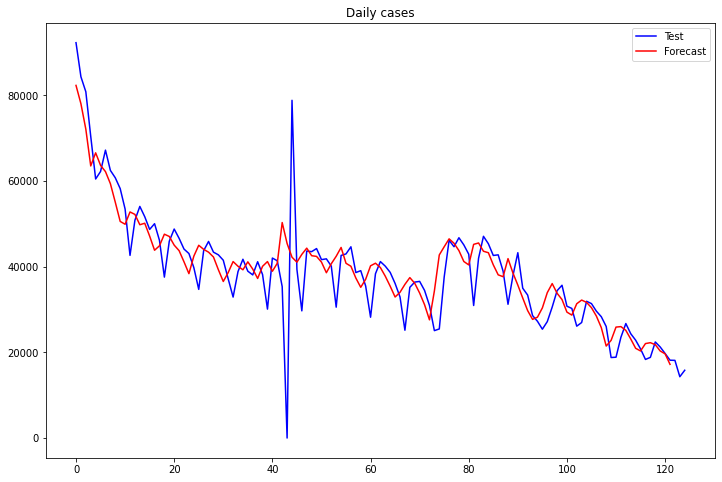

In [183]:
plot_fore_test(india_cases_test_scaled, yhat_uni_non_stacked_india_scaled, title='Daily cases')

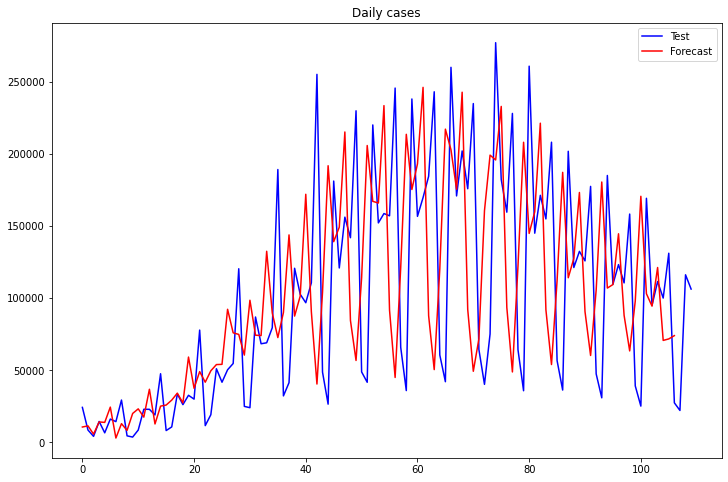

In [184]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_non_stacked_usa_scaled, title='Daily cases')

In [185]:
india_cases_train_scaled.size

496

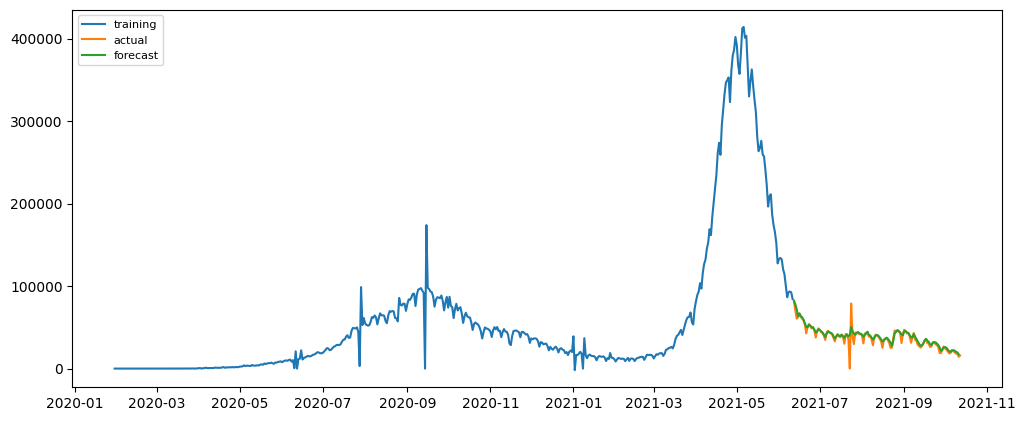

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [186]:
plot_train_test_fore(india_cases_df[['Confirmed']][0:499], india_cases_df[['Confirmed']][499:], india_cases_df[['yhat_uni_non_stacked_india_scaled']],figpath='../../figures/lstm/forecast_vs_actuals_uni_non_stacked_india.eps')

In [187]:
usa_cases_train_scaled.size

436

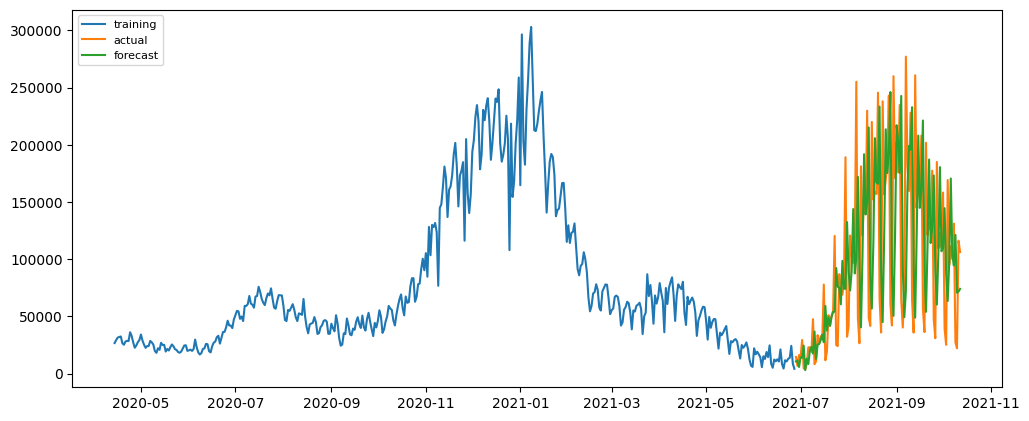

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [188]:
plot_train_test_fore(usa_cases_df[['Confirmed']][0:440], usa_cases_df[['Confirmed']][440:], usa_cases_df[['yhat_uni_non_stacked_usa_scaled']], figpath='../../figures/lstm/forecast_vs_actuals_uni_non_stacked_usa.eps')

### Univariate Non Stacked -- Long-Term

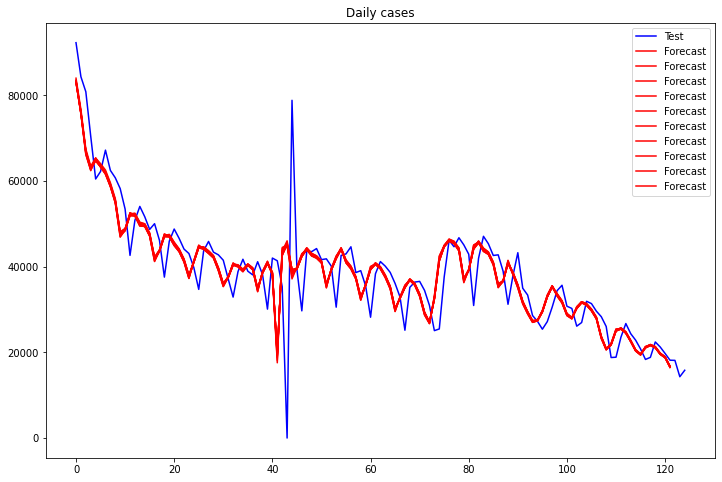

In [189]:
plot_fore_test(india_cases_test_scaled, yhat_uni_non_stacked_long_india_scaled, title='Daily cases')

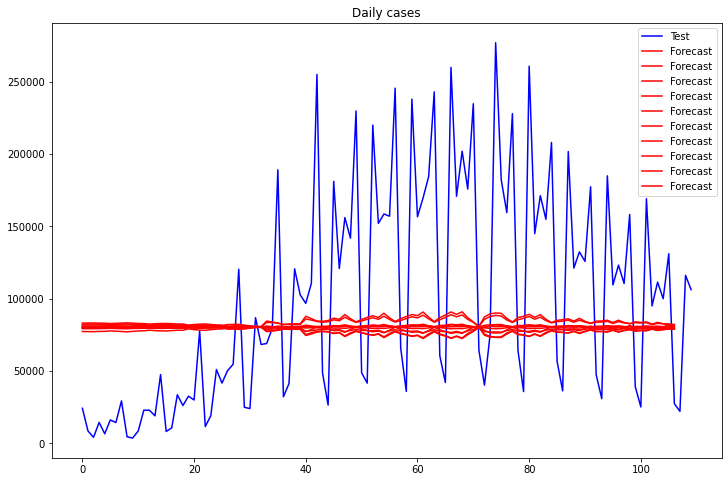

In [190]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_non_stacked_long_usa_scaled, title='Daily cases')

### Univariate Stacked -- Rolling

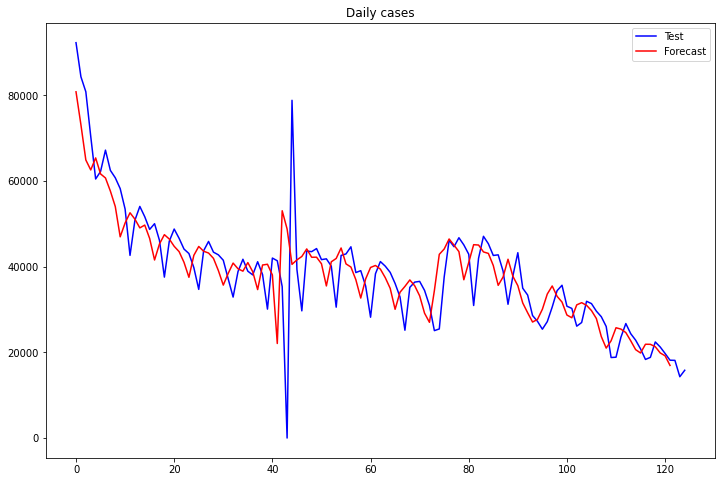

In [191]:
plot_fore_test(india_cases_test_scaled, yhat_uni_stacked_india_scaled, title='Daily cases')

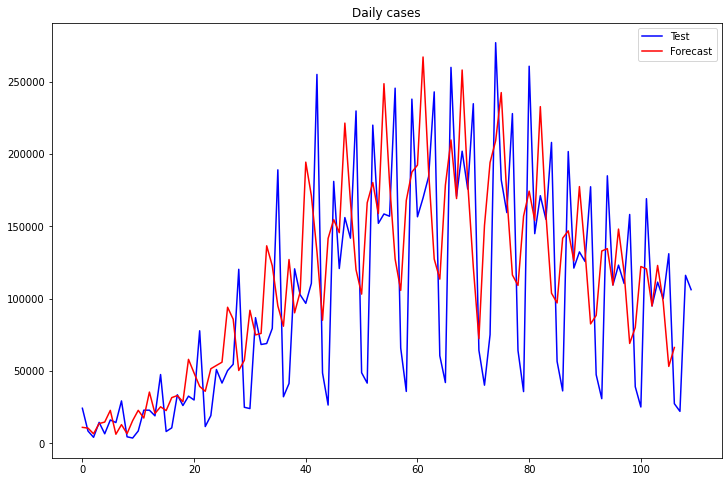

In [192]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_stacked_usa_scaled, title='Daily cases')

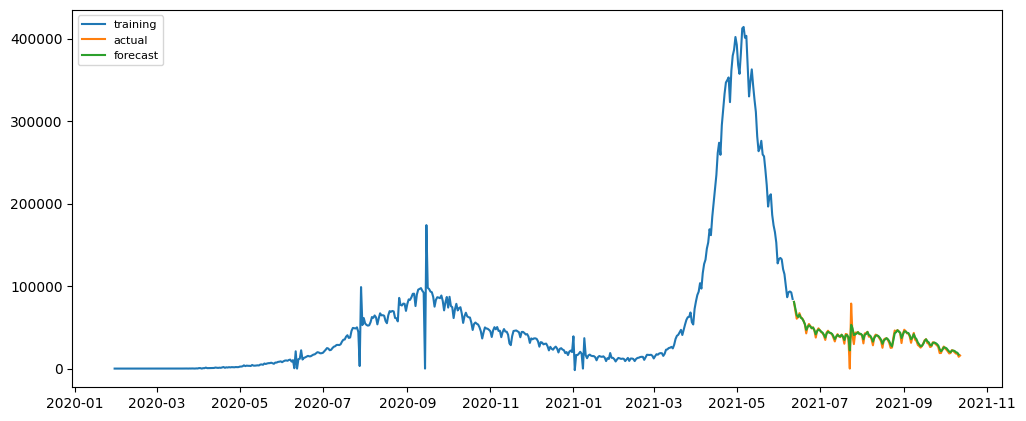

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [193]:
plot_train_test_fore(india_cases_df[['Confirmed']][0:499], india_cases_df[['Confirmed']][499:], india_cases_df[['yhat_uni_stacked_india_scaled']],figpath='../../figures/lstm/forecast_vs_actuals_uni_stacked_india.eps')

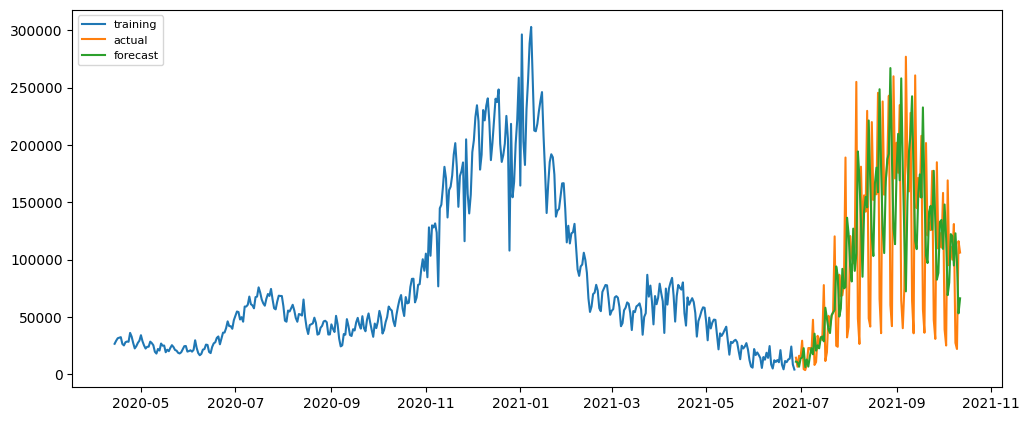

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [194]:
plot_train_test_fore(usa_cases_df[['Confirmed']][0:440], usa_cases_df[['Confirmed']][440:], usa_cases_df[['yhat_uni_stacked_usa_scaled']], figpath='../../figures/lstm/forecast_vs_actuals_uni_stacked_usa.eps')

### Univariate Stacked -- Long-Term

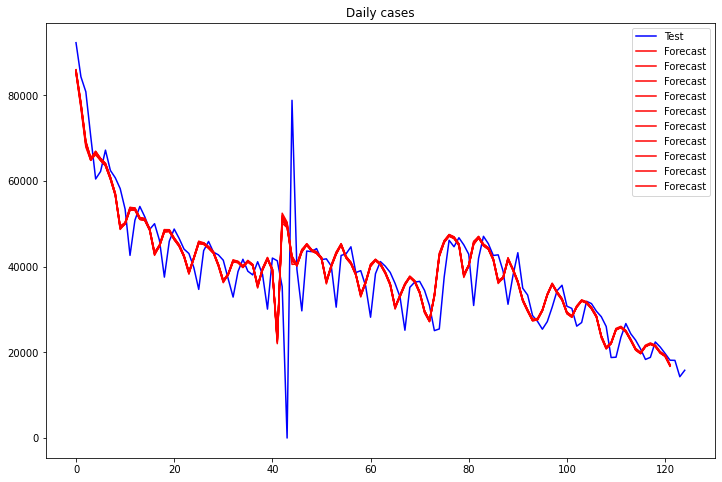

In [195]:
plot_fore_test(india_cases_test_scaled, yhat_uni_stacked_long_india_scaled, title='Daily cases')

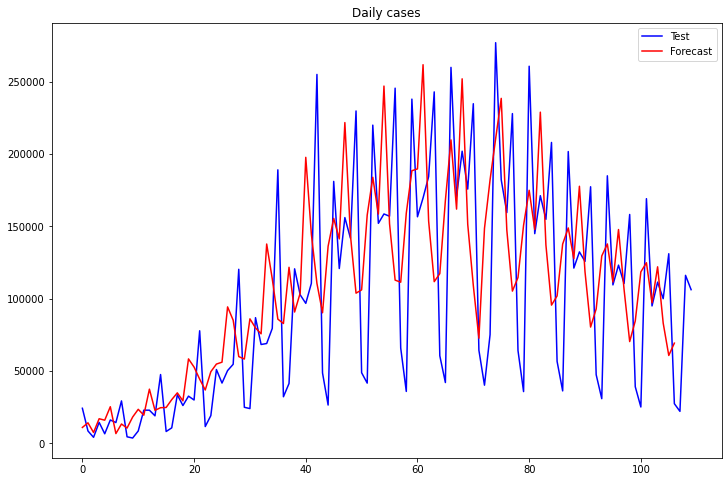

In [196]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_stacked_long_usa_scaled, title='Daily cases')